In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(reshape2))
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(NeuralNetTools))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(class))
suppressPackageStartupMessages(library(gmodels))
suppressPackageStartupMessages(library(caret))
suppressPackageStartupMessages(library(e1071))
suppressPackageStartupMessages(library(klaR))
suppressPackageStartupMessages(library(kernlab))
suppressPackageStartupMessages(library(rattle))
suppressPackageStartupMessages(library(doParallel))   
suppressPackageStartupMessages(library(NeuralNetTools))
suppressPackageStartupMessages(library(neuralnet))
suppressPackageStartupMessages(library(GGally))
suppressPackageStartupMessages(library(klaR))
suppressPackageStartupMessages(library(vip))
suppressPackageStartupMessages(library(xgboost))
suppressPackageStartupMessages(library(pROC))
suppressPackageStartupMessages(library("gbm"))
suppressPackageStartupMessages(library("ada"))
suppressPackageStartupMessages(library("xgboost"))
suppressPackageStartupMessages(library("randomForest"))
suppressPackageStartupMessages(library("caretEnsemble"))
suppressPackageStartupMessages(library("pheatmap"))
suppressPackageStartupMessages(library("caTools"))
suppressPackageStartupMessages(library("cvms"))
suppressPackageStartupMessages(library("Boruta"))
suppressPackageStartupMessages(library("Amelia"))
suppressPackageStartupMessages(library("mice"))
suppressPackageStartupMessages(library("VIM"))
suppressPackageStartupMessages(library("missForest"))

In [2]:
# It is part of a class that I have taken at UC Berkeley
# for variable importance, to evaluate VIP
# https://koalaverse.github.io/vip/articles/vip.html
# https://topepo.github.io/caret/
# the dataset is decribed on : 
# https://archive.ics.uci.edu/dataset/320/student+performance

In [3]:
library(doParallel) 
rCluster <- makePSOCKcluster(6) 
registerDoParallel(rCluster)  
set.seed(123)

In [4]:
FILE1="student-mat.tsv"
student <- read.delim(FILE1, sep="\t", header=T, stringsAsFactors=F)
head(student, 2)

school sex age address famsize Pstatus Medu Fedu Mjob    Fjob    ⋯ famrel
1 GP     F   18  U       GT3     A       4    4    at_home teacher ⋯ 4     
2 GP     F   17  U       GT3     T       1    1    at_home other   ⋯ 5     
  freetime goout Dalc Walc health absences G1 G2 G3
1 3        4     1    1    3      6        5  6  6 
2 3        3     1    1    3      4        5  5  6

In [5]:
summary(student)
str(student)
class(student)

    school              sex                 age         address         
 Length:395         Length:395         Min.   :15.0   Length:395        
 Class :character   Class :character   1st Qu.:16.0   Class :character  
 Mode  :character   Mode  :character   Median :17.0   Mode  :character  
                                       Mean   :16.7                     
                                       3rd Qu.:18.0                     
                                       Max.   :22.0                     
   famsize            Pstatus               Medu            Fedu      
 Length:395         Length:395         Min.   :0.000   Min.   :0.000  
 Class :character   Class :character   1st Qu.:2.000   1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :3.000   Median :2.000  
                                       Mean   :2.749   Mean   :2.522  
                                       3rd Qu.:4.000   3rd Qu.:3.000  
                                       Max.   :4.000   Max.   :

'data.frame':	395 obs. of  33 variables:
 $ school    : chr  "GP" "GP" "GP" "GP" ...
 $ sex       : chr  "F" "F" "F" "F" ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : chr  "U" "U" "U" "U" ...
 $ famsize   : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus   : chr  "A" "T" "T" "T" ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : chr  "at_home" "at_home" "at_home" "health" ...
 $ Fjob      : chr  "teacher" "other" "other" "services" ...
 $ reason    : chr  "course" "course" "other" "home" ...
 $ guardian  : chr  "mother" "father" "mother" "mother" ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : chr  "yes" "no" "yes" "no" ...
 $ famsup    : chr  "no" "yes" "no" "yes" ...
 $ paid      : chr  "no" "no" "yes" "yes" ...
 $ activities: chr  "no" "no" "no" "yes" ...
 $ nursery   : chr  "yes" "no" "yes" "yes" ...
 $

[1] "data.frame"

Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


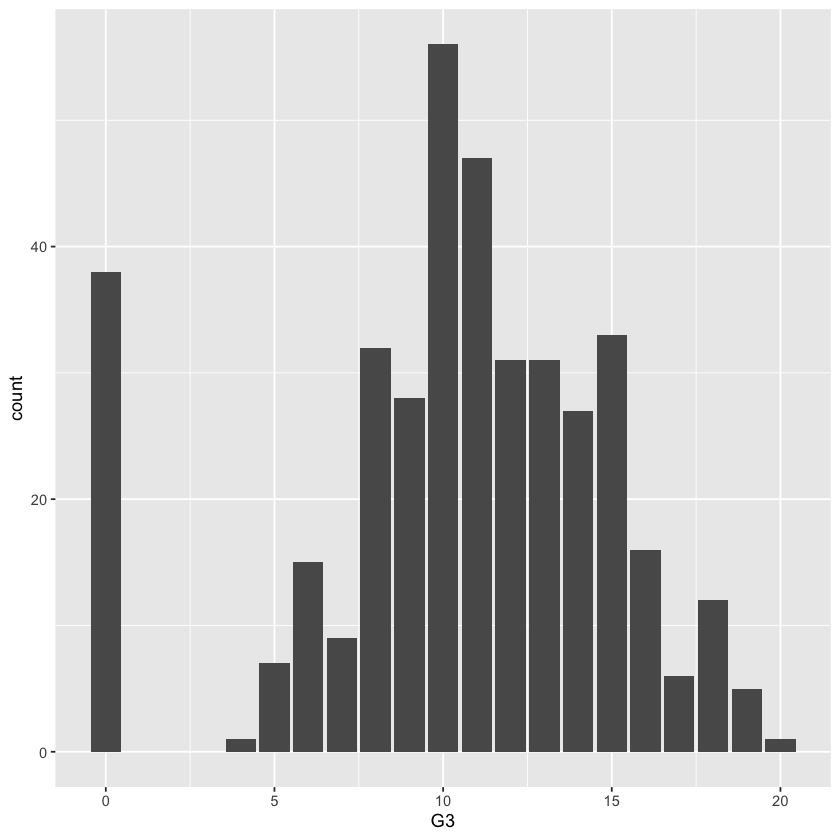

In [6]:
ggplot(data = student) + 
       geom_bar(mapping = aes(x=G3, fill=G3))

In [7]:
student1 <- subset(student, select = -c(G1, G2))

student2 <- subset(student1, 
                   select = -c(school, sex, address, famsize, Pstatus, 
                   Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, 
                   higher, internet, romantic))

str(student2)
student2$G3 = as.factor(student2$G3)

'data.frame':	395 obs. of  14 variables:
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ famrel    : int  4 5 4 3 4 5 4 4 4 5 ...
 $ freetime  : int  3 3 3 2 3 4 4 1 2 5 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Dalc      : int  1 1 2 1 1 1 1 1 1 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ health    : int  3 3 3 5 5 5 3 1 1 5 ...
 $ absences  : int  6 4 10 2 4 10 0 6 0 0 ...
 $ G3        : int  6 6 10 15 10 15 11 6 19 15 ...


[1] 356   6

Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


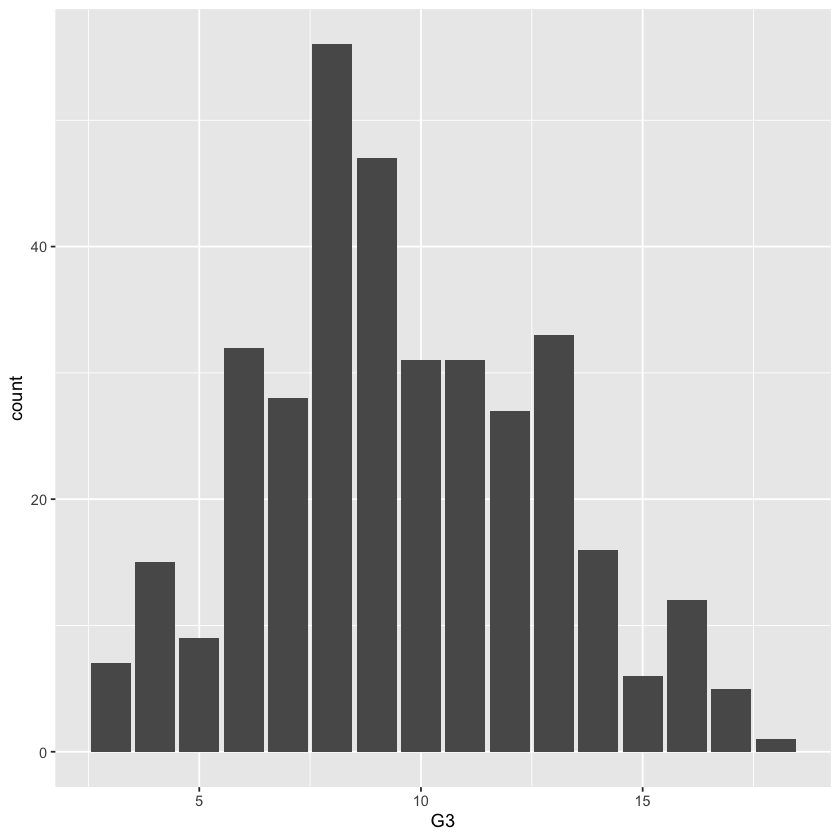

In [8]:
student3 = subset(student2, 
                  select= c(age, traveltime, studytime, failures, absences, G3))

student3$G3 = as.integer(student3$G3)
student4 = student3[student3$G3 > 2, ]
dim(student4) 

ggplot(data = student4) + 
       geom_bar(mapping = aes(x=G3, fill=G3))

In [9]:
## TRANSFORMING G3 into RANGES of PASS and NO-PASS :

student3$G3 = as.integer(student3$G3)

student3$RESULT[student3$G3 <= 10] = "NO_PASS"
student3$RESULT[student3$G3 >=10 ] = "PASS"

student3 <- subset(student3, select = -c(G3))
student3$RESULT = as.factor(student3$RESULT)

In [10]:
# TO IDENTIFY the CORRELATED PREDICTORS or LINEAR DEPENDENCIES

head(student3, 2)
student3_predictors = student3[,1:5]
head(student3_predictors, 2)

age traveltime studytime failures absences RESULT 
1 18  2          2         0        6        NO_PASS
2 17  1          2         0        4        NO_PASS

age traveltime studytime failures absences
1 18  2          2         0        6       
2 17  1          2         0        4

In [11]:
# NOTES from CARET package :

# https://topepo.github.io/caret/pre-processing.html#creating-dummy-variables

# CORRELATIONS

# The code chunk below shows the effect of removing descriptors with absolute correlations above 0.75.
# upper.tri : Returns a matrix of logicals the same size of a given matrix with entries TRUE 
# in the lower or upper triangle.

# descrCor <- cor(student3[,1:5])
# summary(descrCor[upper.tri(descrCor)])

# LINEAR DEPENDENCIES
# findLinearCombos(student3[,1:5])

# preProcess FUNCTION : CENTER, SCALE, IMPUTATION (imputation is based on KNN)

# pp = preProcess(student3[,1:5], method = c("center", "scale"), na.remove=FALSE)
# pp

# SIMPLE SPLITTING

# trainIndex <- createDataPartition(student3[,1:5], 
#                                  p = .8, 
#                                  list = FALSE, 
#                                  times = 1)

# trainIndex

# A series of test/training partitions are created using
# ‘createDataPartition’ while ‘createResample’ creates one or more
# bootstrap samples. ‘createFolds’ splits the data into ‘k’ groups

# student3Train = student3[ trainIndex,]
# student3Test = student3[-trainIndex ]

# head(student3Train,2)
# head(student3Test, 2)

# trainControl can be used to specifiy the type of resampling:
# fitControl =  trainControl(## 10-fold CV
#                           method = "repeatedcv",
#                           number = 10,
#                           ## repeated ten times
#                           repeats = 10)

# CONFUSION MATRIX :
# confusionMatrix(data = test_set$pred, reference = test_set$obs, mode = "prec_recall" )

# Feature Selection Methods
# recursive feature elimination, 
# genetic algorithms, 
# and simulated annealing.
# Feature Selection using Univariate Filters

# Recursive Feature Elimination

# rfeControl
# rfeIter
# summary
# fit function
# pred
# rank 
# selectSize
# selectVar

# Genetic Alghoritms
# gaf
# ctrl <- gafsControl(functions = caretGA)
# obj <- gafs(x = predictors, 
#            y = outcome,
#            iters = 100,
#            gafsControl = ctrl,
#            ## Now pass options to `train`
#            method =
# ROC function

# Simulated Annealing
# saf
# ctrl <- safsControl(functions = caretSA)
# obj <- safs(x = predictors, 
#            y = outcome,
#            iters = 100,
#            safsControl = ctrl,
#            ## Now pass options to `train`
#            method =
# ROC function

In [12]:
head(student3,2)

age traveltime studytime failures absences RESULT 
1 18  2          2         0        6        NO_PASS
2 17  1          2         0        4        NO_PASS

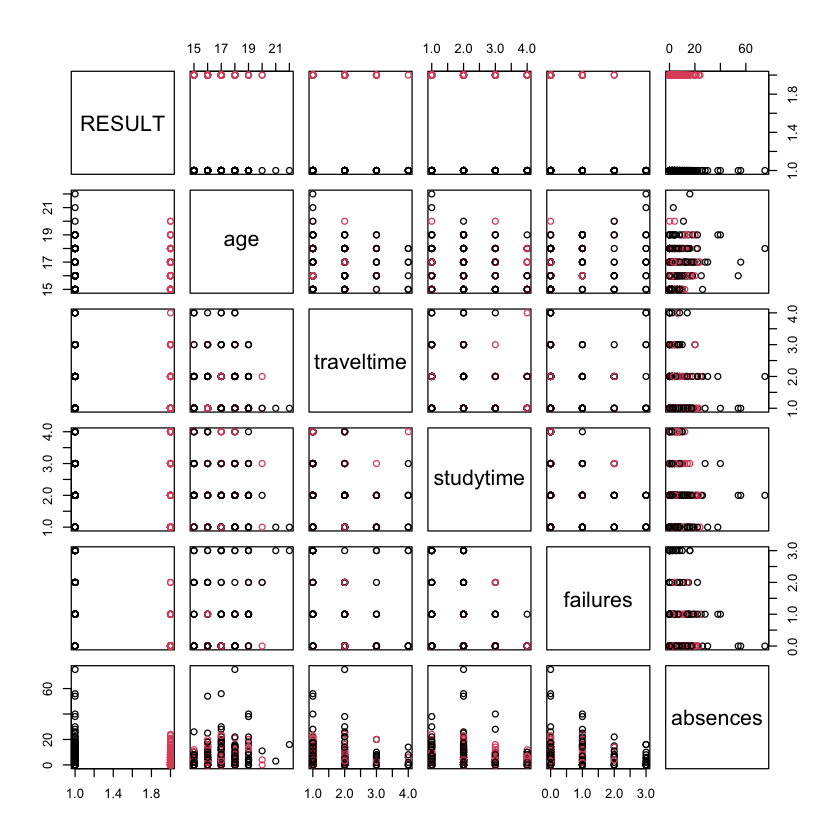

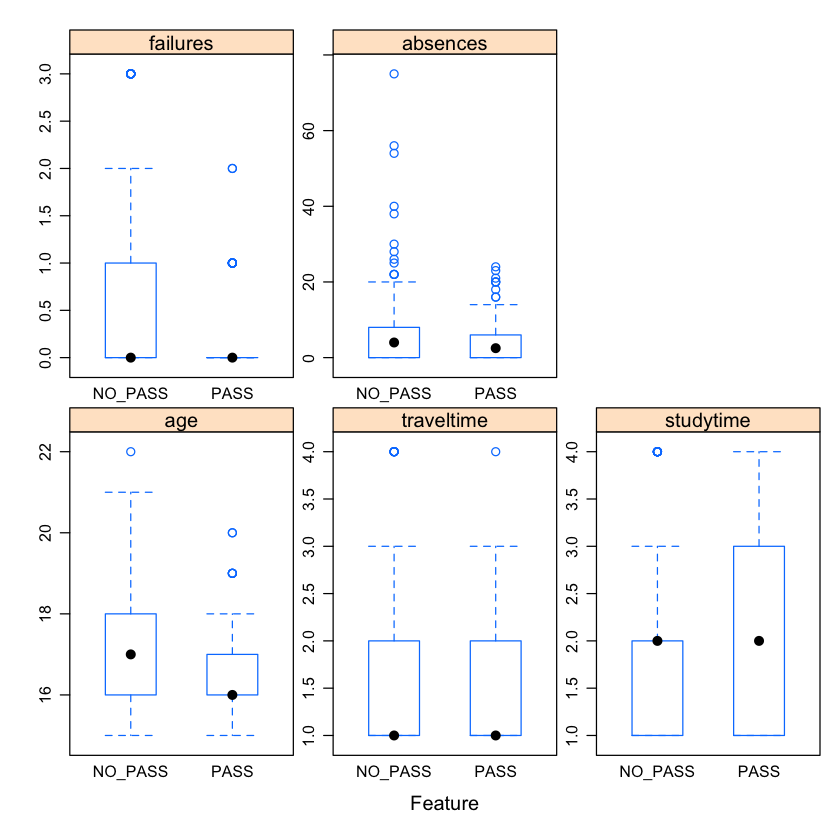

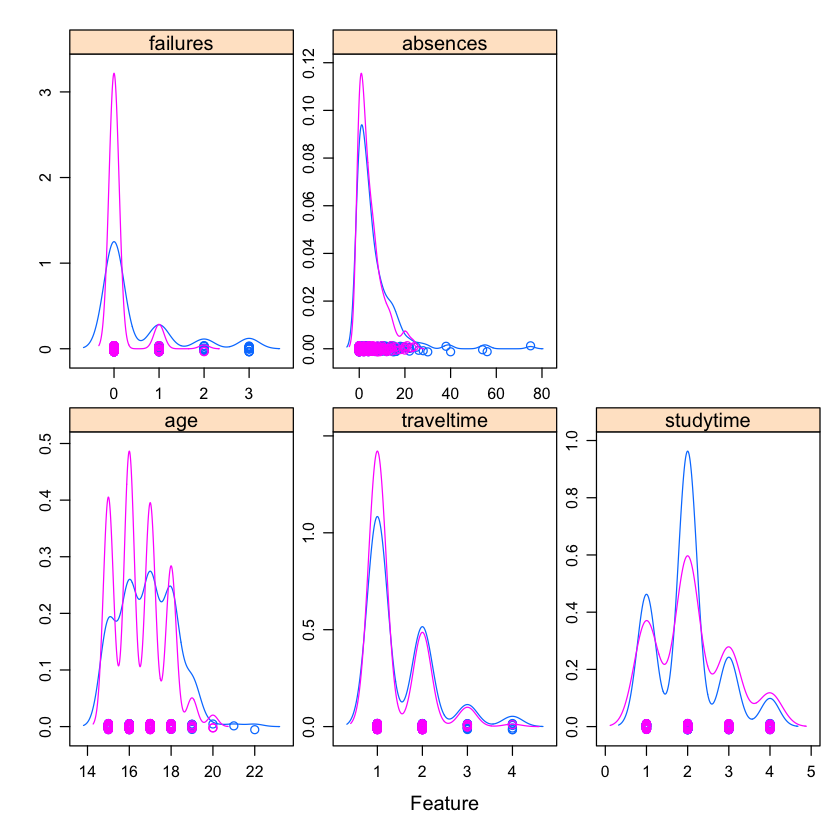

In [13]:
# Visualize the data 
# inspiration from : 
# https://setscholars.net/end-to-end-machine-learning-ionosphere-prediction-in-r/
# split input and output

x = student3[, 1:5]
y = student3[, 6]

# scatterplot matrix
pairs(RESULT~. , data = student3, col=student3$RESULT)

# box and whisker plots for each attribute
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="box", scales=scales)

# density plots for each attribute by class value
featurePlot(x=x, y=y, plot="density", scales=scales)

In [14]:
# to check the MISSINGNESS 

In [15]:
# HOW MANY MISSING VALUES ARE :
# head(student3, 3)

sum(is.na(student3))

[1] 0

In [16]:
# https://bookdown.org/mike/data_analysis/imputation-missing-data.html
# suggestions regarding IMPUTATIONS
# remove categorical variables

student3_predictors = dplyr::select(student3, -RESULT)
head(student3_predictors, 2)

age traveltime studytime failures absences
1 18  2          2         0        6       
2 17  1          2         0        4

In [17]:
# imputation with MICE

 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



age traveltime studytime failures absences RESULT  
395 1   1          1         1        1        1      0
    0   0          0         0        0        0      0

$rr
           age traveltime studytime failures absences RESULT
age        395        395       395      395      395    395
traveltime 395        395       395      395      395    395
studytime  395        395       395      395      395    395
failures   395        395       395      395      395    395
absences   395        395       395      395      395    395
RESULT     395        395       395      395      395    395

$rm
           age traveltime studytime failures absences RESULT
age          0          0         0        0        0      0
traveltime   0          0         0        0        0      0
studytime    0          0         0        0        0      0
failures     0          0         0        0        0      0
absences     0          0         0        0        0      0
RESULT       0          0         0        0        0      0

$mr
           age traveltime studytime failures absences RESULT
age          0          0         0        0        0      0
traveltime   0          0         0        0        0      0
studytime    0          0         0        0        0      0
failures     0          0         0        0        0      0
absences     0          0         0        0        0      0
RESULT       0          0         0        0        0      0

$mm
           age traveltime studytime failures absences RESULT
age          0          0         0        0        0      0
traveltime   0          0         0        0        0      0
studytime    0          0         0        0        0      0
failures     0          0         0        0        0      0
absences     0          0         0        0        0      0
RESULT       0          0         0        0        0      0

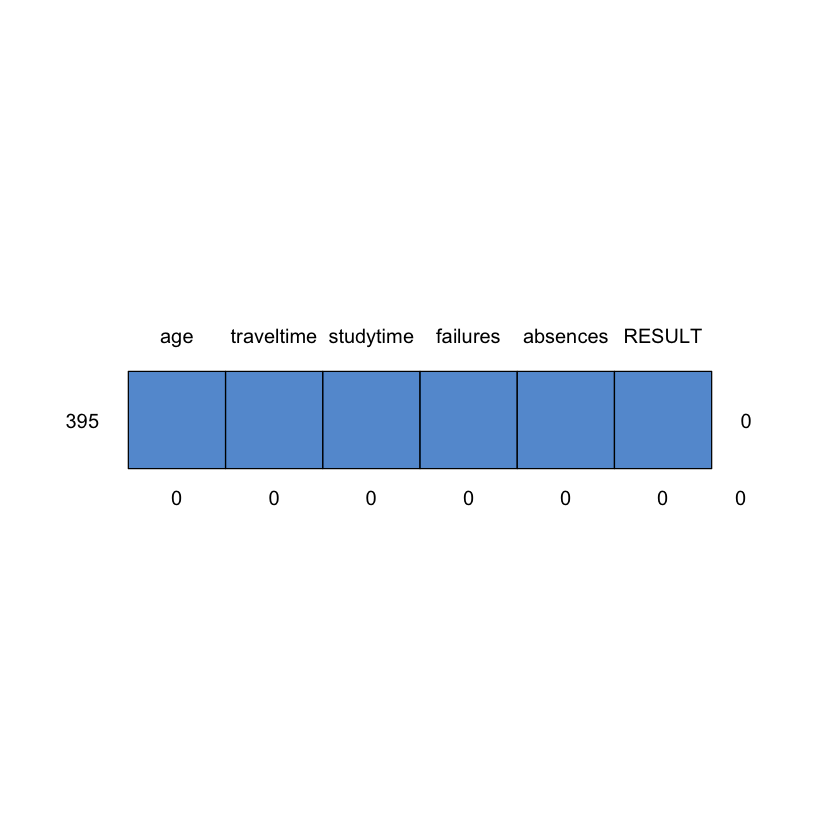


 Variables sorted by number of missings: 
   Variable Count
        age     0
 traveltime     0
  studytime     0
   failures     0
   absences     0
     RESULT     0

 iter imp variable
  1   1
  1   2
  1   3
  1   4
  1   5
  2   1
  2   2
  2   3
  2   4
  2   5
  3   1
  3   2
  3   3
  3   4
  3   5
  4   1
  4   2
  4   3
  4   4
  4   5
  5   1
  5   2
  5   3
  5   4
  5   5


[1] 395   6

[1] 395   6

$age


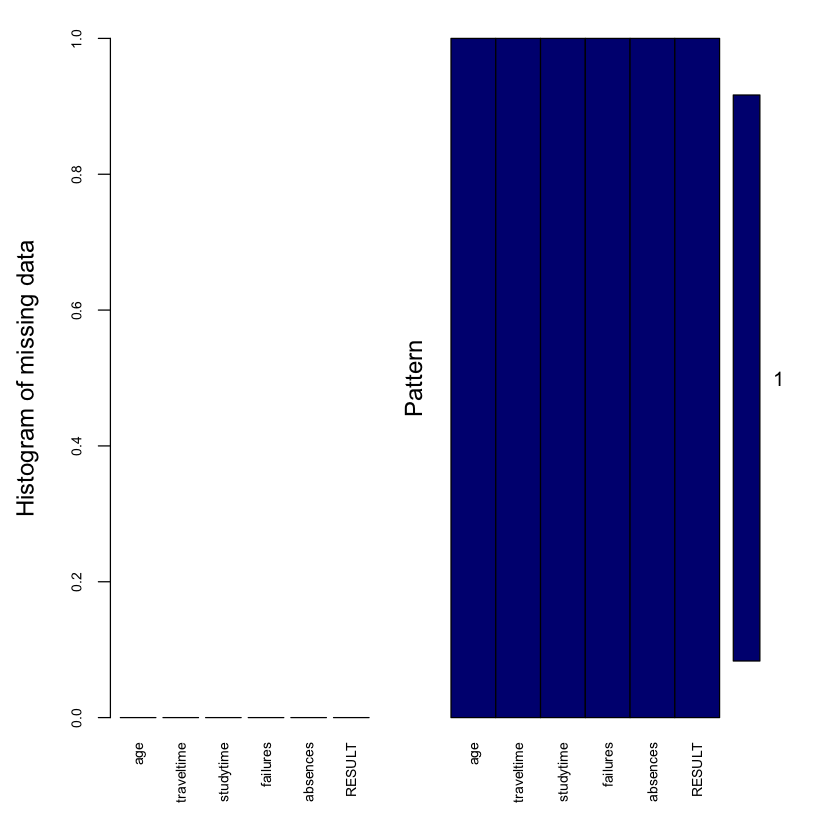


$traveltime


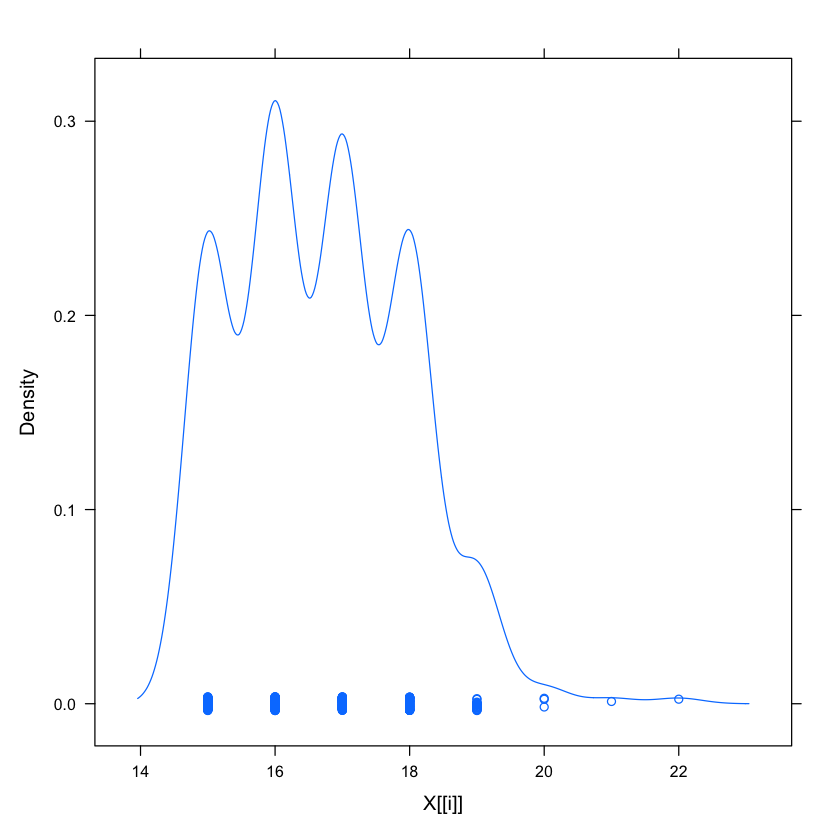


$studytime


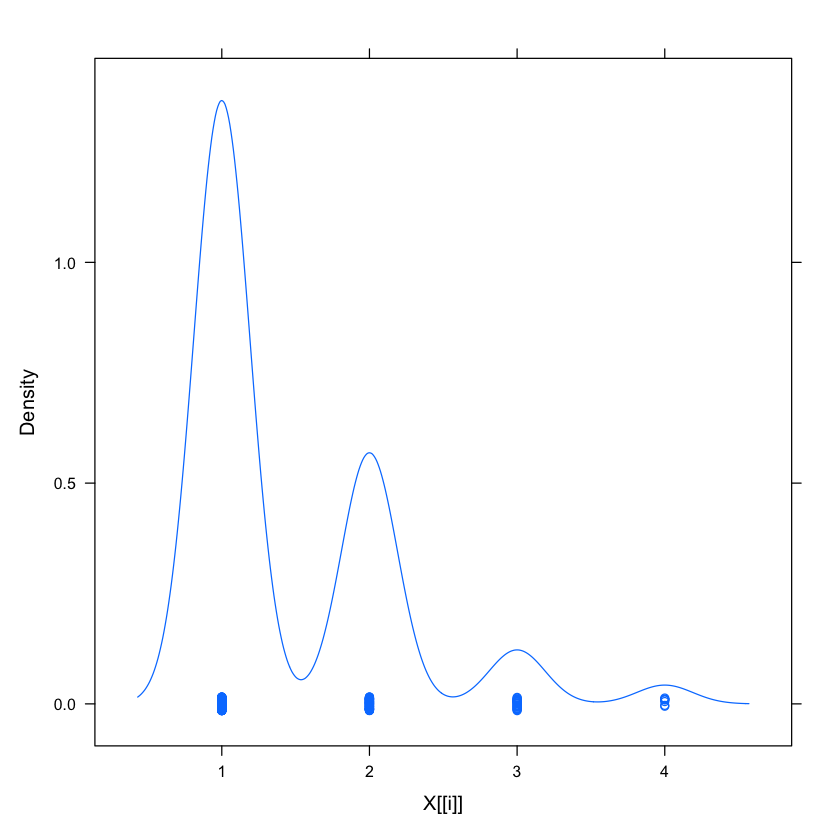


$failures


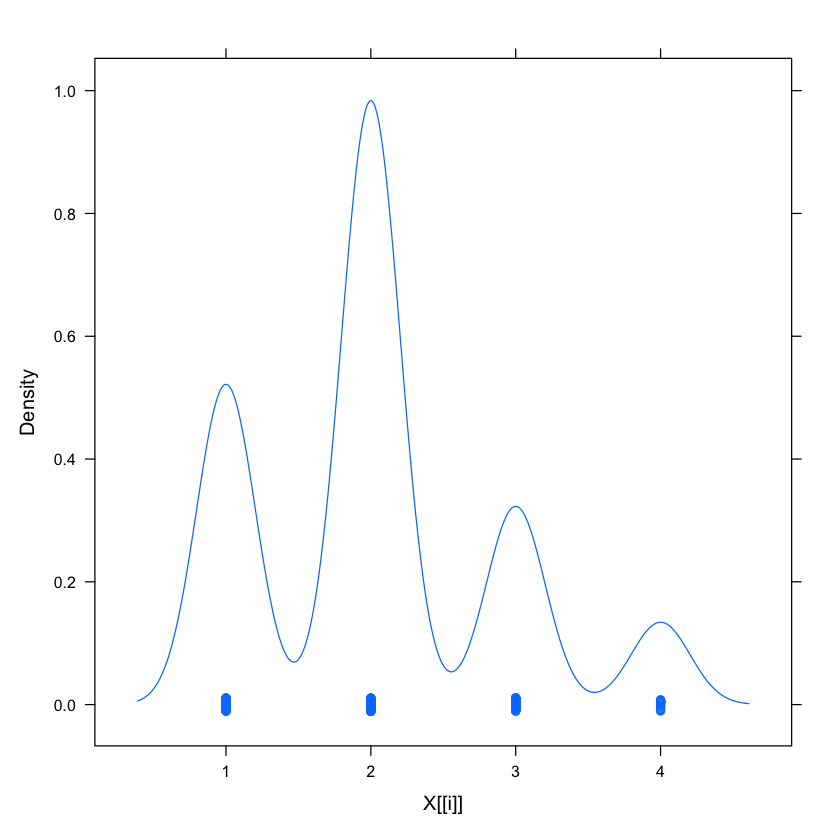


$absences


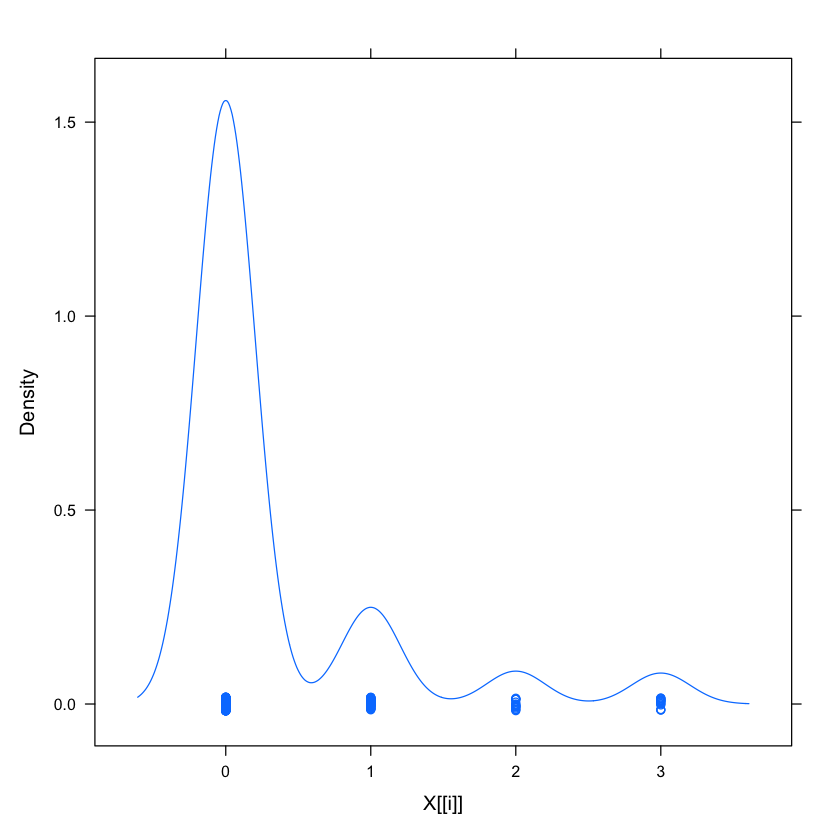


$age


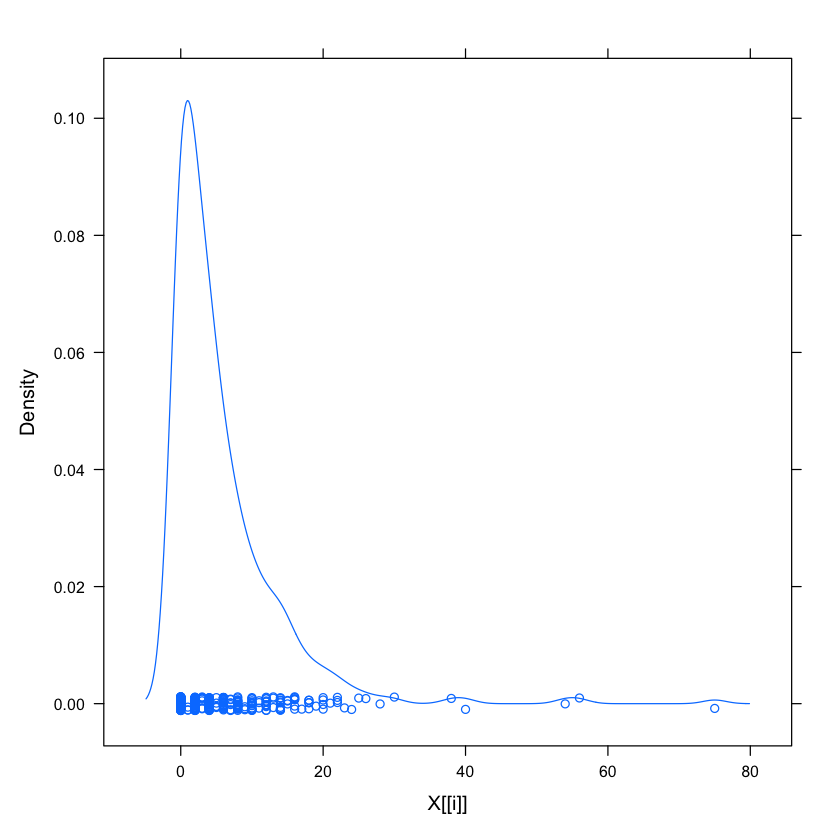


$traveltime


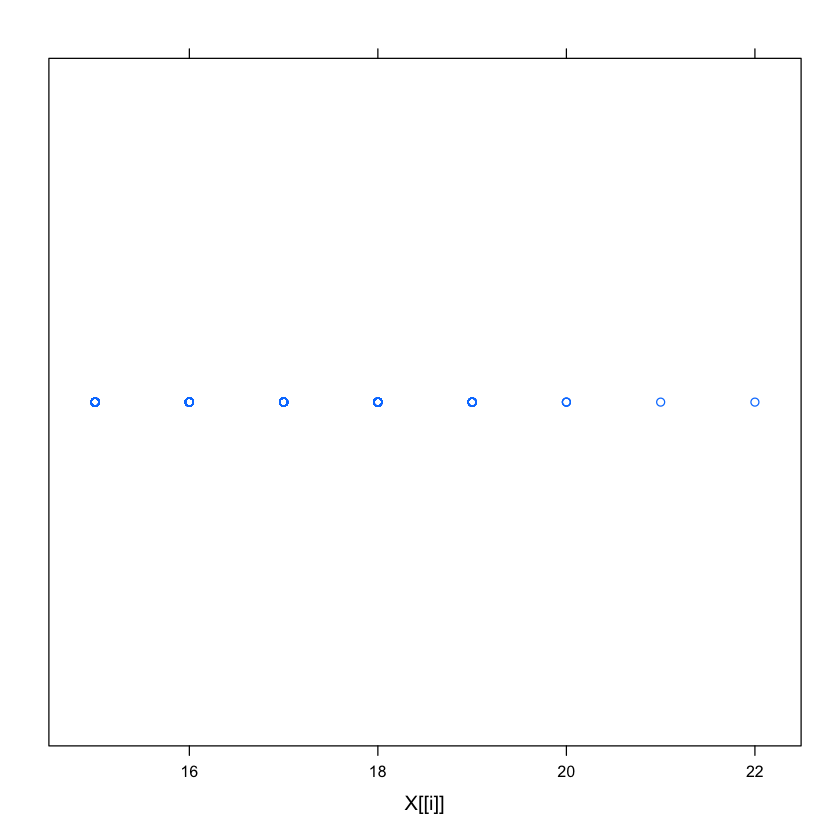


$studytime


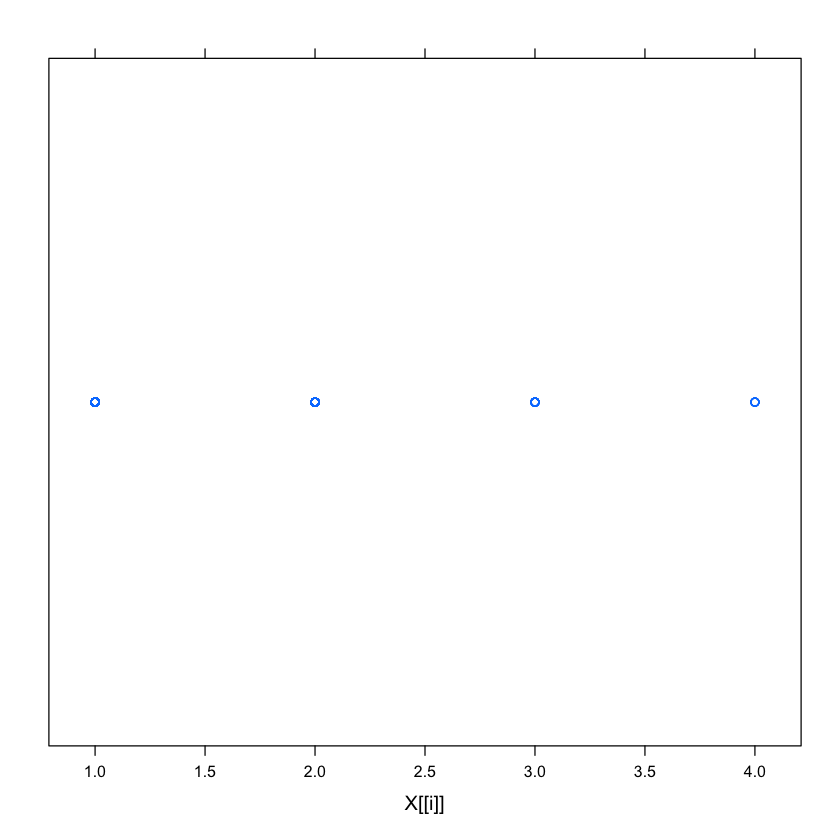


$failures


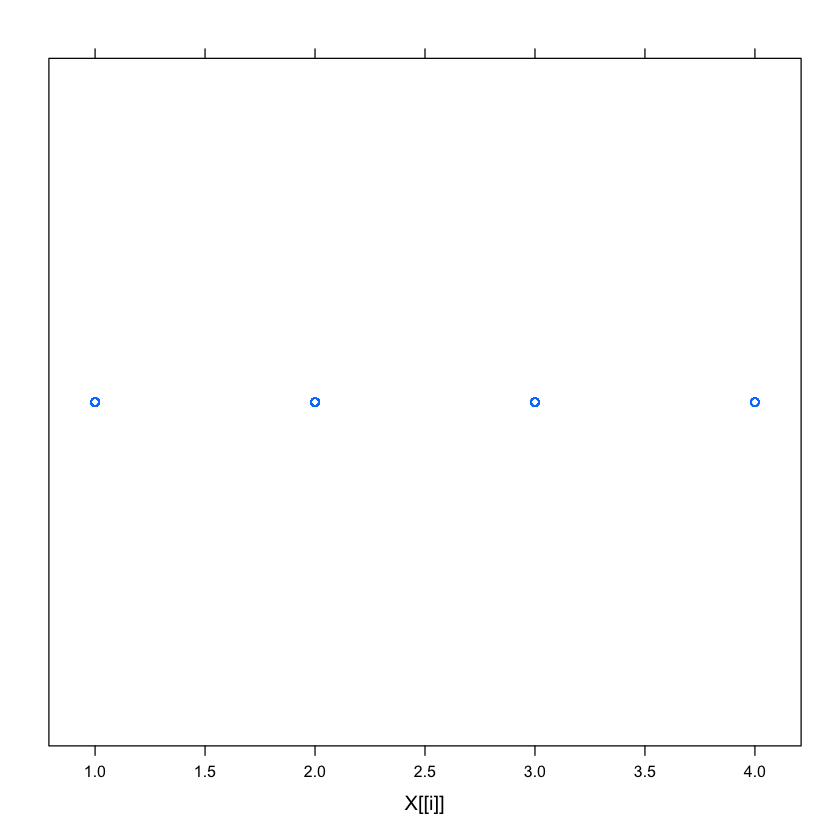


$absences


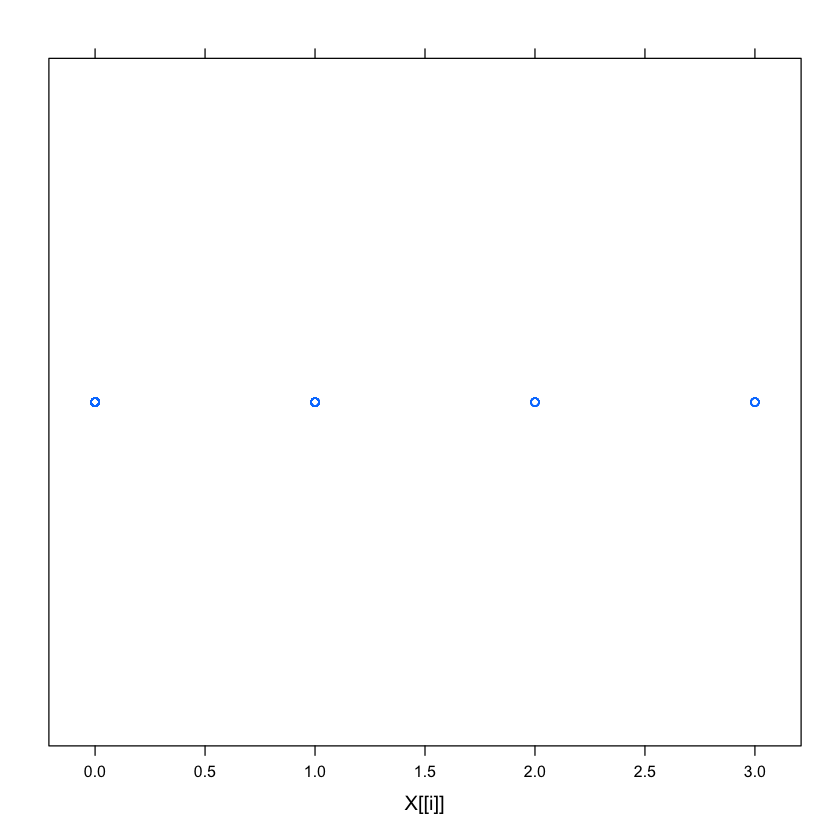

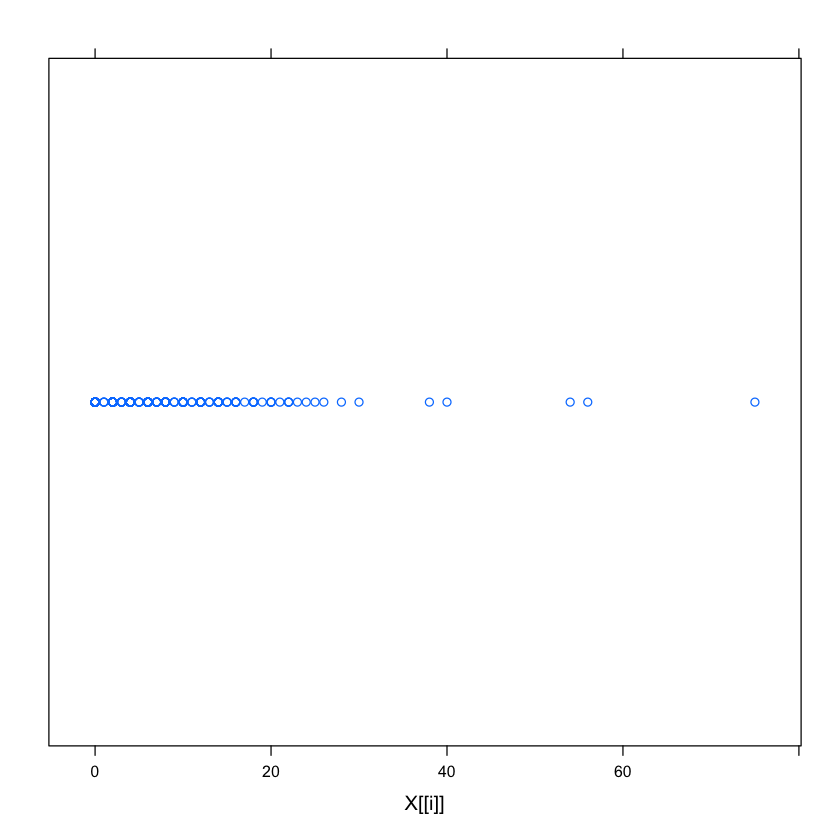

In [18]:
# IMPUTATION with MICE : shall we use the data in df student3_predictors ?

############################################
############################################ PATTERNS in the MISSING DATA
# Missing pattern :
md.pattern(student3)
md.pairs(student3)
############################################
############################################ VIM
# Using mice for looking at missing data pattern
# md.pattern(training)

aggr_plot <- aggr(student3, col=c('navyblue','red'), 
                   numbers=TRUE, 
                   sortVars=TRUE, 
                   labels=names(student3), 
                   cex.axis=.7, 
                   gap=3, 
                   ylab=c("Histogram of missing data","Pattern"))

# Margin plots : 
# marginplot(student3[c(1,2)])
# marginplot(student3[c(2,3)])

############################################
############################################

mice_student3 <- mice(student3, method = "rf")
# str(mice_student3, 2)

mice_student3_complete <- complete(mice_student3)
# str(mice_student3_complete)

############################################
############################################

dim(student3)
dim(mice_student3_complete)

# summary(student3)
# summary(mice_student3_complete)

############################################
############################################ multiple options
# methods(mice)
# mice_student3 <- mice(x_train, 
#                      method = "rf", 
#                      m=5, 
#                      maxit=50, 
#                      seed=500)
############################################
############################################
# Inspecting the density of the data after IMPUTATION : 
# mice_student3$predictorMatrix
# mice_student3$visitSequence

# Select numeric columns from the data frame
numeric_columns <- mice_student3_complete[sapply(mice_student3_complete, is.numeric)]
# numeric_columns

# Create density or strip plots for each numeric column
density_plots <- lapply(numeric_columns, densityplot)
strip_plots <- lapply(numeric_columns, stripplot)

############################################
############################################
# Display the density plots
print(density_plots)
# Display the strip plots
print(strip_plots)
############################################
############################################ considering a variable
# names(mice_student3_complete)
# stripplot(mice_student3_complete[, "age"])
# densityplot(mice_student3_complete[, "age"])

In [19]:
# IMPUTATION with AMELIA

In [20]:
# IMPUTATION with AMELIA
# we do NOT use categorical variables :)

amelia_student3_predictors <- amelia(student3_predictors)
str(amelia_student3_predictors)

# multiple options 
# amelia_student3 <- amelia(x_train, 
#                          m = 3, 
#                          parallel = "multicore" , 
#                          noms = c('age','traveltime','studytime','failures','absences','RESULT'))

# To access the imputed data frames 
amelia_student3_predictors
# amelia_student3_predictors$imputations

Amelia Error Code:  39 
 Your data has no missing values.  Make sure the code for 
 missing data is set to the code for R, which is NA. 
List of 2
 $ code   : num 39
 $ message: chr "Your data has no missing values.  Make sure the code for \n missing data is set to the code for R, which is NA."


$code
[1] 39

$message
[1] "Your data has no missing values.  Make sure the code for \n missing data is set to the code for R, which is NA."

In [21]:
# another strategy
# student3.mis <- prodNA(student3, noNA = 0.1)

In [22]:
set.seed(123)

# SPLIT DATASET
indxTrain <- createDataPartition(student3$RESULT, 
                                 p = .75, 
                                 list = FALSE)
# indxTrain

training <- student3[indxTrain,]
# training
testing <- student3[-indxTrain,]
# testing

In [23]:
## PRE-PROCESSING : we describe possible options 

# trainX  <- training[, names(training) != "RESULT"]
# preProcValues <- preProcess(x = trainX, method = c("center", "scale"))
# preProcValues

# in order to see the TRANSFORMED data :

preProcValues <- preProcess(training, method = c("center", "scale"))
trainTransformed <- predict(preProcValues, training)
glimpse(trainTransformed)

Rows: 297
Columns: 6
$ age        <dbl> 1.0788945, -0.5152929, -0.5152929, -0.5152929, 0.2818008, -…
$ traveltime <dbl> 0.8091912, -0.6385786, -0.6385786, -0.6385786, 0.8091912, -…
$ studytime  <dbl> -0.05292907, -0.05292907, -0.05292907, -0.05292907, -0.0529…
$ failures   <dbl> -0.4508662, -0.4508662, -0.4508662, -0.4508662, -0.4508662,…
$ absences   <dbl> 0.08183586, -0.20410826, 0.65372410, -0.77599650, 0.0818358…
$ RESULT     <fct> NO_PASS, NO_PASS, PASS, NO_PASS, NO_PASS, PASS, PASS, NO_PA…


In [24]:
# we separate :

# independent variables for TRAIN
# dependent variable for TRAIN
# independent variables for TEST
# dependent variables for TEST

In [25]:
X_train = training[, c(1,2,3,4,5)]  # independent variables for train
X_test = testing[, c(1,2,3,4,5)]    # dependent variables for train
head(X_train, 2)
head(X_test, 2)
x_train = X_train
x_test = X_test
head(x_train, 2)
head(x_test, 2)

# using BINARY CODING of 0 and 1
# Y_train <- as.integer(training$RESULT) - 1
# Y_test <- as.integer(testing$RESULT) - 1

# if we do not need to perform the BINARY ENCODING
y_train <- training$RESULT  # independent variables for test
y_test <- testing$RESULT    # dependent variables for test
head(y_train, 2)
head(y_test, 2)

# we encode PASS as 1, and NOT_PASS as 0

Y_train <- as.integer(training$RESULT == "PASS") # independent variables for test
Y_test <- as.integer(testing$RESULT == "PASS")    # dependent variables for test
head(Y_train, 2)
head(Y_test, 2)

age traveltime studytime failures absences
1 18  2          2         0        6       
5 16  1          2         0        4

age traveltime studytime failures absences
2 17  1          2         0         4      
3 15  1          2         3        10

age traveltime studytime failures absences
1 18  2          2         0        6       
5 16  1          2         0        4

age traveltime studytime failures absences
2 17  1          2         0         4      
3 15  1          2         3        10

[1] NO_PASS NO_PASS
Levels: NO_PASS PASS

[1] NO_PASS NO_PASS
Levels: NO_PASS PASS

[1] 0 0

[1] 0 0

In [26]:
# some documentation on : 
# http://rismyhammer.com/ml/Pre-Processing.html#:~:text=0%2C%201%5D.-,Imputation,(e.g.%20using%20the%20mean)

# notes about DATA PRE-PROCESSING :
# createFolds splits the data into k groups
# groupKFold splits the data based on a grouping factor

# Splitting Based on Predictors
# maxDissim is used to create sub–samples using a maximum dissimilarity approach. 
# This is particularly useful for unsupervised learning where there are no response variables.

# Splitting with Important Groups
# To split the data base by groups, groupKFold can be used

# DummyVars

# Zero and Near-Zero-Variance Predictors
# In some situations, the data generating mechanism can create predictors that only have a single unique value 
# (i.e. a “zero-variance predictor”). 
# For many models (excluding tree-based models), this may cause the model to crash or the fit to be unstable.
# The concern here that these predictors may become zero-variance predictors when the data are split into cross-validation/bootstrap sub-samples or that a few samples may have an undue influence on the model. 
# These “near-zero-variance” predictors may need to be identified and eliminated prior to modeling.
# nearZeroVar(student3)

In [27]:
# How to handle NA values :
# na.action = na.pass
# na.action = na.exclude 
# na.action = na.omit

# na.exclude over na.omit is that the former will retain the original number of rows in the data. 
# This may be useful where you need to retain the original size of the dataset - 
# for example it is useful when you want to compare predicted values to original values. 
# With na.omit you will end up with fewer rows so you won't as easily be able to compare.

In [28]:
# IMPUTATIONS : 

# The K closest neighbors are found in the training set and the value for the predictor is imputed using 
# these values (e.g. using the mean).
# Using this approach will automatically trigger preProcess to center and scale the data.

# bagImpute 
# medianImpute

# For each predictor in the data, a bagged tree is created using all of the other predictors in the training set.
# When a new sample has a missing predictor value, the bagged model is used to predict the value.

In [29]:
# TRANSFORMATIONS :

# In some cases there is a need to use principal component analysis (PCA) to transform the data to a 
# smaller sub–space where the new variables are uncorrelated with one another. 
# The preProcess class can apply this transformation by including pca in the method argument. 
# Doing this will also force scaling of the predictors.

# Remember, if you have categorical variables you must convert them first to dummy variables 
# before you can apply your processing (center, scale, pca, etc.).

# Similarly, independent component analysis (ICA) can also be used to find new variables that are linear 
# combinations of the original set such that the components are independent (as opposed to uncorrelated in PCA)

# spatialSign TRANSFORMATION
# spatialSign(student3_predictors)

# transformed <- spatialSign(training)
# transformed <- as.data.frame(transformed)
# head(transformed, 2)

# BOXCOX TRANSFORMATION
# preProcess(training, method = "BoxCox")

# Class Distance Calculations
# To generate new predictors variables based on distances to class centroids 
# (similar to how linear discriminant analysis works). 
# For each level of a factor variable, the class centroid and covariance matrix is calculated.

# Inadequate data pre-processing is one of the common reasons on why some predictive models fail.

In [30]:
# When shall we perform FEATURE ENGINEERING ?
# https://www.linkedin.com/posts/soledad-galli_should-feature-engineering-be-done-before-activity-7102606015589699584-D4KG/

# We should treat the test set as unseen data. Therefore, we can't use it for feature engineering or selection purposes. 
# If we did, it would mean that the test set was seen during the creation of the machine learning pipeline.

# Instead of machine learning models, think of machine learning pipelines. Within this context, the test set should be unseen by the entire pipeline, 
# which involves feature engineering, feature selection, and model optimization.

# If any part of modelling "sees" test data you may have information leaking. 
# Eg, test data should not be used when centering or standardizing variableas, 
# when imputing mean / median / modes, etc
# So, split at the beginning, and do not use until the time comes to validate your model.

# In a real - world application, all you will have is a training set to build and deploy a model, 
# and that model will predict the test examples that the application needs. 
# In this setting, it is not realistic to assume that you will have the test data to generate features, 
# as you will already have your model delivered. 
# So, the mechanism to generate the features can only be fed with training information.

In [31]:
# TO CENTER and SCALE the DATA ?

# Whether you need to center or scale your data depends on the specific requirements of the machine 
# learning algorithm you plan to use and the characteristics of your dataset. Here are some considerations:

# Centering:

# If the algorithm you are using is sensitive to the mean of the features, 
# centering the data might be beneficial.
# Centering the data by subtracting the mean ensures that the mean of each variable is zero. 
# This can be useful for interpretability, especially in linear models.

# Scaling:

# If the scale of the features matters for the algorithm you are using, you might want to scale the data.
# Algorithms that rely on distances between data points, such as k-nearest neighbors or support vector machines, 
# are sensitive to the scale of features. Scaling helps ensure that all features contribute equally to distance computations.

# Considerations:

# If your data ranges from -8 to +8 and your chosen algorithm is not sensitive to the mean or scale, 
# you might not need to center or scale the data.
# Some algorithms, like decision trees or random forests, 
# are not inherently sensitive to the scale or mean of features, 
# and they may perform well without scaling or centering.

In [32]:
preProcValues <- preProcess(training, method = c("center", "scale", "knnImpute"))
trainTransformed <- predict(preProcValues, training)
glimpse(trainTransformed)

Rows: 297
Columns: 6
$ age        <dbl> 1.0788945, -0.5152929, -0.5152929, -0.5152929, 0.2818008, -…
$ traveltime <dbl> 0.8091912, -0.6385786, -0.6385786, -0.6385786, 0.8091912, -…
$ studytime  <dbl> -0.05292907, -0.05292907, -0.05292907, -0.05292907, -0.0529…
$ failures   <dbl> -0.4508662, -0.4508662, -0.4508662, -0.4508662, -0.4508662,…
$ absences   <dbl> 0.08183586, -0.20410826, 0.65372410, -0.77599650, 0.0818358…
$ RESULT     <fct> NO_PASS, NO_PASS, PASS, NO_PASS, NO_PASS, PASS, PASS, NO_PA…


In [33]:
# to use a GENERAL VARIABLE to specify the PRE-PROCESSING :

# PREPROCESS = c("center","scale", "knnImpute")
PREPROCESS = c("center","scale", "bagImpute")
# PREPROCESS = c("center","scale", "BoxCox")

# knnImpute data is scaled and centered by default
# we can't avoid scaling and centering your data when using method = "knnImpute", 

# however, method = "bagImpute" or method = "medianImpute" will not scale and center 
# the data unless we ask it to. 

In [34]:
## TRAINING PARAMETERS : 

ctrl <- trainControl(method = "repeatedcv", 
                     number = 10, 
                     repeats=10, 
                     allowParallel=TRUE, 
                     classProbs = TRUE)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


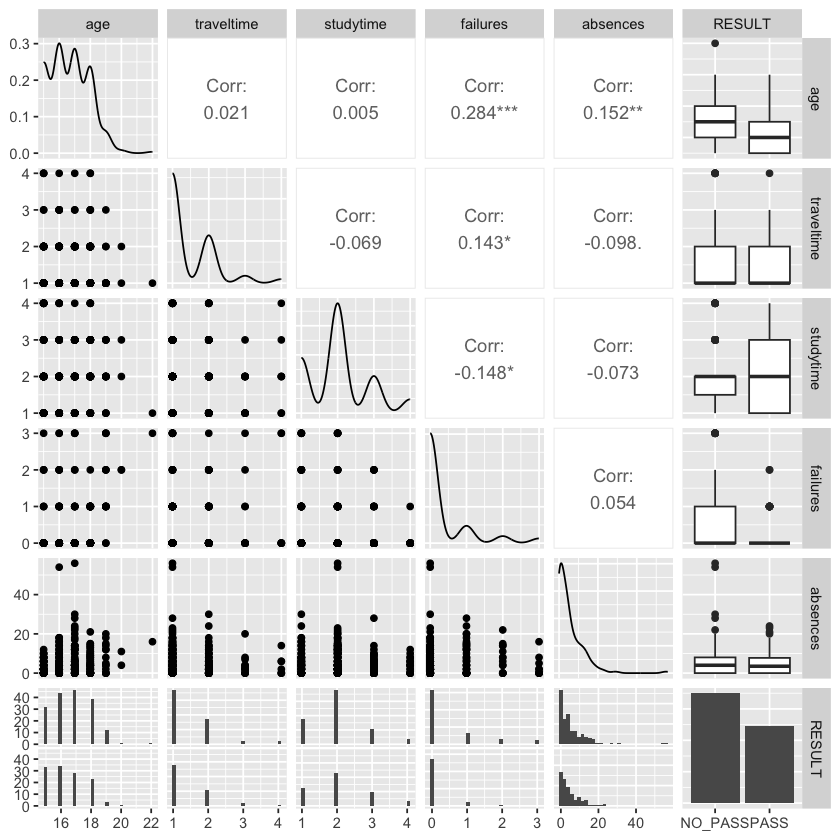

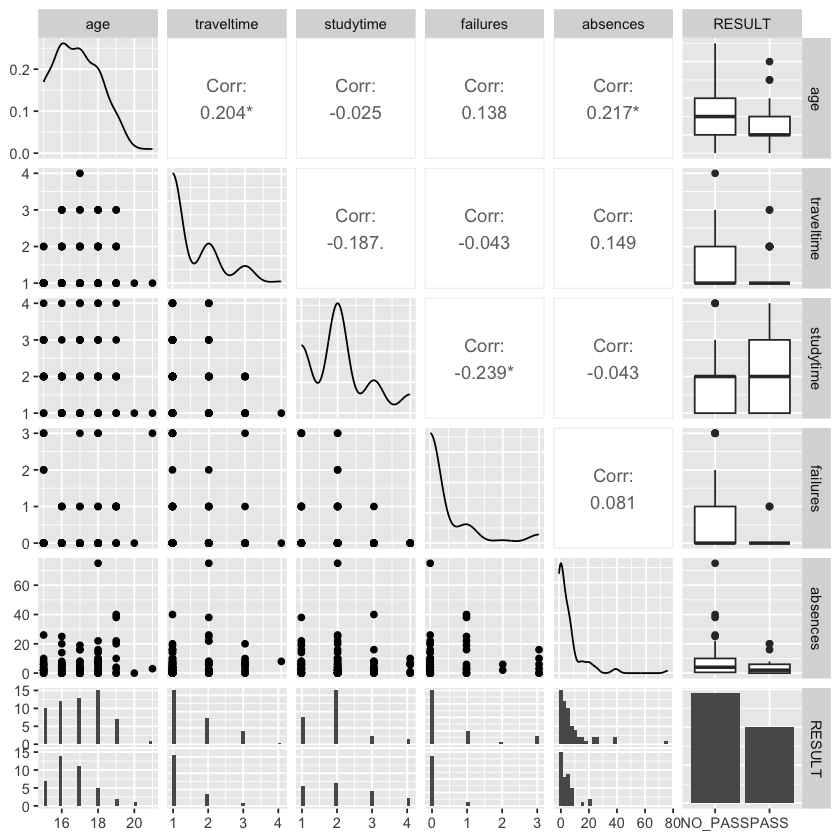

In [35]:
## Correlations between FEATURES

library(GGally)
library(klaR)

ggpairs(training)
ggpairs(testing)

In [36]:
# Near Zero Variance Predictors

# nzv <- nearZeroVar(student3_predictors)
# filteredDescr <- student3_predictors[, -nzv]

# dim(filteredDescr)
# head(filteredDescr, 2)
# dim(student3_predictors)

filteredDescr = student3_predictors
head(filteredDescr, 2)

age traveltime studytime failures absences
1 18  2          2         0        6       
2 17  1          2         0        4

In [37]:
# Correlated Predictors

# findCorrelation uses the following algorithm to flag predictors for removal :
descrCor <-  cor(filteredDescr)
highCorr <- sum(abs(descrCor[upper.tri(descrCor)]) > .75)
highCorr 
summary(descrCor[upper.tri(descrCor)])

# the effect of removing descriptors with absolute correlations above 0.75.

highlyCorDescr <- findCorrelation(descrCor, cutoff = .75)
highlyCorDescr

# if we can find such predictors :

# filteredDescr2 <- filteredDescr[,-highlyCorDescr]
# descrCor2 <- cor(filteredDescr2)
# summary(descrCor2[upper.tri(descrCor2)])

[1] 0

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.17356 -0.05026  0.02979  0.02912  0.08684  0.24367 

integer(0)

In [38]:
# Linear Predictors
# uses the QR decomposition of a matrix to enumerate sets of linear combinations (if they exist).

# findLinearCombos will return a list that enumerates these dependencies. 
# This is often not easy to find in larger data sets! 
# For each linear combination, it will incrementally remove columns from the matrix and 
# test to see if the dependencies have been resolved. 
# findLinearCombos returns a vector of column positions can be removed to eliminate the linear dependencies:

comboInfo = findLinearCombos(student3_predictors)
comboInfo 

# if comboInfo$remove is different than 0
# student3_predictors[, -comboInfo$remove]

$linearCombos
list()

$remove
NULL

In [39]:
# CENTERING
# SCALING
# predict.preProcess is used to apply them to specific data set

In [40]:
### KNN

k-Nearest Neighbors 

297 samples
  5 predictor
  2 classes: 'NO_PASS', 'PASS' 

Pre-processing: centered (5), scaled (5), bagged tree imputation (5) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 268, 267, 268, 267, 268, 267, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa     
   5  0.5326418  0.02262290
   7  0.5528569  0.05821989
   9  0.5516641  0.05265238
  11  0.5615343  0.06828581
  13  0.5736529  0.09171631
  15  0.5782158  0.09520113
  17  0.5858710  0.10753428
  19  0.5921231  0.11891026
  21  0.5963860  0.12798523
  23  0.6022366  0.13998946
  25  0.6016704  0.13924941
  27  0.5989907  0.13042458
  29  0.5958865  0.11734059
  31  0.5923552  0.10787882
  33  0.5901079  0.09909991
  35  0.5968157  0.11138882
  37  0.5934220  0.10136956
  39  0.5961209  0.10671913
  41  0.5947100  0.10201003
  43  0.5920167  0.09589400

Accuracy was used to select the optimal model using the largest value.
The final value used for 

ROC curve variable importance

           Importance
failures      100.000
age            72.538
traveltime     15.307
studytime       3.433
absences        0.000


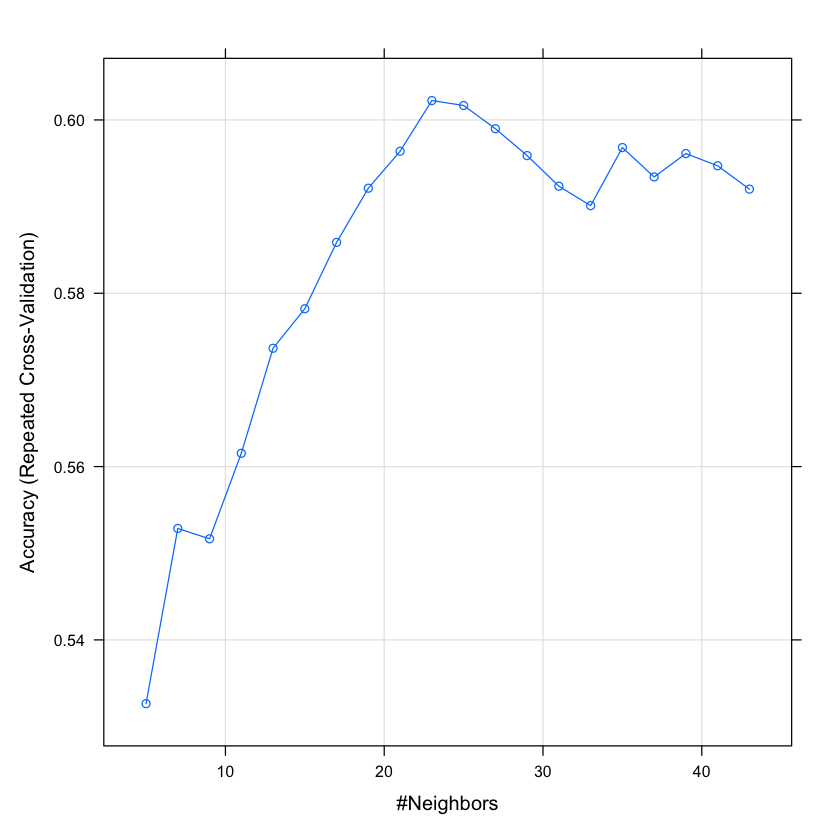

Setting levels: control = NO_PASS, case = PASS

Setting direction: controls < cases



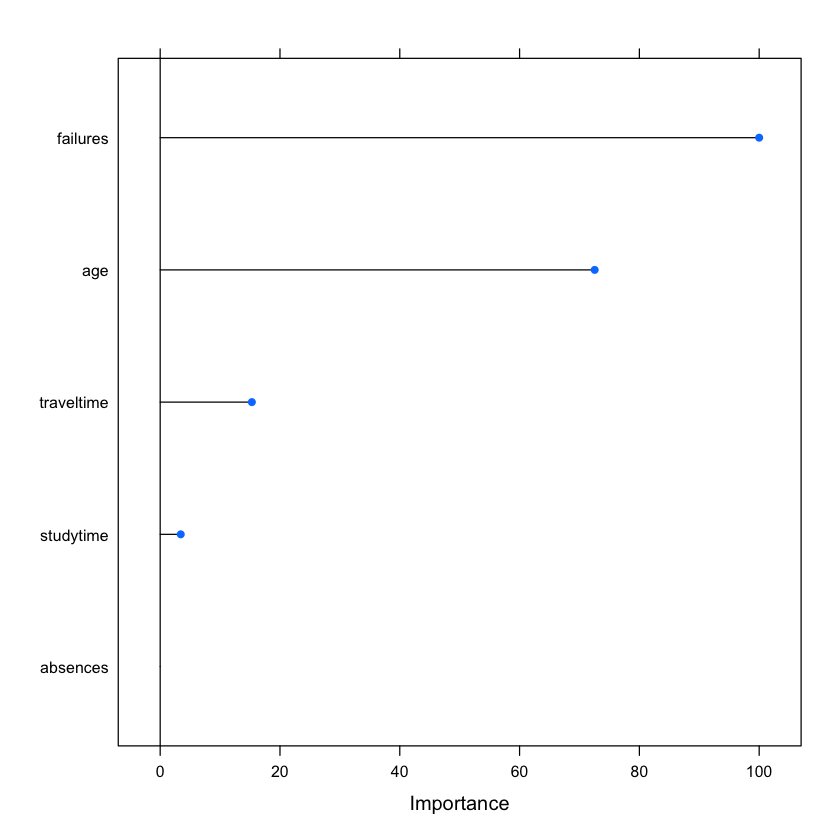

[1] "AUC is : "


Area under the curve: 0.7513

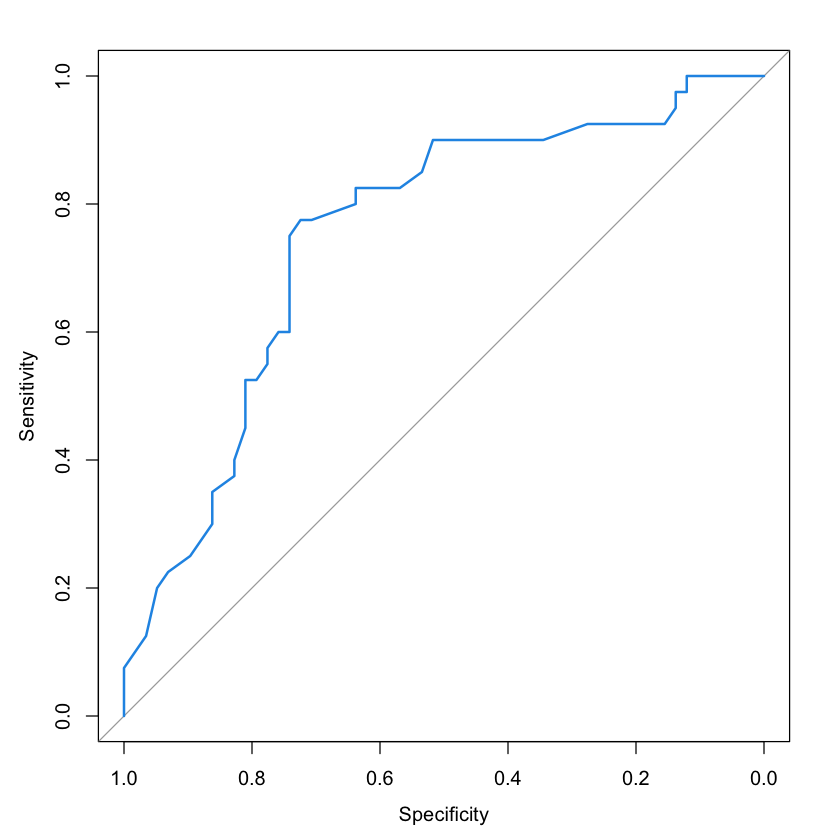

In [41]:
################################################
################################################
## TRAINING 

knnFit <- train( RESULT~ ., 
                 data = training, 
                 method = "knn", 
                 trControl = ctrl, 
                 preProcess = PREPROCESS, 
                 tuneLength = 20)

## OUTPUT :
knnFit

## png("the.results.knn.FIT.png")
plot(knnFit)
## dev.off()

## PREDICTIONS :
knnPredict <- predict(knnFit, newdata = testing)

## CONFUSION MATRIX
confusionMatrix_knn = confusionMatrix(knnPredict, testing$RESULT, mode = "everything")
# confusionMatrix(knnPredict, testing$RESULT, mode = "prec_recall" )

## ACCURACY 
## print("the ACCURACY of KNN model is :")
## mean(knnPredict == testing$RESULT)

## VARIABLE IMPORTANCE :
knnFit.vip <- varImp(knnFit)
print(knnFit.vip)
plot(knnFit.vip)

## ROC :
## Obtaining predicted probabilites for Test data
knn.probs = predict(knnFit,
                   newdata = testing,
                   type="prob")

rocCurve.knn <- roc(testing$RESULT, knn.probs[,"PASS"])
plot(rocCurve.knn, col=c(4))
print("AUC is : ")
auc(rocCurve.knn)

rocCurve.knn.auc = auc(rocCurve.knn) 

In [42]:
# using ANN 

size decay Accuracy  Kappa      AccuracySD KappaSD  
1 1    0e+00 0.5811201 0.09262835 0.07566388 0.1525819
2 1    1e-04 0.5727723 0.08257706 0.08003814 0.1550344
3 1    1e-01 0.6012933 0.13684265 0.08178971 0.1679887
4 3    0e+00 0.5628076 0.07391710 0.08896841 0.1849446
5 3    1e-04 0.5652673 0.08242408 0.09073858 0.1881475
6 3    1e-01 0.5798880 0.09862474 0.07891792 0.1664866

size decay Accuracy  Kappa      AccuracySD KappaSD  
4 3    0e+00 0.5628076 0.07391710 0.08896841 0.1849446
5 3    1e-04 0.5652673 0.08242408 0.09073858 0.1881475
6 3    1e-01 0.5798880 0.09862474 0.07891792 0.1664866
7 5    0e+00 0.5512799 0.06868477 0.09597252 0.1895578
8 5    1e-04 0.5544008 0.07133422 0.07564435 0.1608768
9 5    1e-01 0.5842985 0.12389857 0.08569400 0.1758433

Neural Network 

297 samples
  5 predictor
  2 classes: 'NO_PASS', 'PASS' 

Pre-processing: centered (5), scaled (5), bagged tree imputation (5) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 267, 268, 267, 266, 267, 267, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa     
  1     0e+00  0.5811201  0.09262835
  1     1e-04  0.5727723  0.08257706
  1     1e-01  0.6012933  0.13684265
  3     0e+00  0.5628076  0.07391710
  3     1e-04  0.5652673  0.08242408
  3     1e-01  0.5798880  0.09862474
  5     0e+00  0.5512799  0.06868477
  5     1e-04  0.5544008  0.07133422
  5     1e-01  0.5842985  0.12389857

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 1 and decay = 0.1.
nnet variable importance

           Overall
failures   100.000
age         32.743
absences    20.454
traveltime   8.378
studytime    0.000


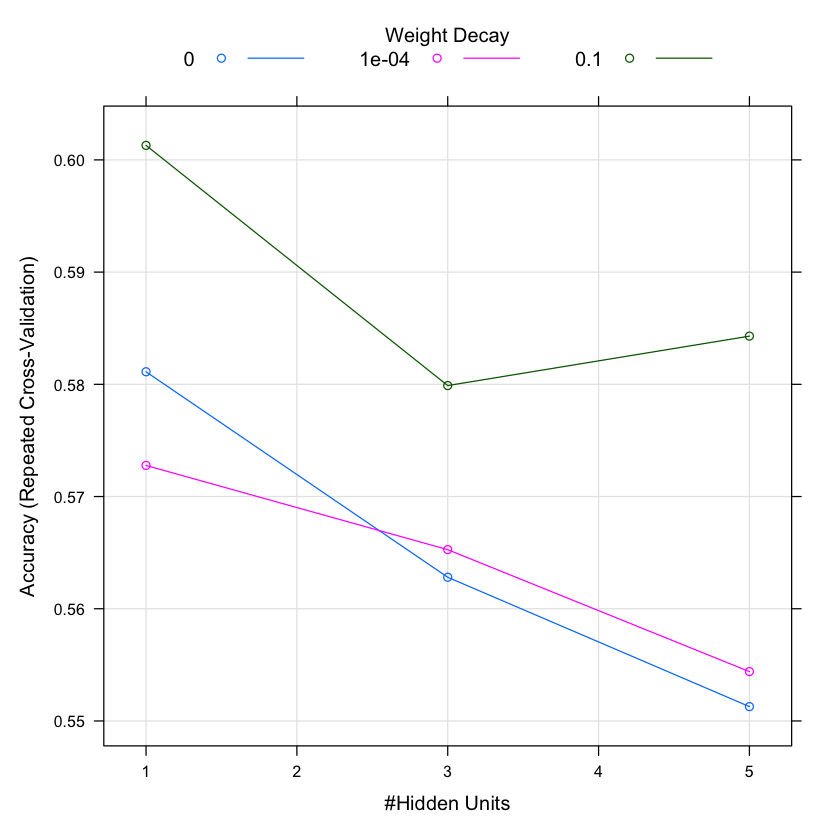

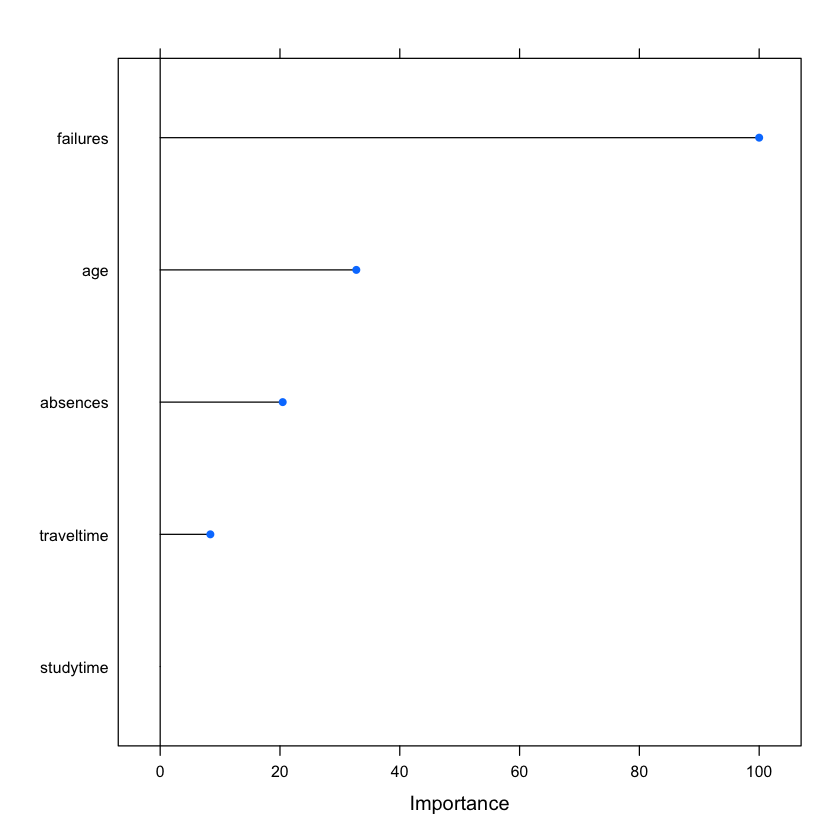

Setting levels: control = NO_PASS, case = PASS

Setting direction: controls < cases



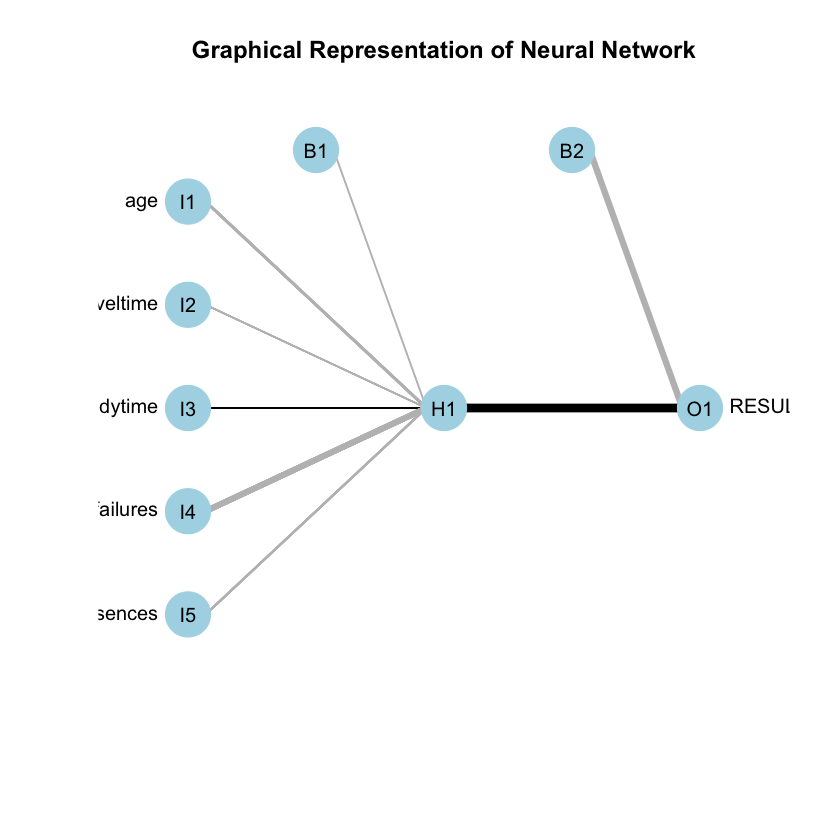

[1] "AUC is : "


Area under the curve: 0.7006

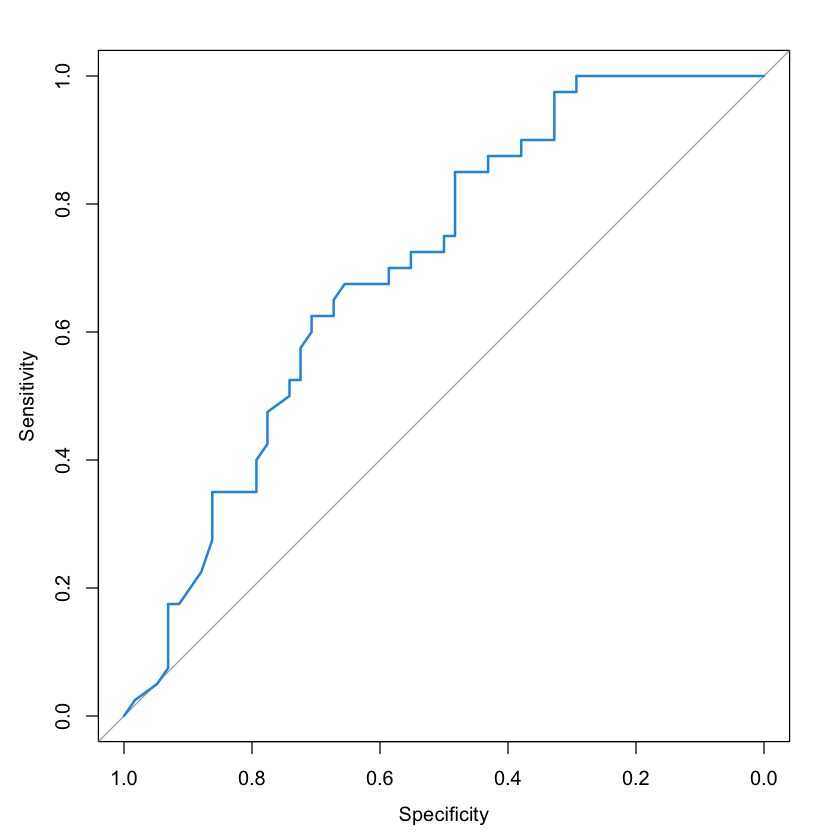

In [43]:
################################################
################################################
## TRAINING
## nnnet package by defualt uses the Logistic Activation function

fit.nn <- train( RESULT~ ., 
                   data = training, 
                   method = "nnet", 
                   trControl = ctrl, 
                   preProcess = PREPROCESS, 
                   trace=FALSE,
                   verbose=FALSE, 
                   # tuneLength = 20, 
                   na.action = na.omit)

## OUTPUT :

# Size: Number of Hidden Layers.
# Decay: Is the regularization factor that offsets overfitting.
# Kappa: Evaluates the match is significant or by chance.

head(fit.nn$results)
tail(fit.nn$results)

# PLOT :
print(fit.nn)
plot(fit.nn)

# PREDICTIONS : 
fit.nn.predict <- predict(fit.nn, newdata = testing)

# CONFUSION MATRIX : 
confusionMatrix_nn = confusionMatrix(fit.nn.predict, testing$RESULT, mode = "everything")
# confusionMatrix(fit.nn.predict, testing$RESULT, mode="prec_recall")

# ACCURACY :
## mean(fit.nn.predict == testing$RESULT)

# VARIABLE IMPORTANCE :
fit.nn.vip <- varImp(fit.nn)
print(fit.nn.vip)
plot(fit.nn.vip)

# Graphical representation of an ANN :

plotnet(fit.nn)
title("Graphical Representation of Neural Network")

# We  may estimate the VARIABLE IMPORTANCE with :
# vip(fit.nn) # in another R package

## ROC :
## Obtaining predicted probabilites for Test data
nn.probs = predict(fit.nn,
                   newdata = testing,
                   type="prob")
# head(nn.probs, 2)

rocCurve.nn <- roc(testing$RESULT, nn.probs[,"PASS"])

plot(rocCurve.nn, col=c(4))

print("AUC is : ")
auc(rocCurve.nn)

rocCurve.nn.auc = auc(rocCurve.nn) 

In [44]:
# TRAINING and PREDICTIONS with ANN
# we are using other libraries :
# suppressPackageStartupMessages(library(NeuralNetTools))
# suppressPackageStartupMessages(library(neuralnet))

In [45]:
############################################
############################################
# LOGISTIC ACTIVATION FUNCTION :

model.nn1 <- neuralnet(RESULT ~ age + traveltime + studytime + failures + absences,
                       data = training, 
                       hidden=2, 
                       act.fct = "logistic", 
                       linear.output = FALSE)

# plot(model.nn1)

# TANH ACTIVATION FUNCTION :

model.nn2 <- neuralnet(RESULT ~ age + traveltime + studytime + failures + absences,
                       data = training, 
                       hidden=2, 
                       act.fct = "tanh", 
                       linear.output = FALSE)

plot(model.nn2)

############################################
############################################

model.nn1.results <- neuralnet::compute(model.nn1, testing)
head(model.nn1.results$net.result)

model.nn2.results <- neuralnet::compute(model.nn2, testing)
head(model.nn2.results$net.result)

############################################
############################################

# model.nn1.results
# model.nn2.results

############################################
############################################

[,1]      [,2]        
2  0.5857846 4.142131e-01
3  1.0000000 2.991789e-21
4  0.4704812 5.294611e-01
19 1.0000000 2.926449e-23
23 0.5023270 4.976304e-01
25 0.4704812 5.294611e-01

[,1]      [,2]     
2  0.5600800 0.4579721
3  0.8311442 0.1190229
4  0.4324364 0.5433503
19 0.8330875 0.1148397
23 0.4797937 0.5144317
25 0.4324364 0.5433503

In [46]:
# Training and Predictions with SVM

In [47]:
# SVM_LINEAR

C Accuracy  Kappa        AccuracySD KappaSD   
1 1 0.5868654 -0.001043655 0.01557121 0.02325575

C Accuracy  Kappa        AccuracySD KappaSD   
1 1 0.5868654 -0.001043655 0.01557121 0.02325575

Support Vector Machines with Linear Kernel 

297 samples
  5 predictor
  2 classes: 'NO_PASS', 'PASS' 

Pre-processing: centered (5), scaled (5), bagged tree imputation (5) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 267, 267, 267, 267, 268, 267, ... 
Resampling results:

  Accuracy   Kappa       
  0.5868654  -0.001043655

Tuning parameter 'C' was held constant at a value of 1
ROC curve variable importance

           Importance
failures      100.000
age            72.538
traveltime     15.307
studytime       3.433
absences        0.000


Setting levels: control = NO_PASS, case = PASS

Setting direction: controls < cases



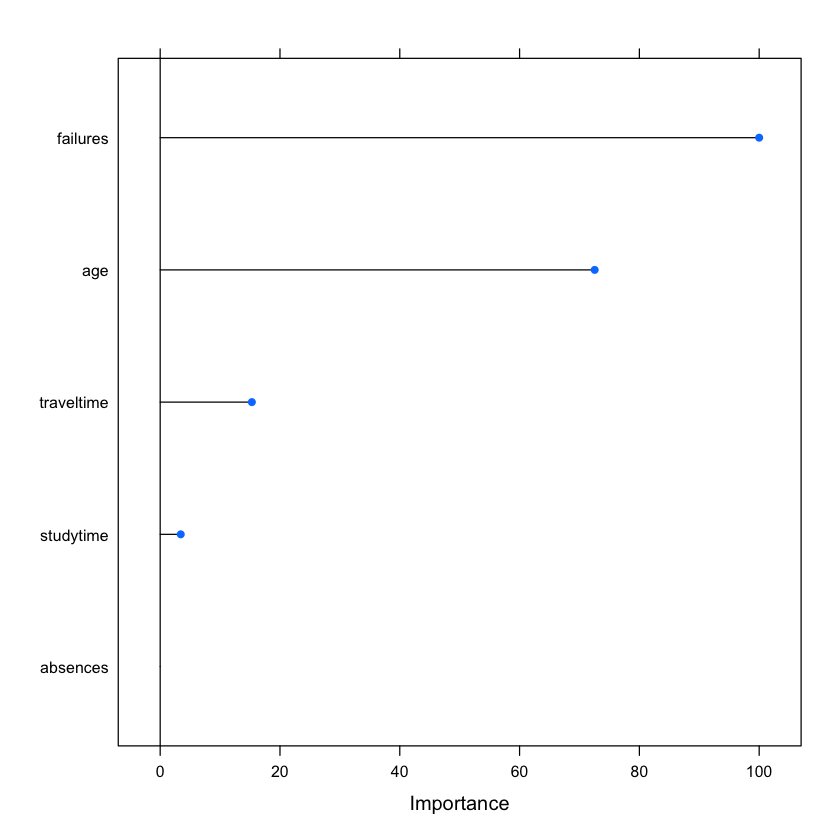

[1] "AUC is : "


Area under the curve: 0.7209

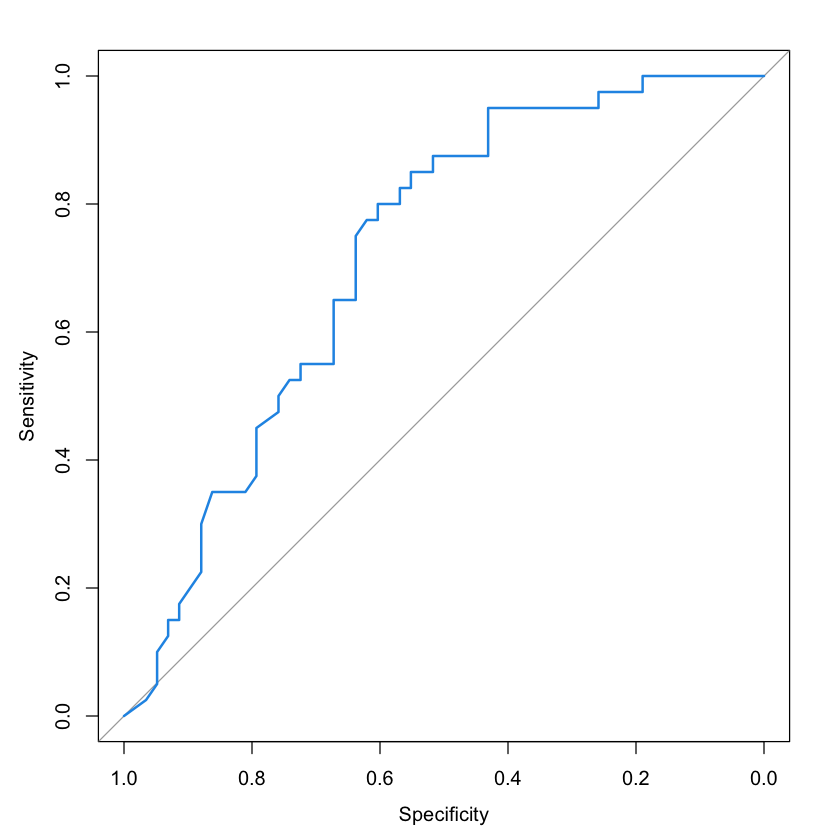

In [48]:
############################################
############################################

svm_Linear <- train( RESULT~ ., 
                     data = training, 
                     method = "svmLinear", 
                     trControl = ctrl, 
                     preProcess = PREPROCESS, 
                     trace=FALSE,
                     verbose=FALSE, 
                     # tuneGrid = grid,
                     # tuneLength = 20, 
                     na.action = na.omit)

## OUTPUT of SVM_LINEAR

head(svm_Linear$results)
tail(svm_Linear$results)
print(svm_Linear)

## PREDICTIONS :

svm_Linear_predict <- predict(svm_Linear, newdata = testing)

## CONFUSION MATRIX :

confusionMatrix_svmLinear = confusionMatrix(svm_Linear_predict, testing$RESULT, mode = "everything")

### ACCURACY :
### mean(svm_Linear_predict == testing$RESULT )

## VARIABLE IMPORTANCE
 
svm_Linear.vip <- varImp(svm_Linear)
print(svm_Linear.vip)
plot(svm_Linear.vip)

## ROC :
## Obtaining predicted probabilites for Test data
svm_Linear.probs = predict(svm_Linear,
                   newdata = testing,
                   type="prob")
rocCurve.svm_Linear <- roc(testing$RESULT, svm_Linear.probs[,"PASS"])

plot(rocCurve.svm_Linear, col=c(4))

print("AUC is : ")
auc(rocCurve.svm_Linear)

rocCurve.svm_Linear.auc = auc(rocCurve.svm_Linear)

In [49]:
# SVM_RADIAL

sigma     C    Accuracy  Kappa      AccuracySD KappaSD  
1 0.2676214 0.25 0.5975721 0.06912880 0.05851943 0.1349483
2 0.2676214 0.50 0.6026693 0.07573697 0.05478927 0.1273473
3 0.2676214 1.00 0.5805117 0.01150222 0.04885829 0.1074628

sigma     C    Accuracy  Kappa      AccuracySD KappaSD  
1 0.2676214 0.25 0.5975721 0.06912880 0.05851943 0.1349483
2 0.2676214 0.50 0.6026693 0.07573697 0.05478927 0.1273473
3 0.2676214 1.00 0.5805117 0.01150222 0.04885829 0.1074628

Support Vector Machines with Radial Basis Function Kernel 

297 samples
  5 predictor
  2 classes: 'NO_PASS', 'PASS' 

Pre-processing: centered (5), scaled (5), bagged tree imputation (5) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 267, 268, 267, 266, 267, 267, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa     
  0.25  0.5975721  0.06912880
  0.50  0.6026693  0.07573697
  1.00  0.5805117  0.01150222

Tuning parameter 'sigma' was held constant at a value of 0.2676214
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.2676214 and C = 0.5.
ROC curve variable importance

           Importance
failures      100.000
age            72.538
traveltime     15.307
studytime       3.433
absences        0.000


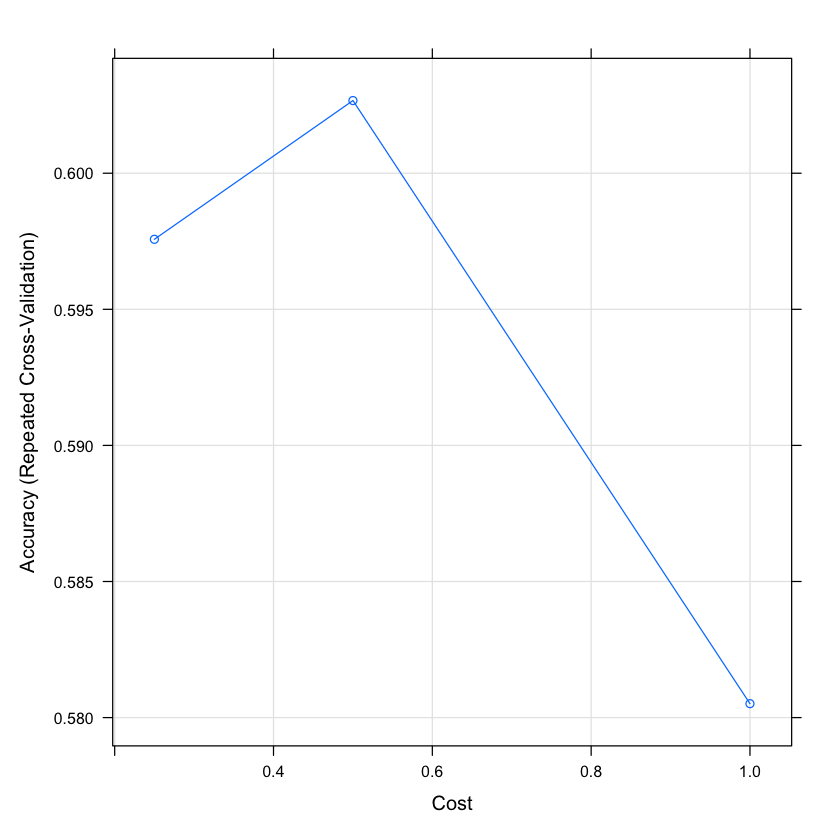

Setting levels: control = NO_PASS, case = PASS

Setting direction: controls < cases



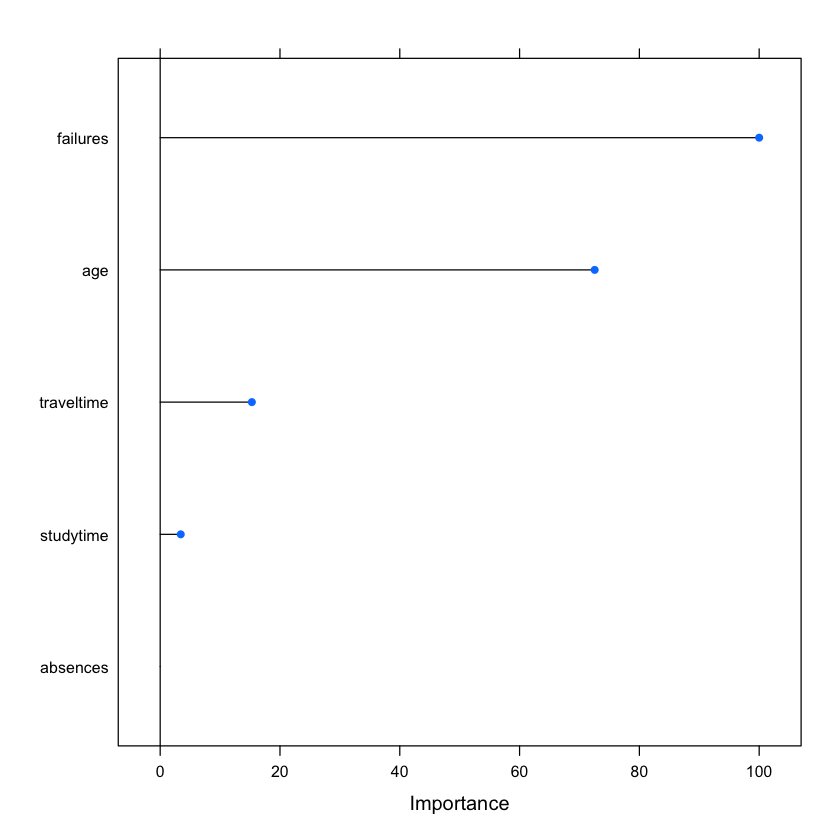

[1] "AUC is : "


Area under the curve: 0.6769

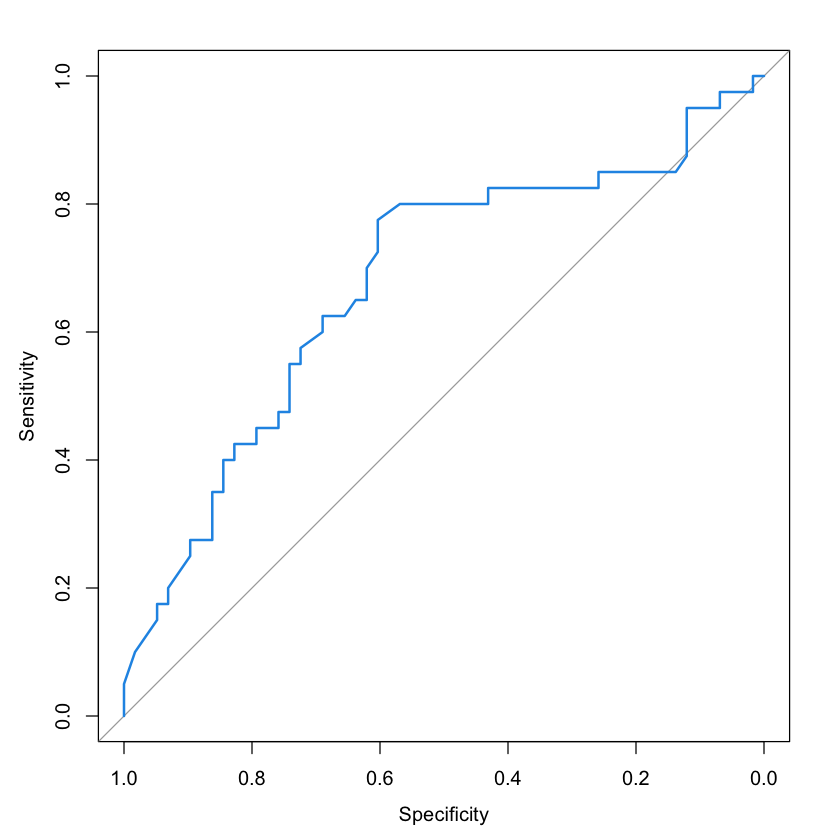

In [50]:
############################################
############################################
# grid <- expand.grid(C = c(0,0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 5))

svm_Radial <- train( RESULT~ ., 
                   data = training, 
                   method = "svmRadial", 
                   trControl = ctrl, 
                   preProcess = PREPROCESS, 
                   trace=FALSE,
                   verbose=FALSE, 
                   # tuneGrid = grid,
                   # tuneLength = 20, 
                   na.action = na.omit)

## OUTPUT of SVM_RADIAL 
head(svm_Radial$results)
tail(svm_Radial$results)

print(svm_Radial)
plot(svm_Radial)

## PREDICTIONS
svm_Radial_predict <- predict(svm_Radial, newdata = testing)

## CONFUSION MATRIX :
confusionMatrix_svmRadial = confusionMatrix(svm_Radial_predict, testing$RESULT, mode = "everything")
# confusionMatrix(svm_Radial_predict, testing$RESULT, mode = "prec_recall")

## ACCURACY : 
## mean(svm_Radial_predict == testing$RESULT)

## VARIABLE IMPORTANCE :
svm_Radial.vip <- varImp(svm_Radial)
print(svm_Radial.vip)
plot(svm_Radial.vip)

## ROC :
## Obtaining predicted probabilites for Test data
svm_Radial.probs = predict(svm_Radial,
                   newdata = testing,
                   type="prob")
rocCurve.svm_Radial <- roc(testing$RESULT, svm_Radial.probs[,"PASS"])
plot(rocCurve.svm_Radial, col=c(4))

print("AUC is : ")
auc(rocCurve.svm_Radial)

rocCurve.svm_Radial.auc = auc(rocCurve.svm_Radial)  

In [51]:
## in other R LIBRARY :

## TRAINING

model.ksvm1 <- ksvm(RESULT ~ age + traveltime + studytime + failures + absences, 
                    data = training, 
                    kernel="rbfdot")
model.ksvm1

model.ksvm2 <- ksvm(RESULT ~ age + traveltime + studytime + failures + absences, 
                    data = training, 
                    kernel="tanhdot")
model.ksvm2

# PREDICTIONS

model.ksvm1.results <- predict(model.ksvm1, testing, type="response")
head(model.ksvm1.results)

table(model.ksvm1.results, testing$RESULT)
agreement1 <-  model.ksvm1.results == testing$RESULT
table(agreement1)
prop.table(table(agreement1))

model.ksvm2.results <- predict(model.ksvm2, testing, type="response")
head(model.ksvm2.results)

table(model.ksvm2.results, testing$RESULT)
agreement2 <-  model.ksvm2.results == testing$RESULT
table(agreement2)
prop.table(table(agreement2))

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.270871082106787 

Number of Support Vectors : 257 

Objective Function Value : -217.5783 
Training error : 0.340067 

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Hyperbolic Tangent kernel function. 
 Hyperparameters : scale =  1  offset =  1 

Number of Support Vectors : 163 

Objective Function Value : -1111.268 
Training error : 0.538721 

[1] NO_PASS NO_PASS NO_PASS NO_PASS NO_PASS NO_PASS
Levels: NO_PASS PASS

                   
model.ksvm1.results NO_PASS PASS
            NO_PASS      48   27
            PASS         10   13

agreement1
FALSE  TRUE 
   37    61 

agreement1
   FALSE     TRUE 
0.377551 0.622449 

[1] PASS    NO_PASS PASS    NO_PASS PASS    PASS   
Levels: NO_PASS PASS

                   
model.ksvm2.results NO_PASS PASS
            NO_PASS      29   25
            PASS         29   15

agreement2
FALSE  TRUE 
   54    44 

agreement2
    FALSE      TRUE 
0.5510204 0.4489796 

In [52]:
## LDA

parameter Accuracy Kappa      AccuracySD KappaSD  
1 none      0.587304 0.08303738 0.07334952 0.1549316

parameter Accuracy Kappa      AccuracySD KappaSD  
1 none      0.587304 0.08303738 0.07334952 0.1549316

Linear Discriminant Analysis 

297 samples
  5 predictor
  2 classes: 'NO_PASS', 'PASS' 

Pre-processing: centered (5), scaled (5), bagged tree imputation (5) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 267, 266, 268, 267, 267, 268, ... 
Resampling results:

  Accuracy  Kappa     
  0.587304  0.08303738

ROC curve variable importance

           Importance
failures      100.000
age            72.538
traveltime     15.307
studytime       3.433
absences        0.000


Setting levels: control = NO_PASS, case = PASS

Setting direction: controls < cases



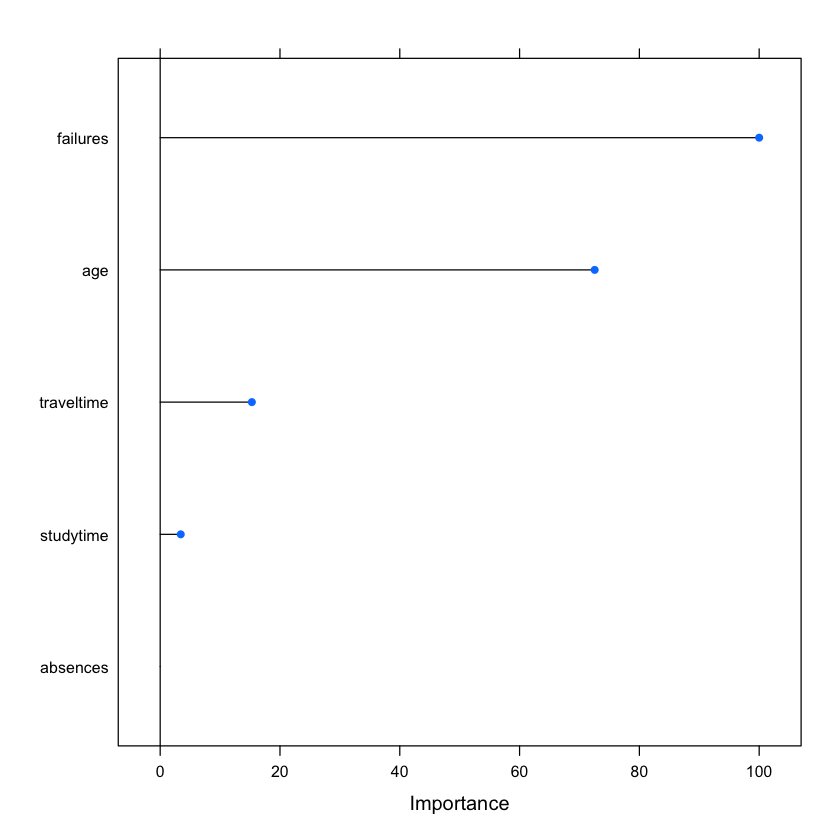

[1] "AUC is : "


Area under the curve: 0.7153

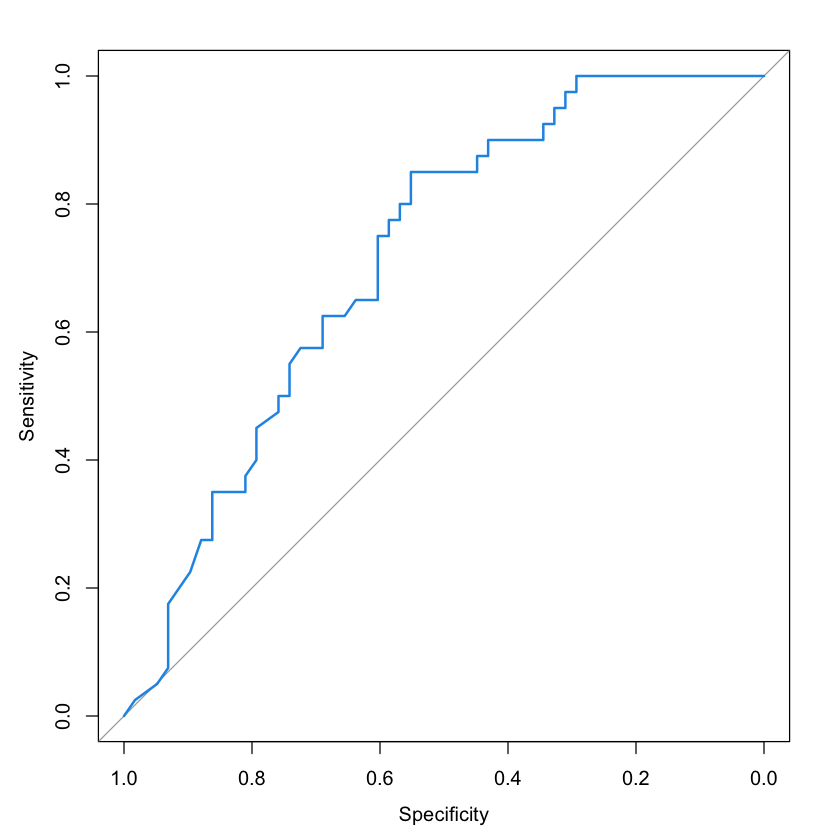

In [53]:
############################################
############################################

ldaFit <- train( RESULT~ ., 
                   data = training, 
                   method = "lda", 
                   trControl = ctrl, 
                   preProcess = PREPROCESS, 
                   trace=FALSE,
                   verbose=FALSE, 
                   # tuneGrid = grid,
                   # tuneLength = 20, 
                   na.action = na.omit)

## OUTPUT of SVM_RADIAL 
head(ldaFit$results)
tail(ldaFit$results)

print(ldaFit)
# plot(ldaFit)

## PREDICTIONS
ldaPredict <- predict(ldaFit, newdata = testing)

## CONFUSION MATRIX :
confusionMatrix_lda = confusionMatrix(ldaPredict, testing$RESULT, mode = "everything") 
## confusionMatrix(ldaPredict, testing$RESULT, mode = "prec_recall") 

## ACCURACY : 
## mean(ldaPredict == testing$RESULT)

## VARIABLE IMPORTANCE :
ldaFit.vip <- varImp(ldaFit)
print(ldaFit.vip)
plot(ldaFit.vip)

## ROC :
## Obtaining predicted probabilites for Test data
ldaFit.probs = predict(ldaFit,
                   newdata = testing,
                   type="prob")

rocCurve.ldaFit <- roc(testing$RESULT, ldaFit.probs[,"PASS"])
plot(rocCurve.ldaFit, col=c(4))

print("AUC is : ")
auc(rocCurve.ldaFit)

rocCurve.ldaFit.auc = auc(rocCurve.ldaFit)

In [54]:
## DECISION TREES

In [55]:
## rpart : Recursive Partitioning and is used for constructing decision trees. 
## Decision trees are built by recursively partitioning the data based on the values of input features.
## rpart: Builds a single decision tree.

# VARIABLE IMPORTANCE with DECISION TREES
# The relative importance of predictor 𝑋 is the sum of the squared improvements over all internal nodes 
# of the tree for which 𝑋 was chosen as the partitioning variables.

CART 

297 samples
  5 predictor
  2 classes: 'NO_PASS', 'PASS' 

Pre-processing: centered (5), scaled (5), bagged tree imputation (5) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 266, 268, 267, 267, 267, 267, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa     
  0.000000000  0.5829726  0.13335200
  0.001725626  0.5829726  0.13335200
  0.003451251  0.5853519  0.13619223
  0.005176877  0.5846974  0.13334178
  0.006902502  0.5856314  0.13594054
  0.008628128  0.5856314  0.13594054
  0.010353753  0.5974427  0.16183525
  0.012079379  0.5967531  0.16020438
  0.013805004  0.6008090  0.16751946
  0.015530630  0.5968161  0.15741710
  0.017256255  0.5968161  0.15741710
  0.018981881  0.5966107  0.15453648
  0.020707506  0.5966107  0.15453648
  0.022433132  0.5969555  0.15511448
  0.024158758  0.5942659  0.14995577
  0.025884383  0.5946199  0.13878721
  0.027610009  0.5797334  0.08997649
  0.029335634  0.5797334  0.089976

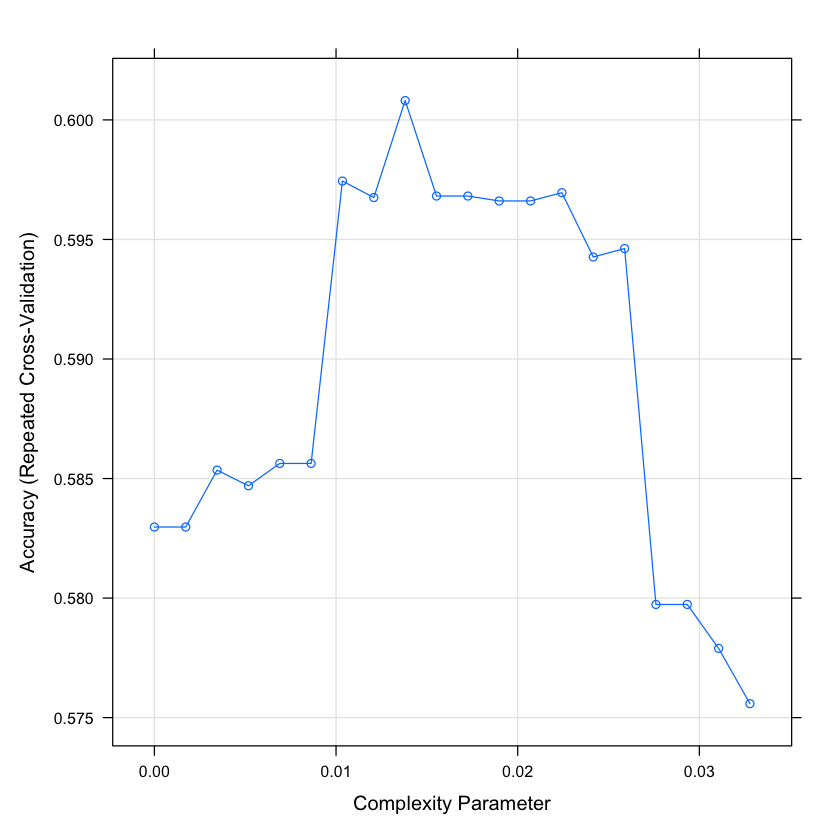

rpart variable importance

           Overall
failures    100.00
studytime    70.62
age          70.47
absences     58.47
traveltime    0.00


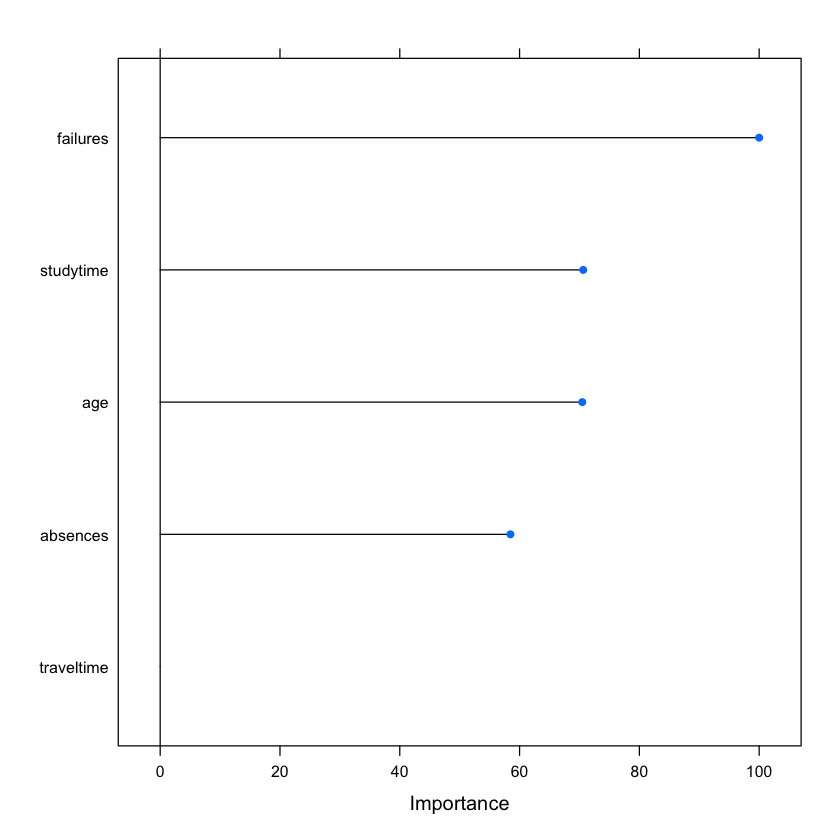

Warning message in text.default(xy$x, xy$y + 0.5 * cxy[2L], rows[left.child], ...):
“"use.n." is not a graphical parameter”
Warning message in text.default(xy$x[leaves], xy$y[leaves] - 0.5 * cxy[2L], stat, :
“"use.n." is not a graphical parameter”


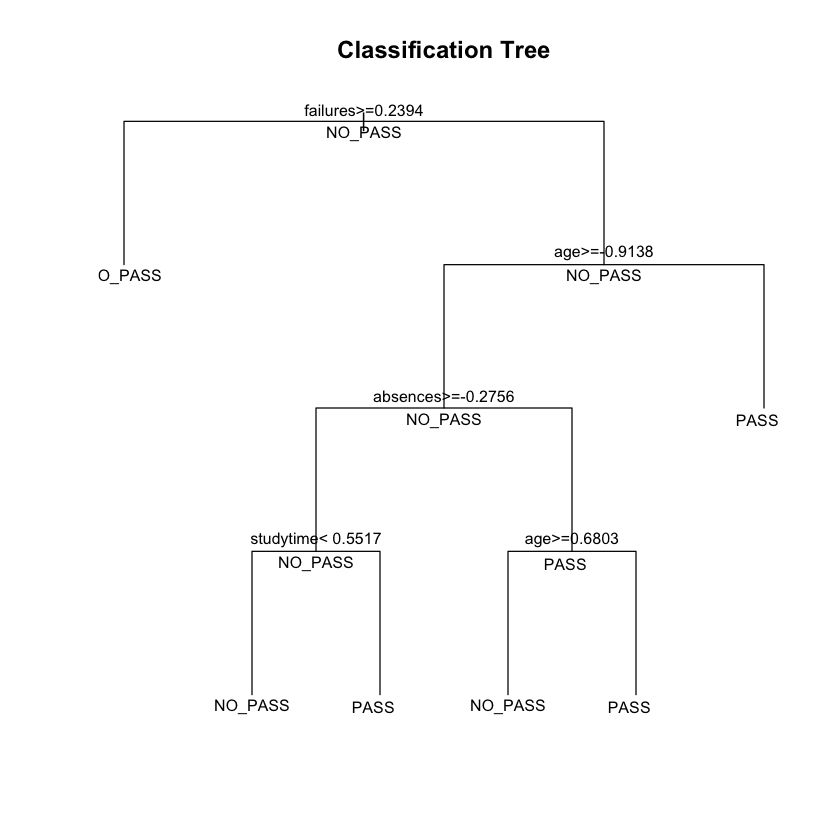

Setting levels: control = NO_PASS, case = PASS

Setting direction: controls < cases



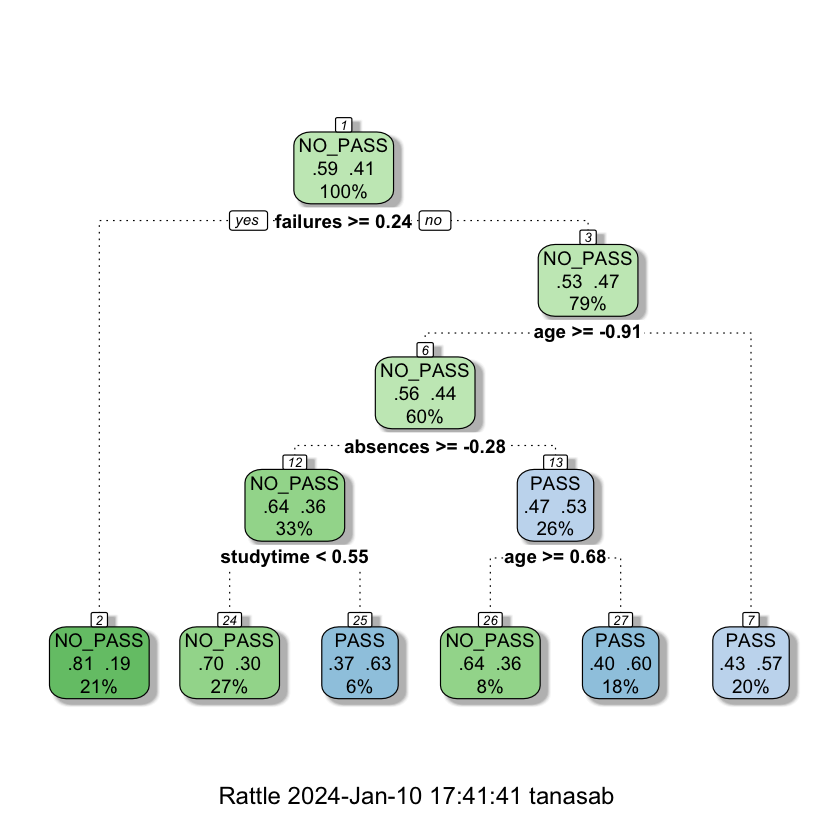

[1] "AUC is : "


Area under the curve: 0.706

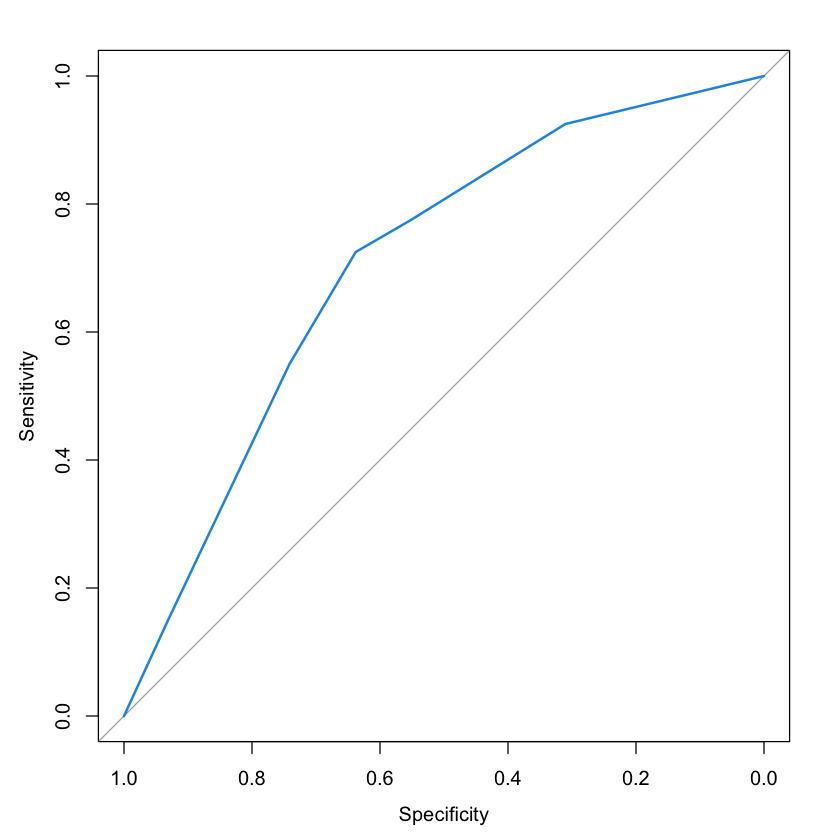

In [56]:
rpartFit <- train( RESULT~ ., 
                 data = training, 
                 method = "rpart", 
                 trControl = ctrl, 
                 preProcess = PREPROCESS, 
                 tuneLength = 20)

## OUTPUT :
rpartFit

## summary(rpartFit$finalModel)
## it outputs a very long summary

## PLOT : 
plot(rpartFit)

## PREDICTIONS :
rpartPredict <- predict(rpartFit, newdata = testing)

## CONFUSION MATRIX and
confusionMatrix_rpart = confusionMatrix(rpartPredict, testing$RESULT, mode = "everything")
# confusionMatrix(rpartPredict, testing$RESULT, mode = "prec_recall")

## ACCURACY :
## mean(rpartPredict == testing$RESULT)

## VARIABLE IMPORTANCE
rpartFit.vip <- varImp(rpartFit)
plot(rpartFit.vip)
print(rpartFit.vip)

## DISPLAYING THE TREE

plot(rpartFit$finalModel, 
    uniform=TRUE,
    main="Classification Tree")
text(rpartFit$finalModel, use.n.=TRUE, all=TRUE, cex=.8)

fancyRpartPlot(rpartFit$finalModel)

## ROC :
## Obtaining predicted probabilites for Test data
rpartFit.probs = predict(rpartFit,
                   newdata = testing,
                   type="prob")

rocCurve.rpartFit <- roc(testing$RESULT, rpartFit.probs[,"PASS"])
plot(rocCurve.rpartFit, col=c(4))

print("AUC is : ")
auc(rocCurve.rpartFit)

rocCurve.rpartFit.auc = auc(rocCurve.rpartFit)

In [57]:
# LOGISTIC REGRESSION

Generalized Linear Model 

297 samples
  5 predictor
  2 classes: 'NO_PASS', 'PASS' 

Pre-processing: centered (5), scaled (5), bagged tree imputation (5) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 267, 266, 268, 267, 267, 268, ... 
Resampling results:

  Accuracy   Kappa    
  0.5905172  0.1030058


glm variable importance

           Overall
failures    100.00
age          31.44
absences     22.92
traveltime   19.33
studytime     0.00


Setting levels: control = NO_PASS, case = PASS

Setting direction: controls < cases



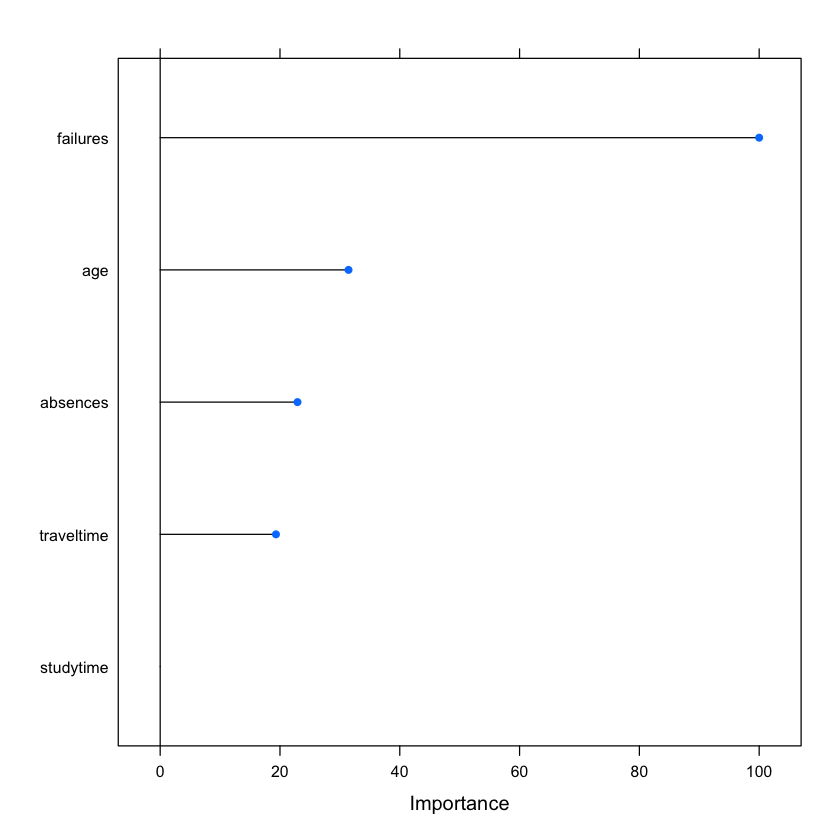

[1] "AUC is : "


Area under the curve: 0.7157

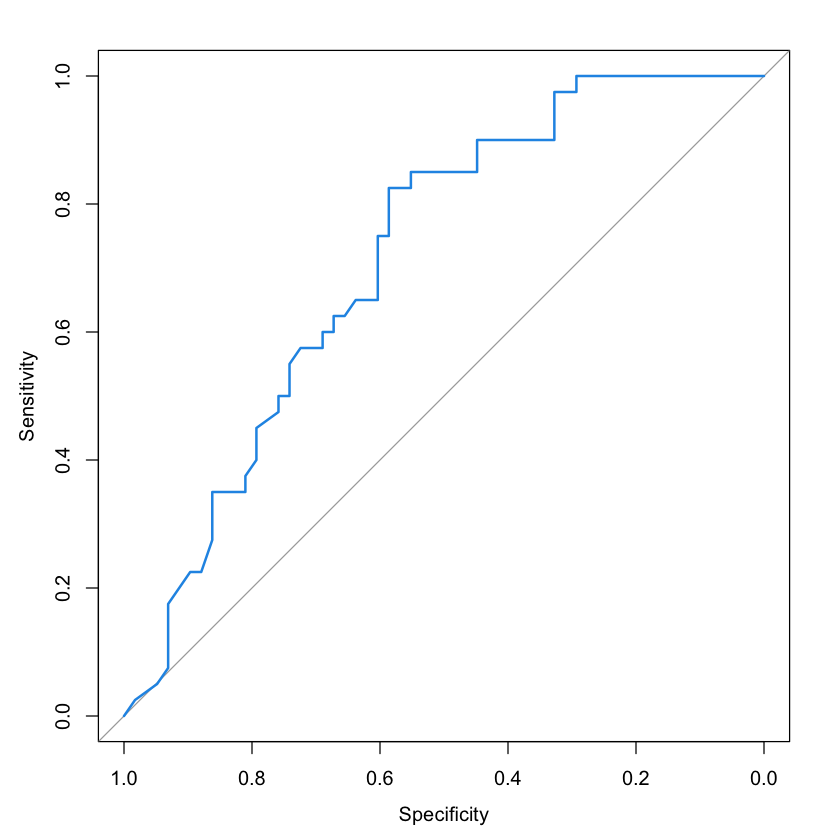

In [58]:
## TRAINING
## In the caret package in R, the method to use for logistic regression is typically specified as "glm" 
## (Generalized Linear Model) with the family set to "binomial".

logisticFit = train( RESULT ~ .,
  data = training,
  trControl = ctrl,
  method = "glm",
  family = "binomial", 
  preProcess = PREPROCESS, 
  tuneLength = 20)

## OUTPUT : 
logisticFit

## PREDICTIONS 
logisticPredict <- predict(logisticFit, newdata = testing)

## CONFUSION MATRIX 
confusionMatrix_logistic = confusionMatrix(logisticPredict, testing$RESULT, mode = "everything")
## confusionMatrix(logisticPredict, testing$RESULT, mode = "prec_recall")

## ACCURACY :
## mean(logisticPredict == testing$RESULT)

## VARIABLE IMPORTANCE
logisticFit.vip <- varImp(logisticFit)
plot(logisticFit.vip)
print(logisticFit.vip)

## ROC :
## Obtaining predicted probabilites for Test data
logisticFit.probs = predict(logisticFit,
                   newdata = testing,
                   type="prob")

# head(bagg.probs, 2)

rocCurve.logisticFit <- roc(testing$RESULT, logisticFit.probs[,"PASS"])
plot(rocCurve.logisticFit, col=c(4))

print("AUC is : ")
auc(rocCurve.logisticFit)

rocCurve.logisticFit.auc = auc(rocCurve.logisticFit)

In [59]:
## NAIVE BAYES


 NO_PASS     PASS 
58.92256 41.07744 


 NO_PASS     PASS 
59.18367 40.81633 

Naive Bayes 

297 samples
  5 predictor
  2 classes: 'NO_PASS', 'PASS' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 266, 268, 268, 268, 268, 267, ... 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE      0.5543300  0.1711831
   TRUE      0.5464835  0.1562265

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 0, usekernel = FALSE and adjust
 = 1.

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 64”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 81”


ROC curve variable importance

           Importance
failures      100.000
age            72.538
traveltime     15.307
studytime       3.433
absences        0.000


Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 64”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 81”
Setting levels: control = NO_PASS, case = PASS

Setting direction: controls < cases



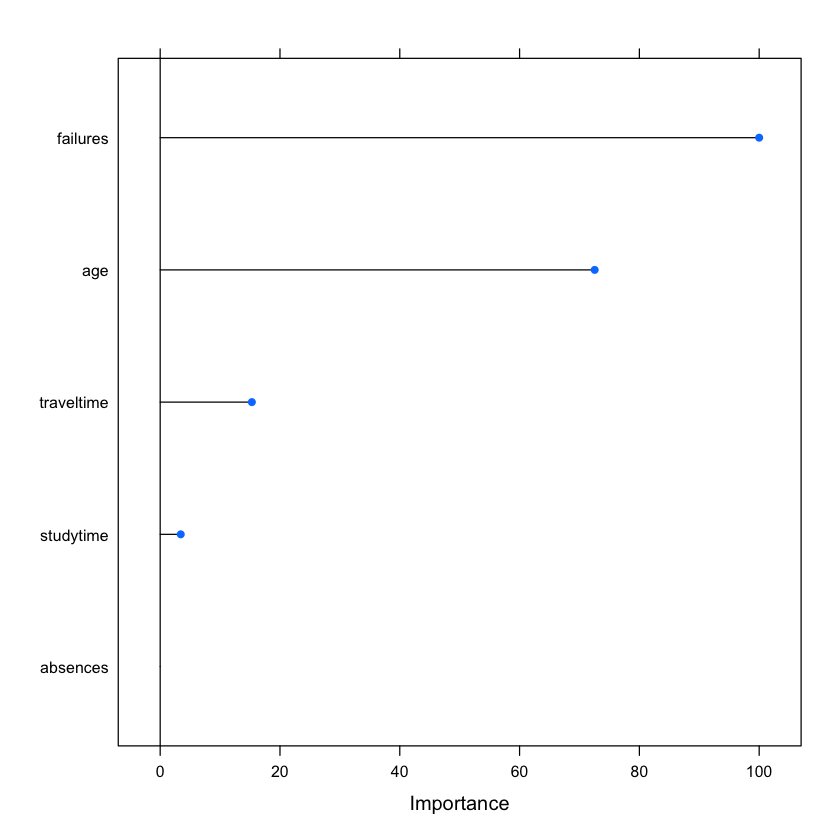

[1] "AUC is : "


Area under the curve: 0.7269

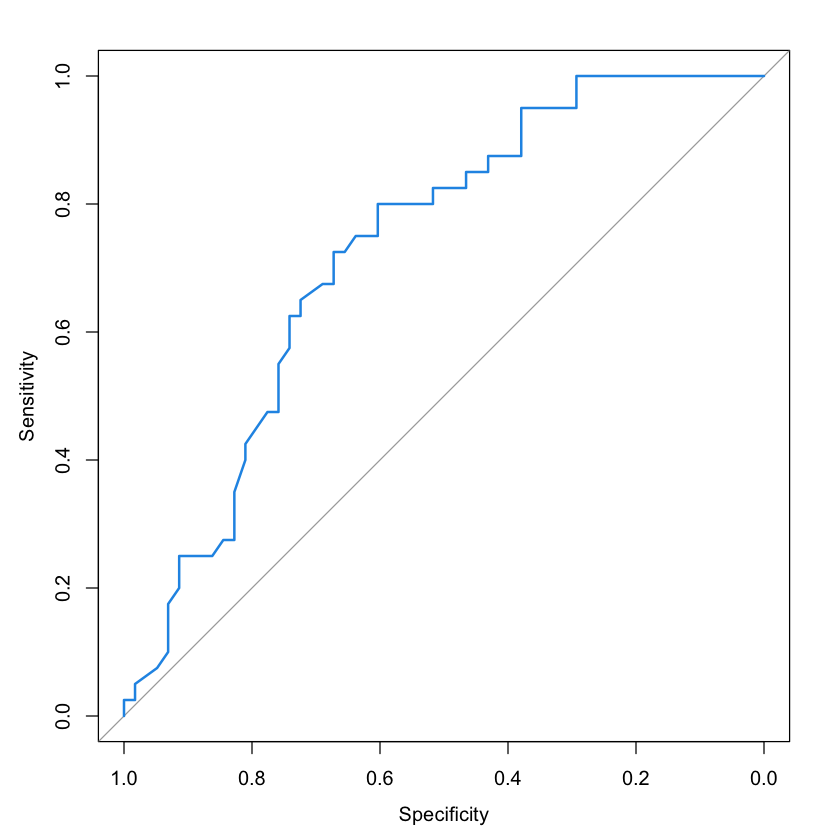

In [60]:
### THE BALANCE of the DATA in TRAINING and TESTING SETS

prop.table(table(training$RESULT)) * 100
prop.table(table(testing$RESULT)) * 100

## TRAINING : 

nbFit = train( RESULT~ ., 
                 data = training, 
                 method = "nb", 
                 # preProcess = PREPROCESS, 
                 trControl = ctrl) 

# OUTPUT :
nbFit

# PREDICT :
nbPredict <- predict(nbFit, newdata = testing)

# CONFUSION MATRIX :
confusionMatrix_nb = confusionMatrix(nbPredict, testing$RESULT, mode = "everything")

## ACCURACY :
## mean(nbPredict == testing$RESULT)

## VARIABLE IMPORTANCE :
nbFit.vip <- varImp(nbFit)
plot(nbFit.vip)
print(nbFit.vip)

## ROC :
## Obtaining predicted probabilites for Test data
nbFit.probs = predict(nbFit,
                   newdata = testing,
                   type="prob")
rocCurve.nbFit <- roc(testing$RESULT, nbFit.probs[,"PASS"])
plot(rocCurve.nbFit, col=c(4))

print("AUC is : ")
auc(rocCurve.nbFit)

rocCurve.nbFit.auc = auc(rocCurve.nbFit)

In [61]:
# TREE BAG

Bagged CART 

297 samples
  5 predictor
  2 classes: 'NO_PASS', 'PASS' 

Pre-processing: centered (5), scaled (5), bagged tree imputation (5) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 268, 267, 267, 266, 268, 267, ... 
Resampling results:

  Accuracy   Kappa       
  0.5168532  -0.004403754


Bagged CART 

297 samples
  5 predictor
  2 classes: 'NO_PASS', 'PASS' 

Pre-processing: centered (5), scaled (5), bagged tree imputation (5) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 268, 267, 267, 266, 268, 267, ... 
Resampling results:

  Accuracy   Kappa       
  0.5168532  -0.004403754


treebag variable importance

           Overall
absences    100.00
age          57.46
studytime    42.55
traveltime   31.53
failures      0.00


Setting levels: control = NO_PASS, case = PASS

Setting direction: controls < cases




Call:
roc.default(response = testing$RESULT, predictor = bagg.probs[,     "PASS"])

Data: bagg.probs[, "PASS"] in 58 controls (testing$RESULT NO_PASS) < 40 cases (testing$RESULT PASS).
Area under the curve: 0.6341

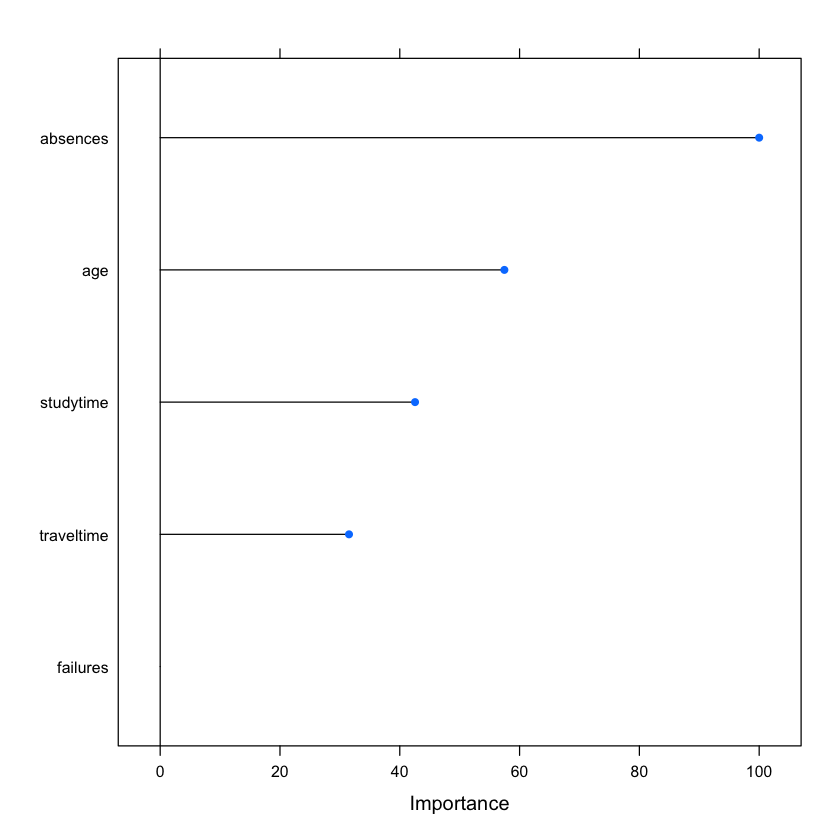

[1] "AUC is : "


Area under the curve: 0.6341

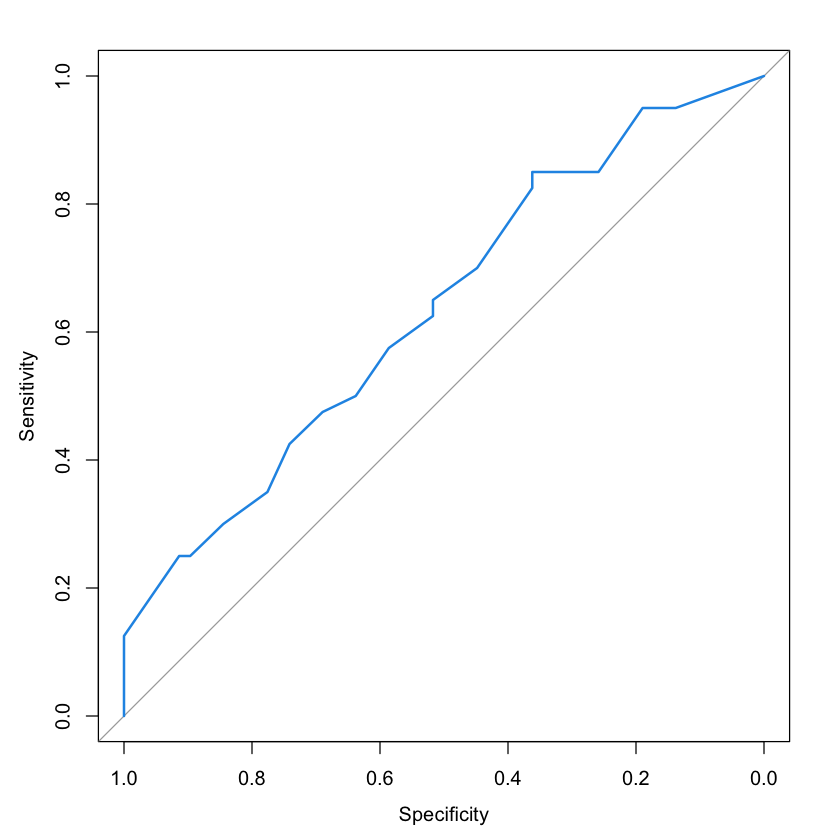

In [62]:
treebagFit <- train( RESULT~ ., 
                 data = training, 
                 method = "treebag", 
                 trControl = ctrl, 
                 preProcess = PREPROCESS, 
                 tuneLength = 20)

treebagFit

## OUTPUT :
treebagFit

# summary(treebagFit$finalModel)
## it outputs a very long summary

## PLOT : 
# plot(treebagFit)

## PREDICTIONS :
treebagPredict <- predict(treebagFit, newdata = testing)

## CONFUSION MATRIX and
confusionMatrix_treebag = confusionMatrix(treebagPredict, testing$RESULT, mode = "everything")
# confusionMatrix(treebagPredict, testing$RESULT, mode = "prec_recall")

## ACCURACY :
## mean(treebagPredict == testing$RESULT)

## VARIABLE IMPORTANCE
treebagFit.vip <- varImp(treebagFit)
plot(treebagFit.vip)
print(treebagFit.vip)

## Obtaining predicted probabilites for Test data
bagg.probs=predict(treebagFit,
                   newdata = testing,
                   type="prob")

rocCurve.bagg <- roc(testing$RESULT, bagg.probs[,"PASS"])
rocCurve.bagg
plot(rocCurve.bagg, col=c(4))

print("AUC is : ")
auc(rocCurve.bagg)

rocCurve.bagg.auc = auc(rocCurve.bagg)

In [63]:
## RANDOM FOREST
## is an ensemble learning method that constructs a multitude of decision trees during 
## training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.

note: only 4 unique complexity parameters in default grid. Truncating the grid to 4 .



Random Forest 

297 samples
  5 predictor
  2 classes: 'NO_PASS', 'PASS' 

Pre-processing: centered (5), scaled (5), bagged tree imputation (5) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 267, 267, 267, 268, 267, 267, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa       
  2     0.5252169  -0.002520034
  3     0.5139281  -0.015394600
  4     0.5197657  -0.005868484
  5     0.5153519  -0.016909822

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

Random Forest 

297 samples
  5 predictor
  2 classes: 'NO_PASS', 'PASS' 

Pre-processing: centered (5), scaled (5), bagged tree imputation (5) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 267, 267, 267, 268, 267, 267, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa       
  2     0.5252169  -0.002520034
  3     0.5139281  -0.015394600
  4     0.5197657  -0.005868484
  5     0.5153519  -0.016909822

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

rf variable importance

           Overall
absences    100.00
age          26.56
studytime    16.01
failures     10.18
traveltime    0.00


Setting levels: control = NO_PASS, case = PASS

Setting direction: controls < cases




Call:
roc.default(response = testing$RESULT, predictor = rf.probs[,     "PASS"])

Data: rf.probs[, "PASS"] in 58 controls (testing$RESULT NO_PASS) < 40 cases (testing$RESULT PASS).
Area under the curve: 0.6987

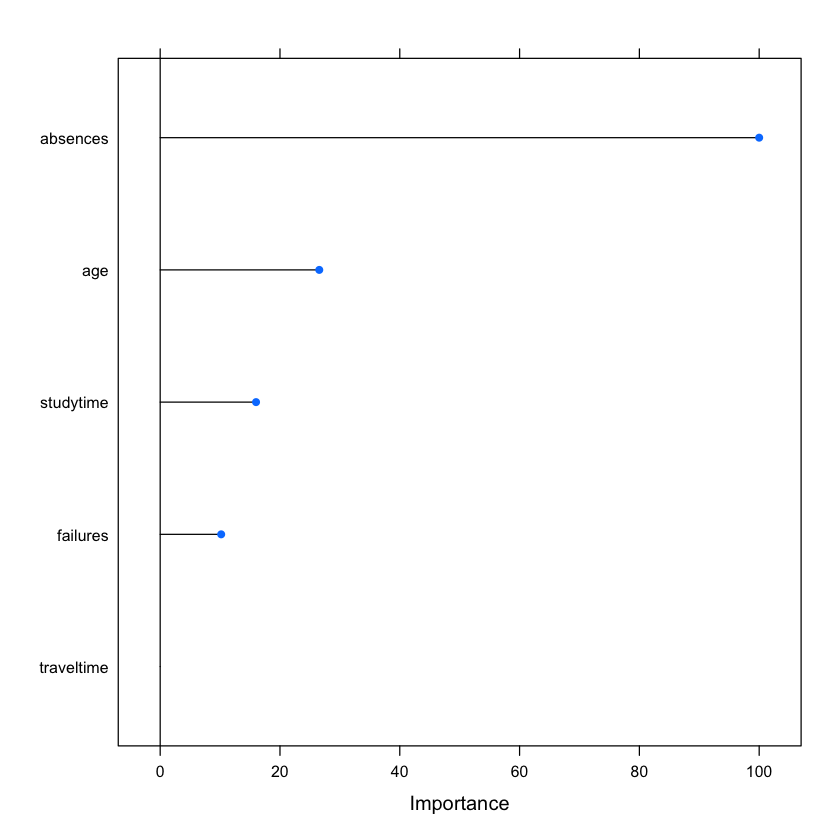

[1] "AUC is : "


Area under the curve: 0.6987

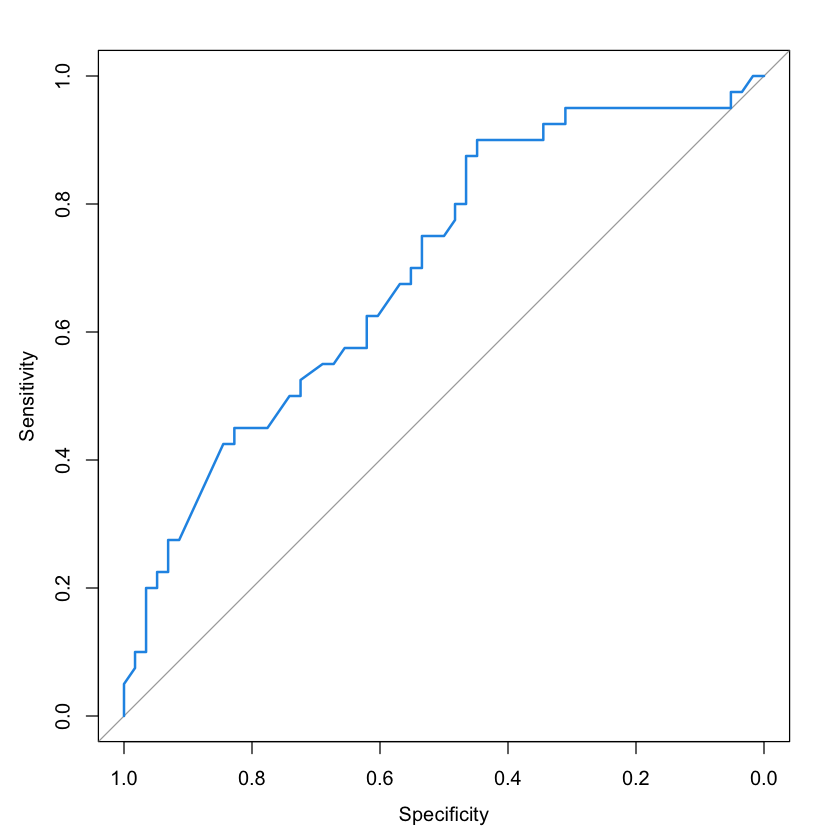

In [64]:
rfFit <- train( RESULT~ ., 
                 data = training, 
                 method = "rf", 
                 trControl = ctrl, 
                 preProcess = PREPROCESS, 
                 tuneLength = 20)

rfFit

## OUTPUT :
rfFit

## summary(rfFit$finalModel)
## it outputs a very long summary

## PLOT : 
## plot(rfFit)

## PREDICTIONS :
rfPredict <- predict(rfFit, newdata = testing)

## CONFUSION MATRIX and
confusionMatrix_rf = confusionMatrix(rfPredict, testing$RESULT, mode = "everything")
# confusionMatrix(rfPredict, testing$RESULT, mode = "prec_recall")

## ACCURACY :
## mean(rfPredict == testing$RESULT)

## VARIABLE IMPORTANCE
rfFit.vip <- varImp(rfFit)
plot(rfFit.vip)
print(rfFit.vip)

## Obtaining predicted probabilites for Test data
rf.probs = predict(rfFit,
                   newdata = testing,
                   type="prob")

rocCurve.rf <- roc(testing$RESULT, rf.probs[,"PASS"])
rocCurve.rf
plot(rocCurve.rf, col=c(4))

print("AUC is : ")
auc(rocCurve.rf)

rocCurve.rf.auc = auc(rocCurve.rf)  

In [65]:
## RANDOM FOREST with BOOSTING
# Idea: Boosting focuses on sequentially training multiple weak learners 
# (models that are slightly better than random guessing) to correct the errors of their predecessors

In [66]:
# modelLookup("ada")
# modelLookup("gbm")

In [67]:
# GBM : Stochastic Gradient Boosting

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3378             nan     0.1000    0.0056
     2        1.3253             nan     0.1000   -0.0006
     3        1.3066             nan     0.1000    0.0030
     4        1.2900             nan     0.1000    0.0024
     5        1.2697             nan     0.1000    0.0009
     6        1.2525             nan     0.1000    0.0032
     7        1.2423             nan     0.1000   -0.0034
     8        1.2378             nan     0.1000   -0.0036
     9        1.2307             nan     0.1000   -0.0044
    10        1.2184             nan     0.1000   -0.0070
    20        1.1668             nan     0.1000   -0.0027
    40        1.1107             nan     0.1000   -0.0048
    50        1.0858             nan     0.1000   -0.0078

gbm variable importance

           Overall
absences    100.00
age          50.50
studytime    16.69
failures     10.23
traveltime    0.00


Setting levels: control = NO_PASS, case = PASS

Setting direction: controls < cases



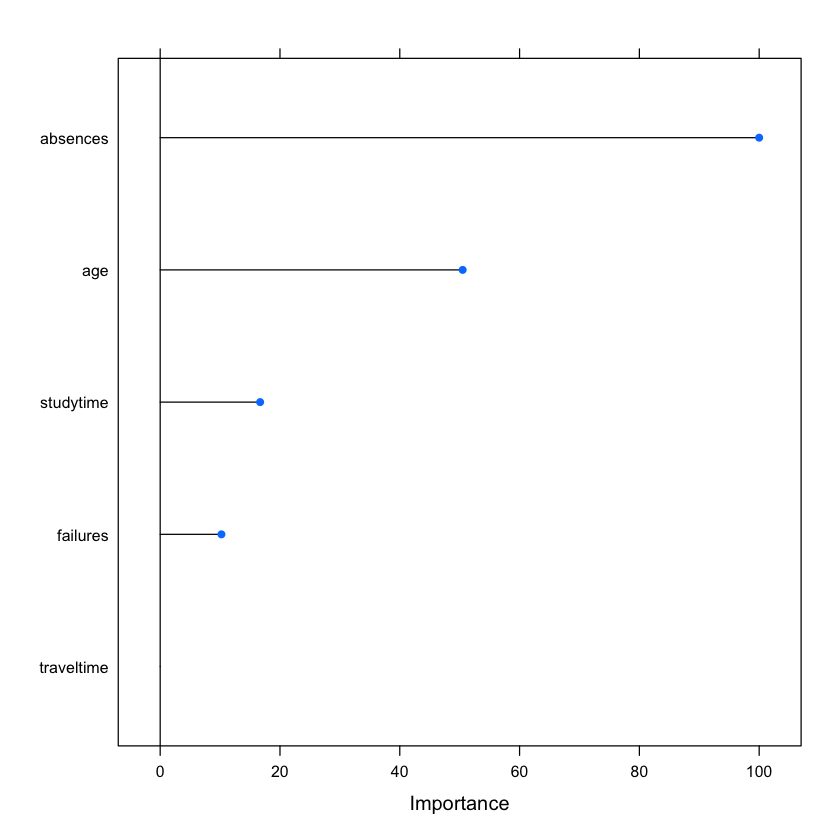

[1] "AUC is : "


Area under the curve: 0.7321

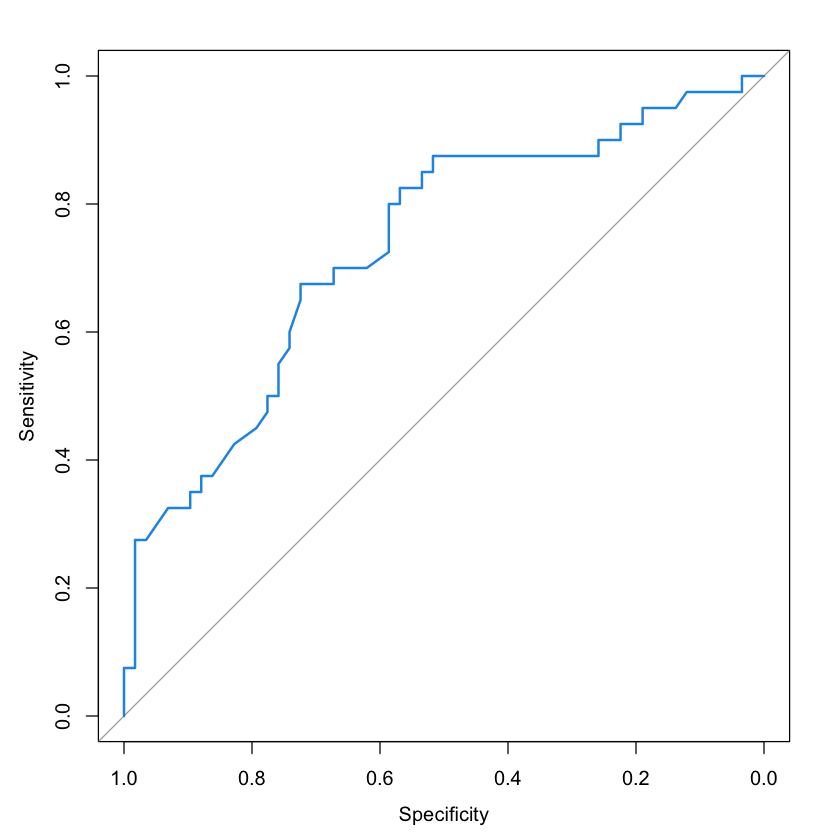

In [68]:
gbmFit <- train( RESULT~ ., 
                 data = training, 
                 method = "gbm", 
                 trControl = ctrl, 
                 preProcess = PREPROCESS, 
                 tuneLength = 20)

## OUTPUT :
## gbmFit

## summary(gbmFit$finalModel)
## it outputs a very long summary

## PLOT : 
## plot(gbmFit)

## PREDICTIONS :
gbmPredict <- predict(gbmFit, newdata = testing)

## CONFUSION MATRIX and
## confusionMatrix(gbmPredict, testing$RESULT, mode = "prec_recall")
confusionMatrix_gbm = confusionMatrix(gbmPredict, testing$RESULT, mode = "everything")

## ACCURACY :
## mean(gbmPredict == testing$RESULT)

## VARIABLE IMPORTANCE
gbmFit.vip <- varImp(gbmFit)
plot(gbmFit.vip)
print(gbmFit.vip)

## Obtaining predicted probabilites for Test data
gbm.probs = predict(gbmFit,
                   newdata = testing,
                   type="prob")
rocCurve.gbm <- roc(testing$RESULT, gbm.probs[,"PASS"])
plot(rocCurve.gbm, col=c(4))

print("AUC is : ")
auc(rocCurve.gbm)

rocCurve.gbm.auc = auc(rocCurve.gbm) 

In [69]:
# Summarize data from these models


Call:
summary.resamples(object = algo_results)

Models: KNN, NNET, SVML, SVMR, DT, LR, NB, LDA, CART, RF, GBM 
Number of resamples: 100 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
KNN  0.4137931 0.5517241 0.6000000 0.6022366 0.6551724 0.7931034    0
NNET 0.3666667 0.5333333 0.6000000 0.6012933 0.6551724 0.7666667    0
SVML 0.5000000 0.5862069 0.5862069 0.5868654 0.6000000 0.6000000    0
SVMR 0.3793103 0.5666667 0.6000000 0.6026693 0.6333333 0.7333333    0
DT   0.4000000 0.5333333 0.6000000 0.6008090 0.6551724 0.8620690    0
LR   0.3666667 0.5483871 0.6000000 0.5905172 0.6551724 0.7666667    0
NB   0.3666667 0.5000000 0.5517241 0.5543300 0.6032258 0.7586207    0
LDA  0.3793103 0.5471264 0.6000000 0.5873040 0.6333333 0.7333333    0
CART 0.2068966 0.4482759 0.5252874 0.5168532 0.6000000 0.7000000    0
RF   0.3448276 0.4666667 0.5333333 0.5252169 0.5806452 0.7000000    0
GBM  0.3793103 0.5172414 0.5666667 0.5707887 0.6206897 0.7666667    0

Kappa 
   


Call:
diff.resamples(x = algo_results)

Models: KNN, NNET, SVML, SVMR, DT, LR, NB, LDA, CART, RF, GBM 
Metrics: Accuracy, Kappa 
Number of differences: 55 
p-value adjustment: bonferroni 

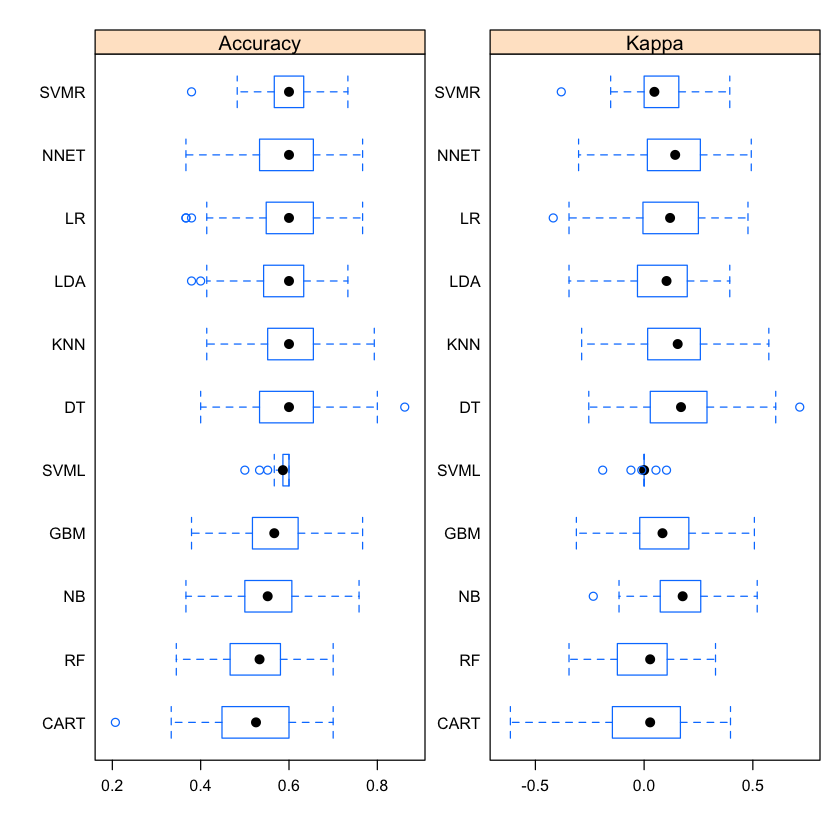

In [70]:
# DIFFERENCE between these ALGORITHMS :

algo_results <- resamples(list( KNN = knnFit,
                                NNET = fit.nn, 
                                SVML = svm_Linear, 
                                SVMR = svm_Radial, 
                                DT = rpartFit, 
                                LR = logisticFit, 
                                NB = nbFit, 
                                LDA = ldaFit,
                                CART = treebagFit,
                                RF = rfFit, 
                                GBM = gbmFit ))   


summary(algo_results)
# dotplot(algo_results)

scales <- list(x=list(relation="free"), y=list(relation="free"))
bwplot(algo_results, scales=scales)

# splom(algo_results)

diffs <- diff(algo_results)
diffs

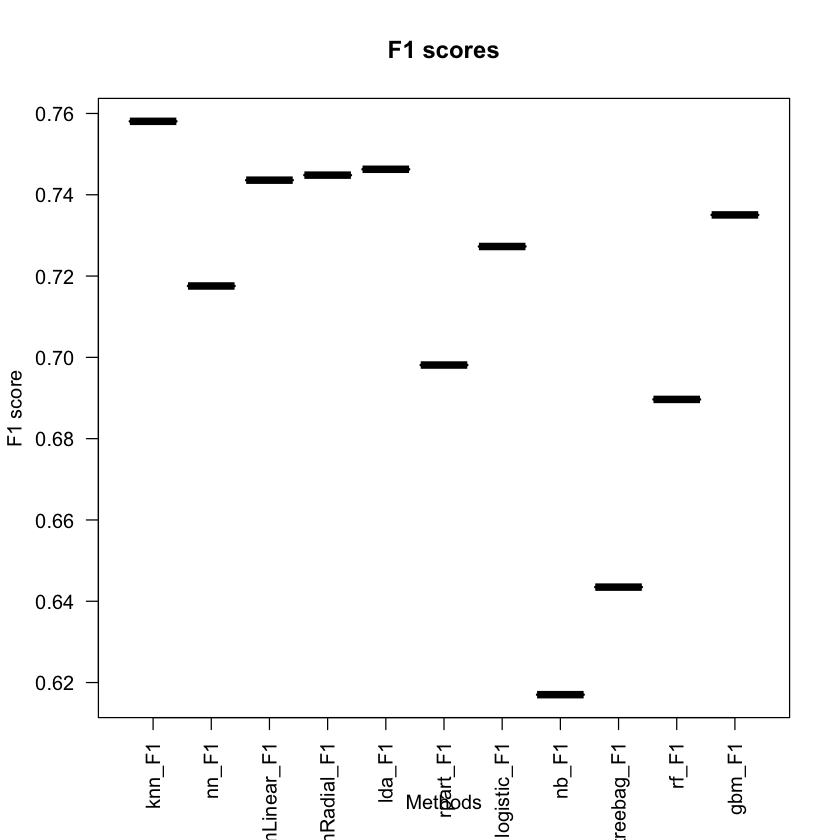

In [71]:
## Combine F1 scores in a LIST : 

F1_scores <- list(
knn_F1 = confusionMatrix_knn$byClass["F1"],
nn_F1 = confusionMatrix_nn$byClass["F1"],
svmLinear_F1 = confusionMatrix_svmLinear$byClass["F1"],
svmRadial_F1 = confusionMatrix_svmRadial$byClass["F1"],
lda_F1 = confusionMatrix_lda$byClass["F1"],
rpart_F1 = confusionMatrix_rpart$byClass["F1"],
logistic_F1 = confusionMatrix_logistic$byClass["F1"],
nb_F1 = confusionMatrix_nb$byClass["F1"],
treebag_F1 = confusionMatrix_treebag$byClass["F1"],
rf_F1 = confusionMatrix_rf$byClass["F1"],
gbm_F1 = confusionMatrix_gbm$byClass["F1"]
)

# Create boxplot
boxplot(F1_scores, 
       main = "F1 scores",
       auto.key = list(columns = 3, space = "right"),
       col = c(1:11), 
       lty = 1, 
       lwd = 2, 
       las = 2, 
       xlab = "Methods", 
       ylab = "F1 score")

In [72]:
## Printing the F1 scores
print("The F1 scores :")

print("KNN")
confusionMatrix_knn$byClass["F1"]
print("Neural Net")
confusionMatrix_nn$byClass["F1"]
print("SVM Linear")
confusionMatrix_svmLinear$byClass["F1"]
print("SVM Radial")
confusionMatrix_svmRadial$byClass["F1"]
print("LDA")
confusionMatrix_lda$byClass["F1"]
print("DT")
confusionMatrix_rpart$byClass["F1"]
print("Logistic Regression")
confusionMatrix_logistic$byClass["F1"]
print("Naive Bayes")
confusionMatrix_nb$byClass["F1"]
print("CART")
confusionMatrix_treebag$byClass["F1"]
print("Random Forest")
confusionMatrix_rf$byClass["F1"]
print("GBM")
confusionMatrix_gbm$byClass["F1"]



[1] "The F1 scores :"
[1] "KNN"


F1 
0.7580645

[1] "Neural Net"


F1 
0.7175573

[1] "SVM Linear"


F1 
0.7435897

[1] "SVM Radial"


F1 
0.7448276

[1] "LDA"


F1 
0.7462687

[1] "DT"


F1 
0.6981132

[1] "Logistic Regression"


F1 
0.7272727

[1] "Naive Bayes"


F1 
0.6170213

[1] "CART"


F1 
0.6434783

[1] "Random Forest"


F1 
0.6896552

[1] "GBM"


F1 
0.7350427

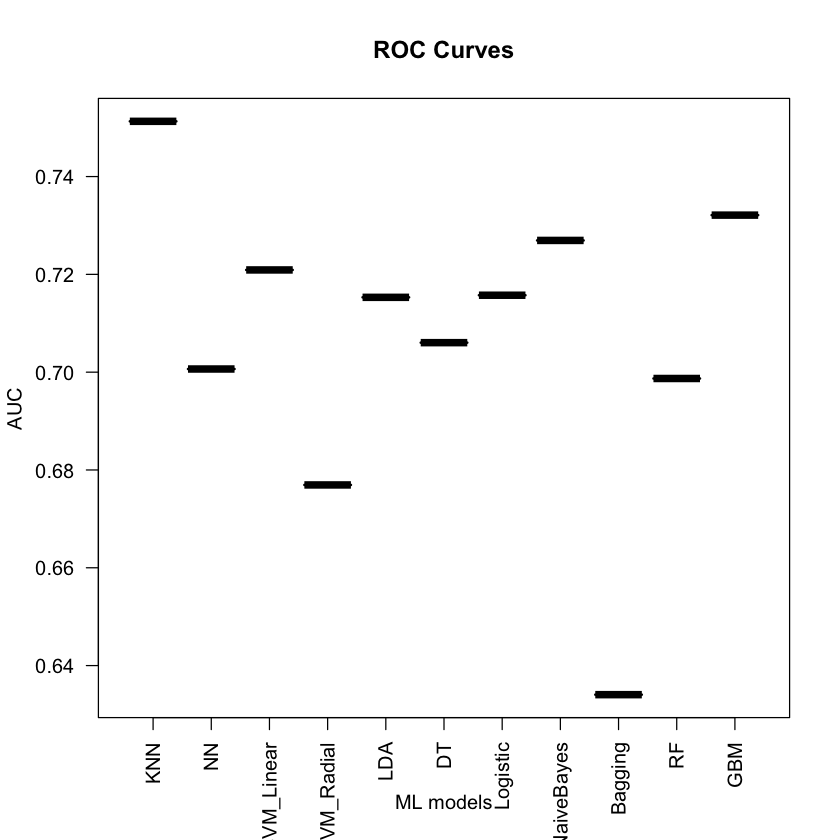

In [73]:
## # Combine ROC curves into a LIST
roc_curves <- list(
  KNN = rocCurve.knn.auc,
  NN = rocCurve.nn.auc,
  SVM_Linear = rocCurve.svm_Linear.auc,
  SVM_Radial = rocCurve.svm_Radial.auc,
  LDA = rocCurve.ldaFit.auc,
  DT = rocCurve.rpartFit.auc,
  Logistic = rocCurve.logisticFit.auc,
  NaiveBayes = rocCurve.nbFit.auc,
  Bagging = rocCurve.bagg.auc,
  RF = rocCurve.rf.auc,
  GBM = rocCurve.gbm.auc
)

# Create boxplot
boxplot(roc_curves, 
       main = "ROC Curves",
       auto.key = list(columns = 3, space = "right"),
       col = c(1:11), 
       lty = 1, 
       lwd = 2, 
       las = 2,  
       xlab = "ML models", 
       ylab = "AUC")

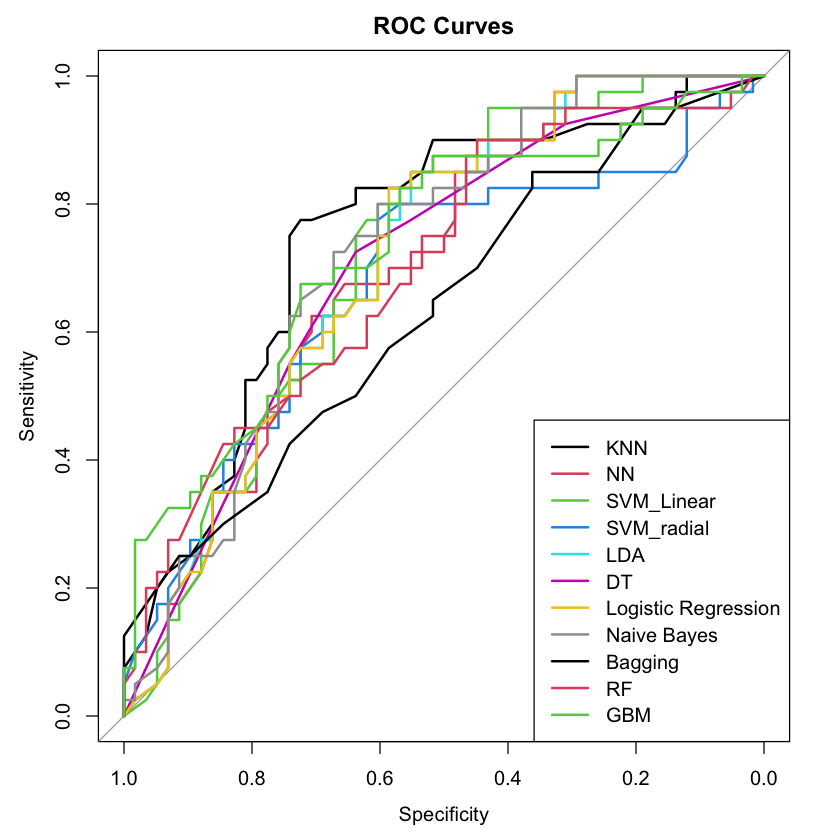

In [74]:
# MODEL COMPARISONS :
# ROC CURVES : , main = "ROC Curves"

plot(rocCurve.knn, col = c(1), main = "ROC Curves")
plot(rocCurve.nn, add = TRUE, col = c(2))
plot(rocCurve.svm_Linear, add = TRUE, col = c(3))
plot(rocCurve.svm_Radial, add = TRUE, col = c(4))
plot(rocCurve.ldaFit, add = TRUE, col = c(5))
plot(rocCurve.rpartFit, add = TRUE, col = c(6))
plot(rocCurve.logisticFit, add = TRUE, col = c(7))
plot(rocCurve.nbFit, add = TRUE, col = c(8))
plot(rocCurve.bagg, add = TRUE, col = c(9)) 
plot(rocCurve.rf, add = TRUE, col = c(10)) 
plot(rocCurve.gbm, add = TRUE, col = c(11)) 

legend("bottomright", 
       legend = c("KNN",
                  "NN",
                  "SVM_Linear",
                  "SVM_radial",
                  "LDA",
                  "DT",
                  "Logistic Regression",
                  "Naive Bayes",
                  "Bagging",
                  "RF",
                  "GBM"),
col = c(1:11), 
lty = 1, lwd = 2)

In [75]:
# algo_results
# str(algo_results)

In [76]:
# STACKING

In [77]:
# suggestions from : 
# https://github.com/archowdhury/Bagging-Boosting-and-Stacking-using-R/blob/master/Ensembling%20using%20R.R

In [78]:
# Create the mmodels
# or is data the full MATRIX, not separated in training and testing ?
# https://github.com/archowdhury/Bagging-Boosting-and-Stacking-using-R/blob/master/Ensembling%20using%20R.R

In [79]:
set.seed(123)

algorithmList <- c(
'knn',
'nnet',
'svmLinear',
'svmRadial',
'lda',
'rpart',
'glm',
'nb',
'rf',
'gbm', 
'treebag')


models <- caretList( RESULT~., 
                     data=training, 
                     trControl=ctrl, 
                     methodList=algorithmList, 
                     # metric="prec_recall",
                     metric="ROC",
                     preProcess = PREPROCESS, 
                     tuneLength = 20)

results <- resamples(models)

print("summary of all these models :")
# summary(results)
# dotplot(results)

Warning message in trControlCheck(x = trControl, y = target):
“trControl$savePredictions not 'all' or 'final'.  Setting to 'final' so we can ensemble the models.”
Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”
Warning message in train.default(x, y, weights = w, ...):
“The metric "ROC" was not in the result set. Accuracy will be used instead.”
Warning message in train.default(x, y, weights = w, ...):
“The metric "ROC" was not in the result set. Accuracy will be used instead.”


# weights:  8
initial  value 201.331003 
iter  10 value 190.876993
iter  20 value 190.359761
final  value 190.335963 
converged


Warning message in train.default(x, y, weights = w, ...):
“The metric "ROC" was not in the result set. Accuracy will be used instead.”
Warning message in train.default(x, y, weights = w, ...):
“The metric "ROC" was not in the result set. Accuracy will be used instead.”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”
Warning message in train.default(x, y, weights = w, ...):
“The metric "ROC" was not in the result set. Accuracy will be used instead.”
Warning message in train.default(x, y, weights = w, ...):
“The metric "ROC" was not in the result set. Accuracy will be used instead.”
Warning message in train.default(x, y, weights = w, ...):
“The metric "ROC" was not in the result set. Accuracy will be used instead.”
Warning message in train.default(x, y, weights = w, ...):
“The metric "ROC" was not in the result set. Accuracy will be used instead.”


note: only 4 unique complexity parameters in default grid. Truncating the grid to 4 .



Warning message in train.default(x, y, weights = w, ...):
“The metric "ROC" was not in the result set. Accuracy will be used instead.”
Warning message in train.default(x, y, weights = w, ...):
“The metric "ROC" was not in the result set. Accuracy will be used instead.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3381             nan     0.1000    0.0041
     2        1.3216             nan     0.1000    0.0004
     3        1.3038             nan     0.1000    0.0038
     4        1.2906             nan     0.1000    0.0007
     5        1.2781             nan     0.1000   -0.0011
     6        1.2693             nan     0.1000   -0.0036
     7        1.2594             nan     0.1000    0.0019
     8        1.2529             nan     0.1000   -0.0015
     9        1.2377             nan     0.1000    0.0033
    10        1.2316             nan     0.1000   -0.0061
    20        1.1748             nan     0.1000   -0.0029
    40        1.1189             nan     0.1000   -0.0035
    50        1.1039             nan     0.1000   -0.0065



Warning message in train.default(x, y, weights = w, ...):
“The metric "ROC" was not in the result set. Accuracy will be used instead.”


[1] "summary of all these models :"


knn       nnet      svmLinear  svmRadial  lda       rpart    
knn       1.0000000 0.4510742 0.22185999 0.50298593 0.3375018 0.5512508
nnet      0.4510742 1.0000000 0.32019831 0.35313401 0.8215417 0.4514261
svmLinear 0.2218600 0.3201983 1.00000000 0.18675314 0.2639418 0.1398165
svmRadial 0.5029859 0.3531340 0.18675314 1.00000000 0.3532293 0.2191449
lda       0.3375018 0.8215417 0.26394181 0.35322926 1.0000000 0.3586222
rpart     0.5512508 0.4514261 0.13981648 0.21914487 0.3586222 1.0000000
glm       0.3218842 0.8326137 0.23850034 0.35670943 0.8750052 0.4032104
nb        0.1511912 0.2426527 0.04302356 0.09208371 0.1651772 0.3439092
rf        0.4834411 0.3536699 0.13352705 0.36409061 0.4497159 0.5632253
gbm       0.3903056 0.2597283 0.01197093 0.29431417 0.3600313 0.4501906
treebag   0.3864608 0.3438869 0.07122482 0.17115356 0.3548309 0.4943782
          glm       nb         rf        gbm        treebag   
knn       0.3218842 0.15119119 0.4834411 0.39030565 0.38646083
nnet      0.8326137 0.24265273 0.3536699 0.25972828 0.34388690
svmLinear 0.2385003 0.04302356 0.1335270 0.01197093 0.07122482
svmRadial 0.3567094 0.09208371 0.3640906 0.29431417 0.17115356
lda       0.8750052 0.16517717 0.4497159 0.36003131 0.35483091
rpart     0.4032104 0.34390919 0.5632253 0.45019057 0.49437819
glm       1.0000000 0.23285579 0.4305788 0.36310275 0.36825511
nb        0.2328558 1.00000000 0.3437568 0.43568607 0.39218314
rf        0.4305788 0.34375681 1.0000000 0.74097846 0.70106490
gbm       0.3631027 0.43568607 0.7409785 1.00000000 0.53952561
treebag   0.3682551 0.39218314 0.7010649 0.53952561 1.00000000

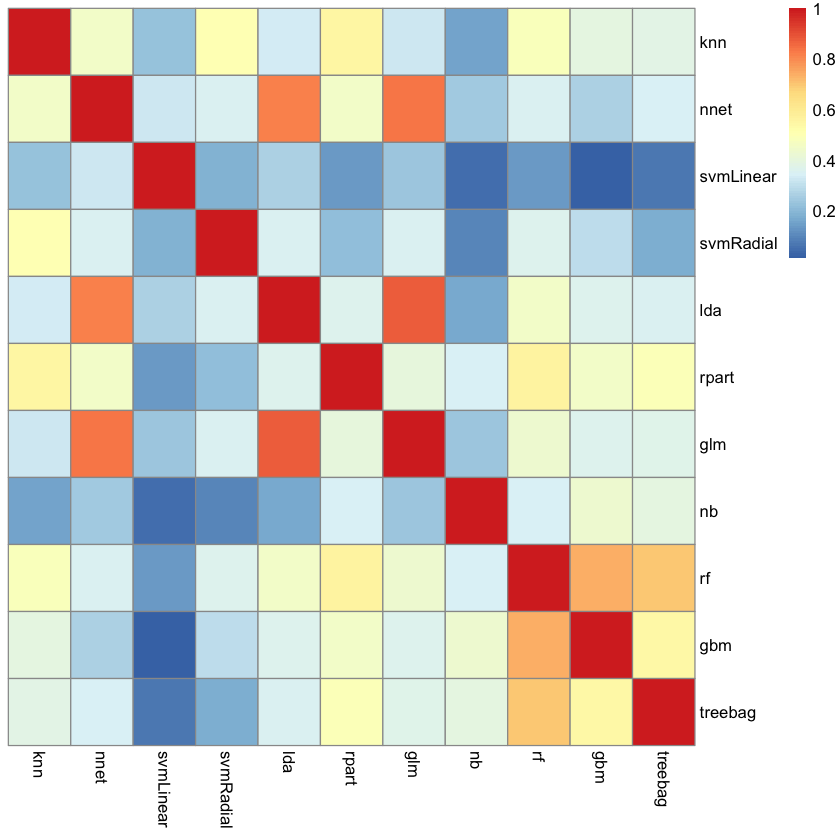

In [80]:
# Check the correlation between the models (ideally the models should have low correlations) :

# models
modelCor(results)
# splom(results)
# results

pheatmap(modelCor(results), 
        cluster_rows = FALSE, 
        cluster_cols = FALSE)

In [81]:
### PREDICTIONS <- as.data.frame(predict(models, newdata=testing))
### print(PREDICTIONS)
### some notes at : 
### https://cran.r-project.org/web/packages/caretEnsemble/vignettes/caretEnsemble-intro.html

In [82]:
# ENSEMBLE model

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 64”


Confusion Matrix and Statistics

          Reference
Prediction NO_PASS PASS
   NO_PASS      44   21
   PASS         14   19
                                          
               Accuracy : 0.6429          
                 95% CI : (0.5397, 0.7371)
    No Information Rate : 0.5918          
    P-Value [Acc > NIR] : 0.1778          
                                          
                  Kappa : 0.2401          
                                          
 Mcnemar's Test P-Value : 0.3105          
                                          
            Sensitivity : 0.7586          
            Specificity : 0.4750          
         Pos Pred Value : 0.6769          
         Neg Pred Value : 0.5758          
              Precision : 0.6769          
                 Recall : 0.7586          
                     F1 : 0.7154          
             Prevalence : 0.5918          
         Detection Rate : 0.4490          
   Detection Prevalence : 0.6633          
      Balanced 

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 64”
Setting levels: control = NO_PASS, case = PASS

Setting direction: controls > cases



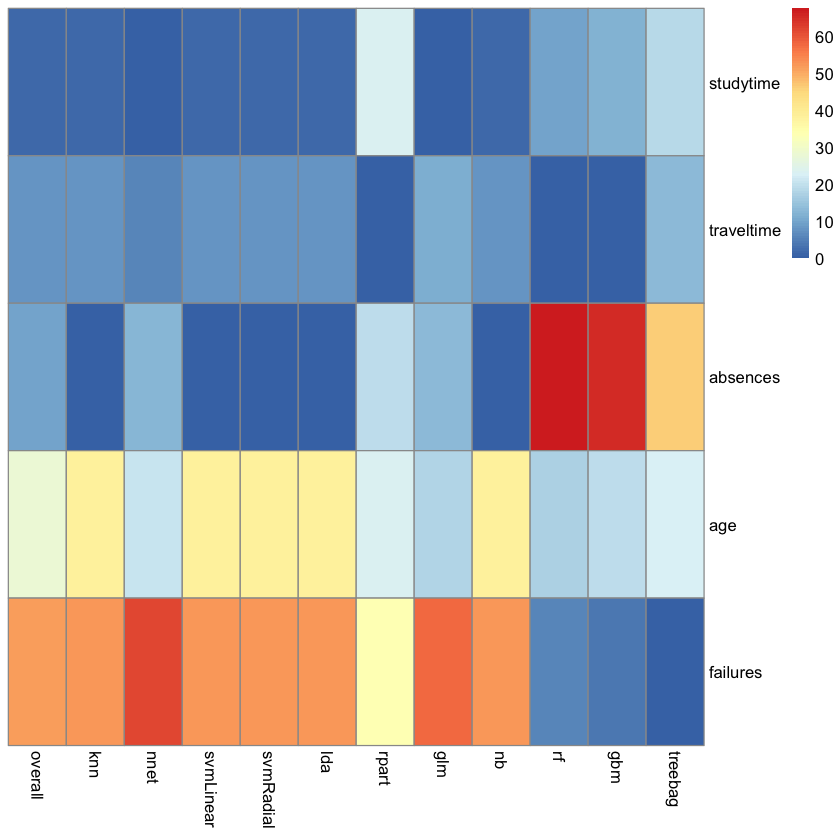

[1] "AUC is : "


Area under the curve: 0.7119

[1] "F1 Score: 0.715447154471545"


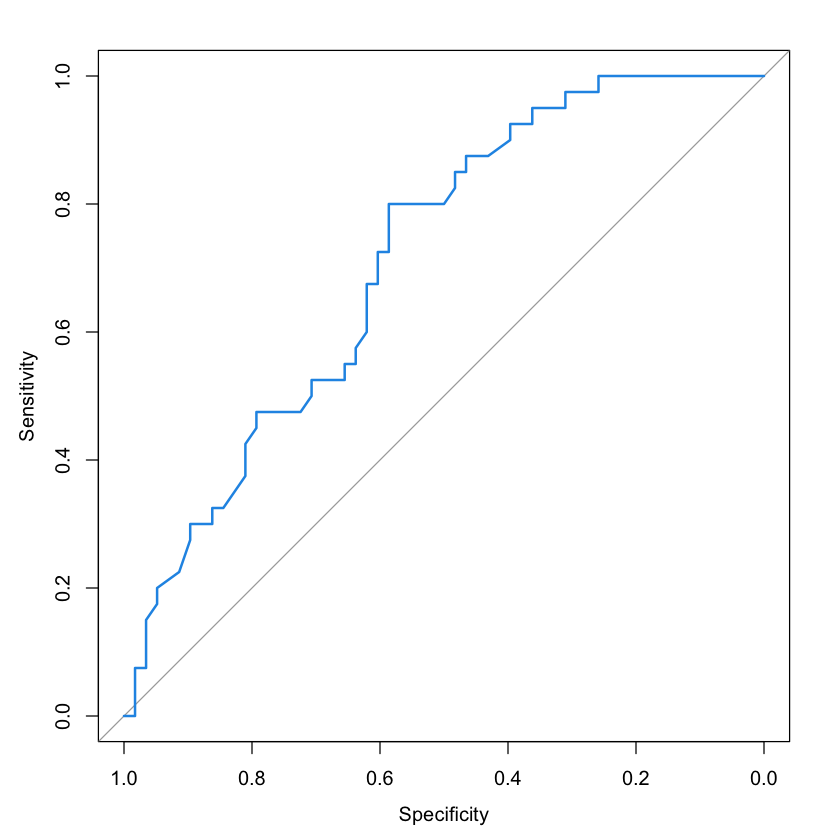

In [83]:
# Create an ensemble model using the caretEnsemble package
ensemble_model <- caretEnsemble(models)

# Make predictions on the test set
ensemble_predictions <- predict(ensemble_model, newdata = testing)

# Evaluate the performance of the ensemble model
confusionMatrix_ensemble = confusionMatrix(ensemble_predictions, testing$RESULT, mode = "everything")
print(confusionMatrix_ensemble)

# Variable Importance 
print("Variable Importance")
ensemble.vip <- varImp(ensemble_model, scale = FALSE)
# print(ensemble.vip)

# plot(ensemble.vip)
pheatmap(ensemble.vip, 
         cluster_rows = FALSE,  # Disable row clustering
         cluster_cols = FALSE  # Disable column clustering
)

# Extract F1 score
confusionMatrix_ensemble_F1 <- confusionMatrix_ensemble$byClass["F1"]
print(paste("F1 Score:", confusionMatrix_ensemble_F1))

## Obtaining predicted probabilites for Test data
ensemble.probs = predict(ensemble_model,
                         newdata = testing,
                         type="prob")


rocCurve.ensemble <- roc(testing$RESULT, ensemble.probs)
# rocCurve.ensemble <- roc(testing$RESULT, ensemble.probs[, "PASS"])
plot(rocCurve.ensemble, col=c(4))

print("AUC is : ")
auc(rocCurve.ensemble)

rocCurve.ensemble.auc = auc(rocCurve.ensemble) 

# Extract F1 score
confusionMatrix_ensemble_F1 <- confusionMatrix_ensemble$byClass["F1"]
print(paste("F1 Score:", confusionMatrix_ensemble_F1))

In [84]:
# STACKING MODELS

In [85]:
# Stack the models using Random Forest

Warning message in train.default(predobs$preds, predobs$obs, ...):
“The metric "F1" was not in the result set. Accuracy will be used instead.”


Aggregating results
Selecting tuning parameters
Fitting mtry = 11 on full training set
A rf ensemble of 11 base models: knn, nnet, svmLinear, svmRadial, lda, rpart, glm, nb, rf, gbm, treebag

Ensemble results:
Random Forest 

2970 samples
  11 predictor
   2 classes: 'NO_PASS', 'PASS' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 2673, 2673, 2673, 2673, 2673, 2673, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.7671380  0.5126791
   6    0.7725926  0.5258516
  11    0.7738384  0.5290859

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 11.


Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 64”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 64”
Setting levels: control = NO_PASS, case = PASS

Setting direction: controls > cases



[1] "AUC is : "


Area under the curve: 0.6192

[1] "F1 Score: 0.666666666666667"


Area under the curve: 0.6192

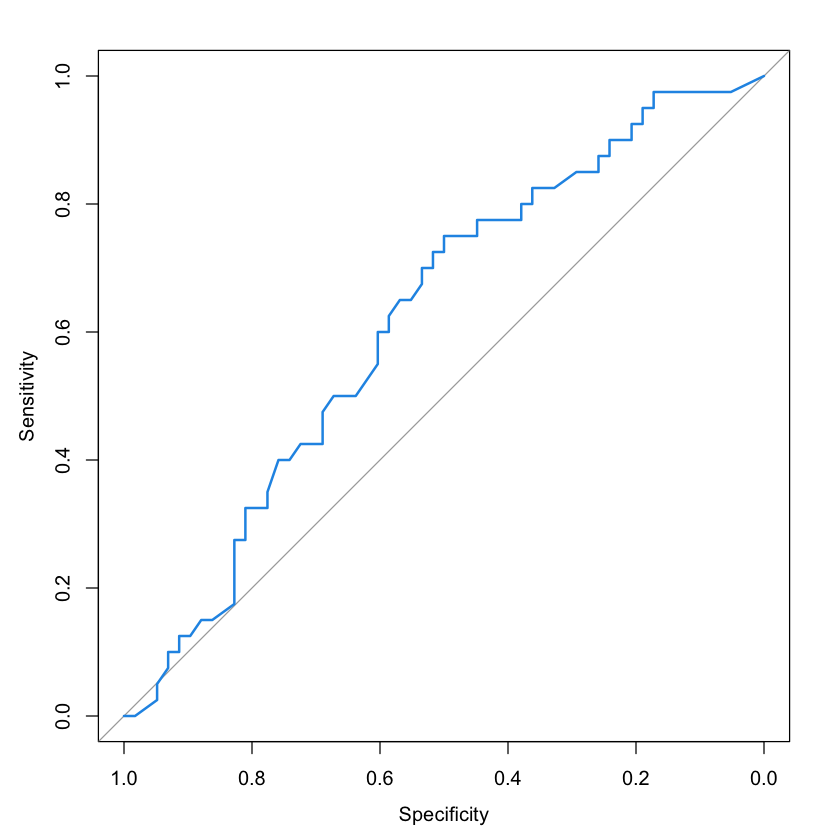

In [86]:
stackControl = trainControl(method='repeatedcv', 
                            number=10, repeats=10,
                            savePredictions = TRUE,
                            classProbs = TRUE,
                            # preProcess = PREPROCESS,
                            verbose=TRUE)

rf_Stack = caretStack(models, method='rf', metric='F1', trControl = stackControl)
print(rf_Stack)

rf_Stack_predict <- predict(rf_Stack, newdata = testing)

## CONFUSION MATRIX :
confusionMatrix_rf_Stack_predict = confusionMatrix(rf_Stack_predict, testing$RESULT, mode="everything")
## confusionMatrix_rf_Stack_predict = confusionMatrix(rf_Stack_predict, testing$RESULT, mode="prec_recall")

## ACCURACY :
## mean(rf_Stack_predict == testing$RESULT)

## Obtaining predicted probabilites for Test data
rf_Stack.probs = predict(rf_Stack,
                   newdata = testing,
                   type="prob")

rocCurve.rf_Stack <- roc(testing$RESULT, rf_Stack.probs)
plot(rocCurve.rf_Stack, col=c(4))

print("AUC is : ")
auc(rocCurve.rf_Stack)

rocCurve.rf_Stack.auc = auc(rocCurve.rf_Stack) 

# Extract F1 score
confusionMatrix_rf_Stack_predict_F1 <- confusionMatrix_rf_Stack_predict$byClass["F1"]
print(paste("F1 Score:", confusionMatrix_rf_Stack_predict_F1))

rocCurve.rf_Stack.auc

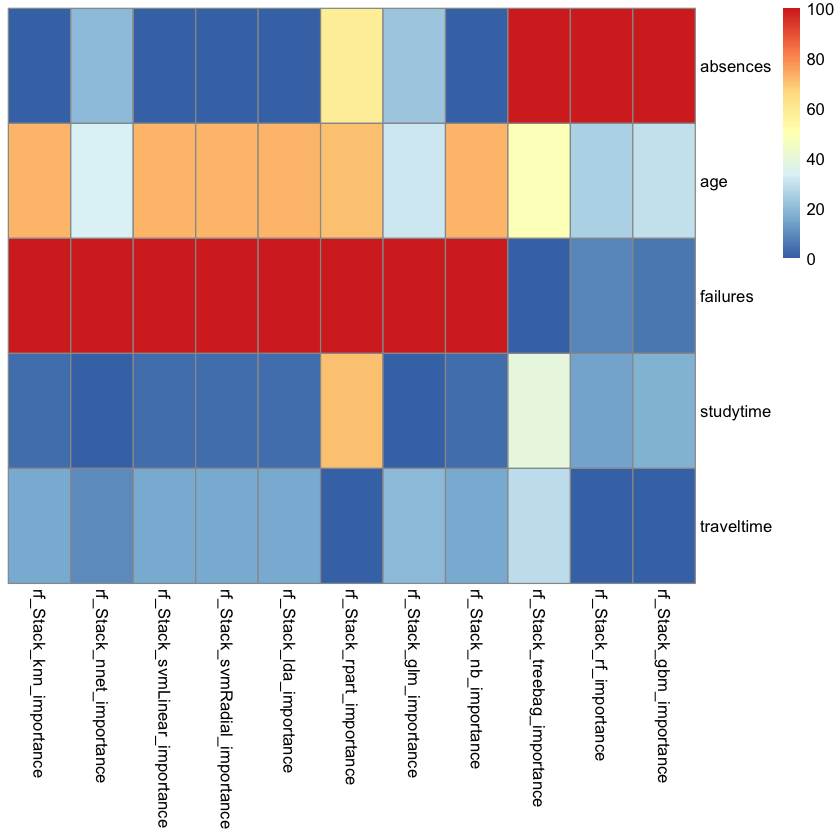

In [87]:
## VARIABLE IMPORTANCE

###  to extract the VARIABLE IMPORTANCE : rf_Stack$models
base_models <- rf_Stack$models
base_model_importances <- lapply(base_models, varImp)

### base_model_importances

rf_Stack_knn = data.frame(rf_Stack_knn_importance = base_model_importances$knn$importance[,"PASS"], 
                          Variable = rownames(base_model_importances$knn$importance))

rf_Stack_nnet = data.frame(rf_Stack_nnet_importance = base_model_importances$nnet$importance$Overall, 
                           Variable = rownames(base_model_importances$nnet$importance))

rf_Stack_svmLinear = data.frame(rf_Stack_svmLinear_importance = base_model_importances$svmLinear$importance[,"PASS"],
             Variable = rownames(base_model_importances$svmLinear$importance))

rf_Stack_svmRadial = data.frame(rf_Stack_svmRadial_importance = base_model_importances$svmRadial$importance[,"PASS"],
             Variable = rownames(base_model_importances$svmRadial$importance))

rf_Stack_lda = data.frame(rf_Stack_lda_importance = base_model_importances$lda$importance[,"PASS"],
             Variable = rownames(base_model_importances$lda$importance))

rf_Stack_rpart = data.frame(rf_Stack_rpart_importance = base_model_importances$rpart$importance$Overall,
             Variable = rownames(base_model_importances$rpart$importance))

rf_Stack_glm = data.frame(rf_Stack_glm_importance = base_model_importances$glm$importance$Overall,
             Variable = rownames(base_model_importances$glm$importance))

rf_Stack_nb = data.frame(rf_Stack_nb_importance = base_model_importances$nb$importance[,"PASS"],
             Variable = rownames(base_model_importances$nb$importance))

rf_Stack_treebag = data.frame(rf_Stack_treebag_importance = base_model_importances$treebag$importance$Overall,
             Variable = rownames(base_model_importances$treebag$importance))

rf_Stack_rf = data.frame(rf_Stack_rf_importance = base_model_importances$rf$importance$Overall,
             Variable = rownames(base_model_importances$rf$importance))

rf_Stack_gbm = data.frame(rf_Stack_gbm_importance = base_model_importances$gbm$importance$Overall,
             Variable = rownames(base_model_importances$gbm$importance))

## Including all these models into a Data Frame : 

rf_Stack_list <- list(rf_Stack_knn, 
                      rf_Stack_nnet, 
                      rf_Stack_svmLinear,
                      rf_Stack_svmRadial, 
                      rf_Stack_lda, 
                      rf_Stack_rpart,
                      rf_Stack_glm, 
                      rf_Stack_nb, 
                      rf_Stack_treebag,
                      rf_Stack_rf, 
                      rf_Stack_gbm)

# Merge data frames based on "Variable"
rf_Stack_list_importance <- Reduce(function(x, y) merge(x, y, by = "Variable", all = TRUE), rf_Stack_list)

# Make a data frame
rf_Stack_list_importance.df = as.data.frame(rf_Stack_list_importance)
rownames(rf_Stack_list_importance.df) = rf_Stack_list_importance.df$Variable

# Show a heatmap                                   
rf_Stack_list_importance.df <- rf_Stack_list_importance.df[, -1]
pheatmap(rf_Stack_list_importance.df, cluster_cols = FALSE, cluster_rows = FALSE)

In [88]:
rf_Stack_list_importance

Variable   rf_Stack_knn_importance rf_Stack_nnet_importance
1 absences     0.000000               19.755518              
2 age         72.537985               33.271843              
3 failures   100.000000              100.000000              
4 studytime    3.432752                0.000000              
5 traveltime  15.306697                9.081272              
  rf_Stack_svmLinear_importance rf_Stack_svmRadial_importance
1   0.000000                      0.000000                   
2  72.537985                     72.537985                   
3 100.000000                    100.000000                   
4   3.432752                      3.432752                   
5  15.306697                     15.306697                   
  rf_Stack_lda_importance rf_Stack_rpart_importance rf_Stack_glm_importance
1   0.000000               58.47203                  22.92373              
2  72.537985               70.46878                  31.44217              
3 100.000000              100.00000                 100.00000              
4   3.432752               70.62399                   0.00000              
5  15.306697                0.00000                  19.32838              
  rf_Stack_nb_importance rf_Stack_treebag_importance rf_Stack_rf_importance
1   0.000000             100.00000                   100.000000            
2  72.537985              48.75417                    25.298208            
3 100.000000               0.00000                     8.449116            
4   3.432752              39.92370                    14.109808            
5  15.306697              28.70362                     0.000000            
  rf_Stack_gbm_importance
1 100.000000             
2  29.525233             
3   5.400827             
4  17.926112             
5   0.000000

In [89]:
# Stack the models using GBM

Aggregating results
Selecting tuning parameters
Fitting n.trees = 150, interaction.depth = 3, shrinkage = 0.1, n.minobsinnode = 10 on full training set
Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3390             nan     0.1000    0.0062
     2        1.3245             nan     0.1000    0.0068
     3        1.3127             nan     0.1000    0.0049
     4        1.3012             nan     0.1000    0.0045
     5        1.2916             nan     0.1000    0.0035
     6        1.2830             nan     0.1000    0.0033
     7        1.2758             nan     0.1000    0.0026
     8        1.2704             nan     0.1000    0.0017
     9        1.2635             nan     0.1000    0.0023
    10        1.2569             nan     0.1000    0.0025
    20        1.2066             nan     0.1000    0.0011
    40        1.1465             nan     0.1000   -0.0002
    60        1.1051             nan     0.1000    0.0000
    80        1.0729             nan

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 64”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 64”
Setting levels: control = NO_PASS, case = PASS

Setting direction: controls > cases



[1] "AUC is : "


Area under the curve: 0.6752

[1] "F1 Score: 0.727272727272727"


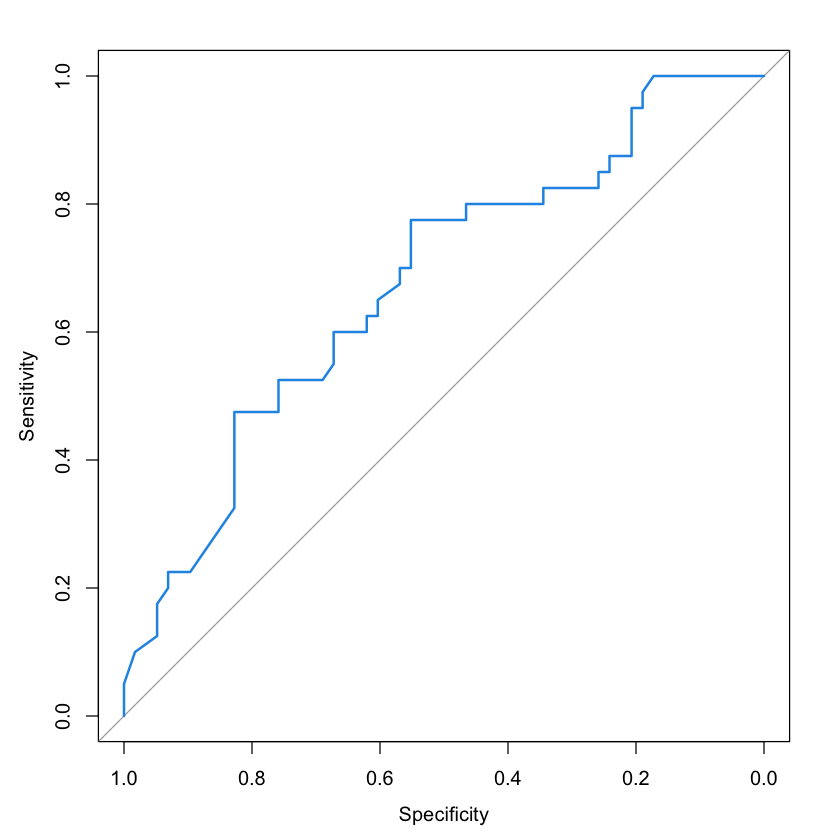

In [90]:
# Stack the models using GBM
stackControl = trainControl(method='repeatedcv', 
                            number=10, repeats=3,
                            savePredictions = TRUE,
                            classProbs = TRUE,
                            # preProcess = PROCESS,
                            verbose=TRUE)

gbm_Stack = caretStack(models, method='gbm', metric='Accuracy', trControl = stackControl)
print(gbm_Stack)
# str(gbm_Stack)

gbm_Stack_predict <- predict(gbm_Stack, newdata = testing)

## CONFUSION MATRIX and
confusionMatrix_gbm_Stack_predict  = confusionMatrix(gbm_Stack_predict, testing$RESULT, mode = "everything")

## ACCURACY :
# mean(gbm_Stack_predict == testing$RESULT)

## Obtaining predicted probabilites for Test data
gbm_Stack.probs = predict(gbm_Stack,
                    newdata = testing,
                    type="prob")

rocCurve.gbm_Stack <- roc(testing$RESULT, gbm_Stack.probs)
plot(rocCurve.gbm_Stack, col=c(4))

print("AUC is : ")
auc(rocCurve.gbm_Stack)

rocCurve.gbm_Stack.auc = auc(rocCurve.gbm_Stack) 

# Extract F1 score
confusionMatrix_gbm_Stack_predict_F1 <- confusionMatrix_gbm_Stack_predict$byClass["F1"]
print(paste("F1 Score:", confusionMatrix_gbm_Stack_predict_F1))

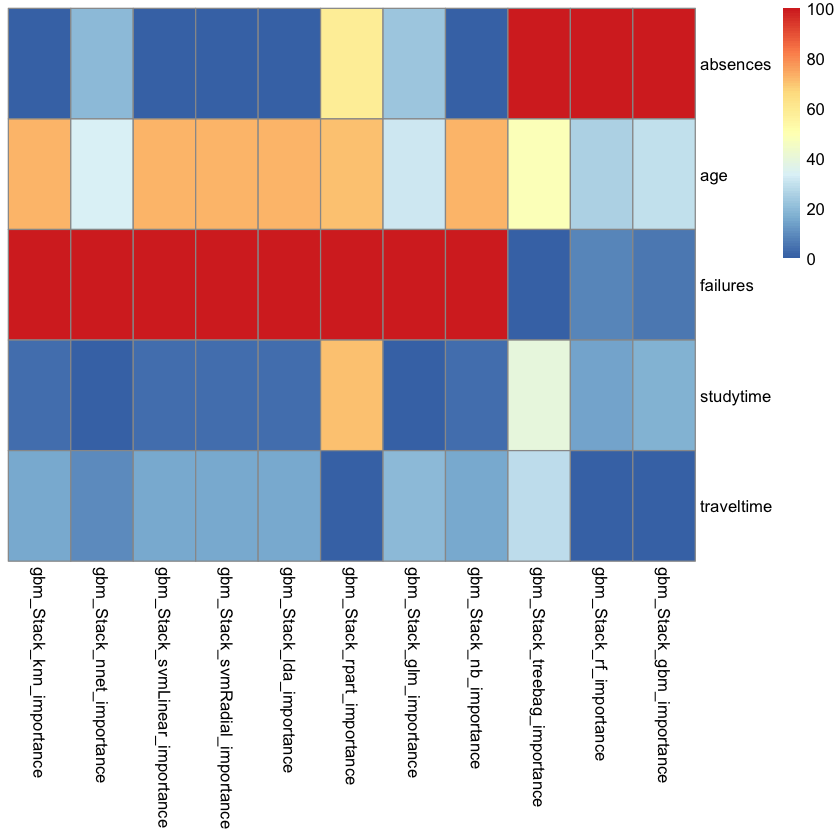

In [91]:
## VARIABLE IMPORTANCE

###  to extract the VARIABLE IMPORTANCE : rf_Stack$models
base_models <- gbm_Stack$models
base_model_importances <- lapply(base_models, varImp)

### base_model_importances

gbm_Stack_knn = data.frame(gbm_Stack_knn_importance = base_model_importances$knn$importance[,"PASS"], 
                           Variable = rownames(base_model_importances$knn$importance))

gbm_Stack_nnet = data.frame(gbm_Stack_nnet_importance = base_model_importances$nnet$importance$Overall, 
                            Variable = rownames(base_model_importances$nnet$importance))

gbm_Stack_svmLinear = data.frame(gbm_Stack_svmLinear_importance = base_model_importances$svmLinear$importance[,"PASS"],
             Variable = rownames(base_model_importances$svmLinear$importance))

gbm_Stack_svmRadial = data.frame(gbm_Stack_svmRadial_importance = base_model_importances$svmRadial$importance[,"PASS"],
             Variable = rownames(base_model_importances$svmRadial$importance))

gbm_Stack_lda = data.frame(gbm_Stack_lda_importance = base_model_importances$lda$importance[,"PASS"],
             Variable = rownames(base_model_importances$lda$importance))

gbm_Stack_rpart = data.frame(gbm_Stack_rpart_importance = base_model_importances$rpart$importance$Overall,
             Variable = rownames(base_model_importances$rpart$importance))

gbm_Stack_glm = data.frame(gbm_Stack_glm_importance = base_model_importances$glm$importance$Overall,
             Variable = rownames(base_model_importances$glm$importance))

gbm_Stack_nb = data.frame(gbm_Stack_nb_importance = base_model_importances$nb$importance[,"PASS"],
             Variable = rownames(base_model_importances$nb$importance))

gbm_Stack_treebag = data.frame(gbm_Stack_treebag_importance = base_model_importances$treebag$importance$Overall,
             Variable = rownames(base_model_importances$treebag$importance))

gbm_Stack_rf = data.frame(gbm_Stack_rf_importance = base_model_importances$rf$importance$Overall,
             Variable = rownames(base_model_importances$rf$importance))

gbm_Stack_gbm = data.frame(gbm_Stack_gbm_importance = base_model_importances$gbm$importance$Overall,
             Variable = rownames(base_model_importances$gbm$importance))

## Including all these models into a Data Frame : 

gbm_Stack_list <- list(gbm_Stack_knn, 
                      gbm_Stack_nnet, 
                      gbm_Stack_svmLinear,
                      gbm_Stack_svmRadial, 
                      gbm_Stack_lda, 
                      gbm_Stack_rpart,
                      gbm_Stack_glm, 
                      gbm_Stack_nb, 
                      gbm_Stack_treebag,
                      gbm_Stack_rf, 
                      gbm_Stack_gbm)

# Merge data frames based on "Variable"
gbm_Stack_list_importance <- Reduce(function(x, y) merge(x, y, by = "Variable", all = TRUE), gbm_Stack_list)

# Make a data frame
gbm_Stack_list_importance.df = as.data.frame(gbm_Stack_list_importance)
rownames(gbm_Stack_list_importance.df) = gbm_Stack_list_importance.df$Variable

# Show a heatmap                                   
gbm_Stack_list_importance.df <- gbm_Stack_list_importance.df[, -1]
pheatmap(gbm_Stack_list_importance.df, cluster_cols = FALSE, cluster_rows = FALSE)                                

In [92]:
gbm_Stack_list_importance.df

gbm_Stack_knn_importance gbm_Stack_nnet_importance
absences     0.000000                19.755518               
age         72.537985                33.271843               
failures   100.000000               100.000000               
studytime    3.432752                 0.000000               
traveltime  15.306697                 9.081272               
           gbm_Stack_svmLinear_importance gbm_Stack_svmRadial_importance
absences     0.000000                       0.000000                    
age         72.537985                      72.537985                    
failures   100.000000                     100.000000                    
studytime    3.432752                       3.432752                    
traveltime  15.306697                      15.306697                    
           gbm_Stack_lda_importance gbm_Stack_rpart_importance
absences     0.000000                58.47203                 
age         72.537985                70.46878                 
failures   100.000000               100.00000                 
studytime    3.432752                70.62399                 
traveltime  15.306697                 0.00000                 
           gbm_Stack_glm_importance gbm_Stack_nb_importance
absences    22.92373                  0.000000             
age         31.44217                 72.537985             
failures   100.00000                100.000000             
studytime    0.00000                  3.432752             
traveltime  19.32838                 15.306697             
           gbm_Stack_treebag_importance gbm_Stack_rf_importance
absences   100.00000                    100.000000             
age         48.75417                     25.298208             
failures     0.00000                      8.449116             
studytime   39.92370                     14.109808             
traveltime  28.70362                      0.000000             
           gbm_Stack_gbm_importance
absences   100.000000              
age         29.525233              
failures     5.400827              
studytime   17.926112              
traveltime   0.000000

In [93]:
head(training, 2)
head(testing, 2)

age traveltime studytime failures absences RESULT 
1 18  2          2         0        6        NO_PASS
5 16  1          2         0        4        NO_PASS

age traveltime studytime failures absences RESULT 
2 17  1          2         0         4       NO_PASS
3 15  1          2         3        10       NO_PASS

In [94]:
# Plot again F1 score

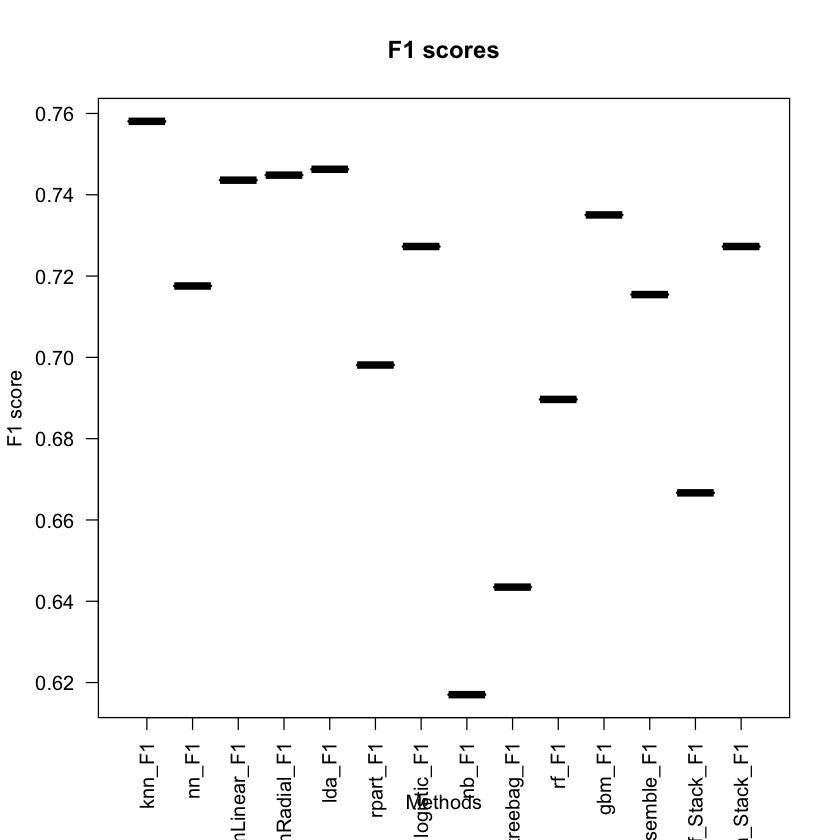

In [95]:
F1_scores_again <- list(
knn_F1 = confusionMatrix_knn$byClass["F1"],
nn_F1 = confusionMatrix_nn$byClass["F1"],
svmLinear_F1 = confusionMatrix_svmLinear$byClass["F1"],
svmRadial_F1 = confusionMatrix_svmRadial$byClass["F1"],
lda_F1 = confusionMatrix_lda$byClass["F1"],
rpart_F1 = confusionMatrix_rpart$byClass["F1"],
logistic_F1 = confusionMatrix_logistic$byClass["F1"],
nb_F1 = confusionMatrix_nb$byClass["F1"],
treebag_F1 = confusionMatrix_treebag$byClass["F1"],
rf_F1 = confusionMatrix_rf$byClass["F1"],
gbm_F1 = confusionMatrix_gbm$byClass["F1"],
ensemble_F1 = confusionMatrix_ensemble$byClass["F1"],
rf_Stack_F1 = confusionMatrix_rf_Stack_predict$byClass["F1"],
gbm_Stack_F1 = confusionMatrix_gbm_Stack_predict$byClass["F1"]
)

# Create boxplot
boxplot(F1_scores_again, 
       main = "F1 scores",
       auto.key = list(columns = 3, space = "right"),
       col = c(1:14), 
       lty = 1, 
       lwd = 2, 
       las = 2, 
       xlab = "Methods", 
       ylab = "F1 score")

In [96]:
# Plot again ROC

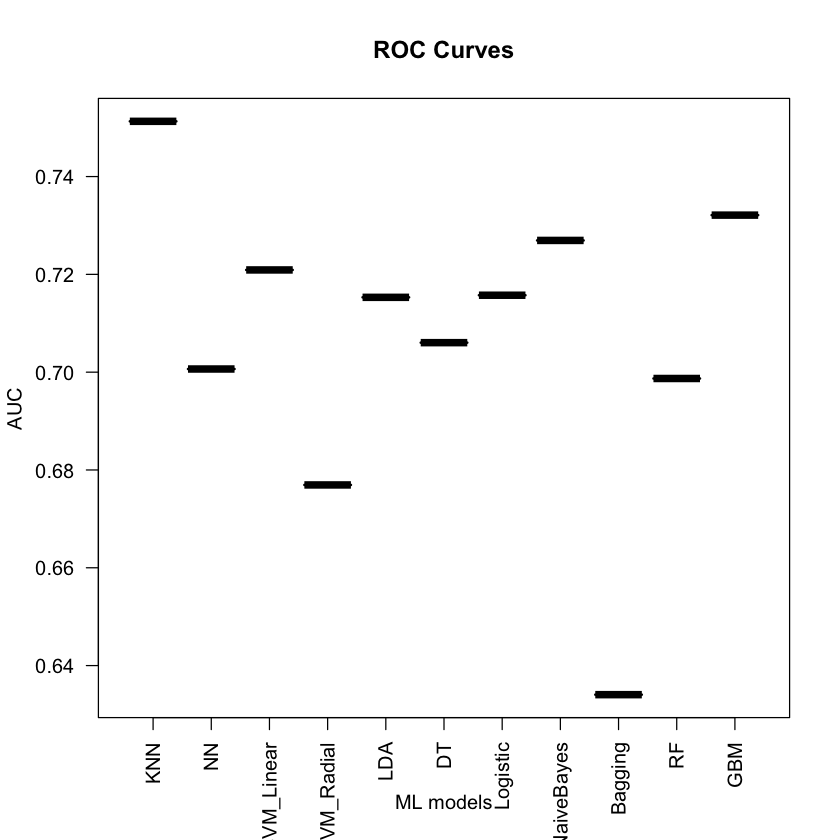

In [97]:
## # Combine ROC curves into a LIST
roc_curves_again <- list(
  KNN = rocCurve.knn.auc,
  NN = rocCurve.nn.auc,
  SVM_Linear = rocCurve.svm_Linear.auc,
  SVM_Radial = rocCurve.svm_Radial.auc,
  LDA = rocCurve.ldaFit.auc,
  DT = rocCurve.rpartFit.auc,
  Logistic = rocCurve.logisticFit.auc,
  NaiveBayes = rocCurve.nbFit.auc,
  Bagging = rocCurve.bagg.auc,
  RF = rocCurve.rf.auc,
  GBM = rocCurve.gbm.auc, 
  ensemble = rocCurve.ensemble.auc,
  rf_Stack = rocCurve.rf_Stack.auc,
  gbm_Stack = rocCurve.gbm_Stack.auc
)

boxplot(roc_curves, 
       main = "ROC Curves",
       auto.key = list(columns = 3, space = "right"),
       col = c(1:14), 
       lty = 1, 
       lwd = 2, 
       las = 2,  
       xlab = "ML models", 
       ylab = "AUC")

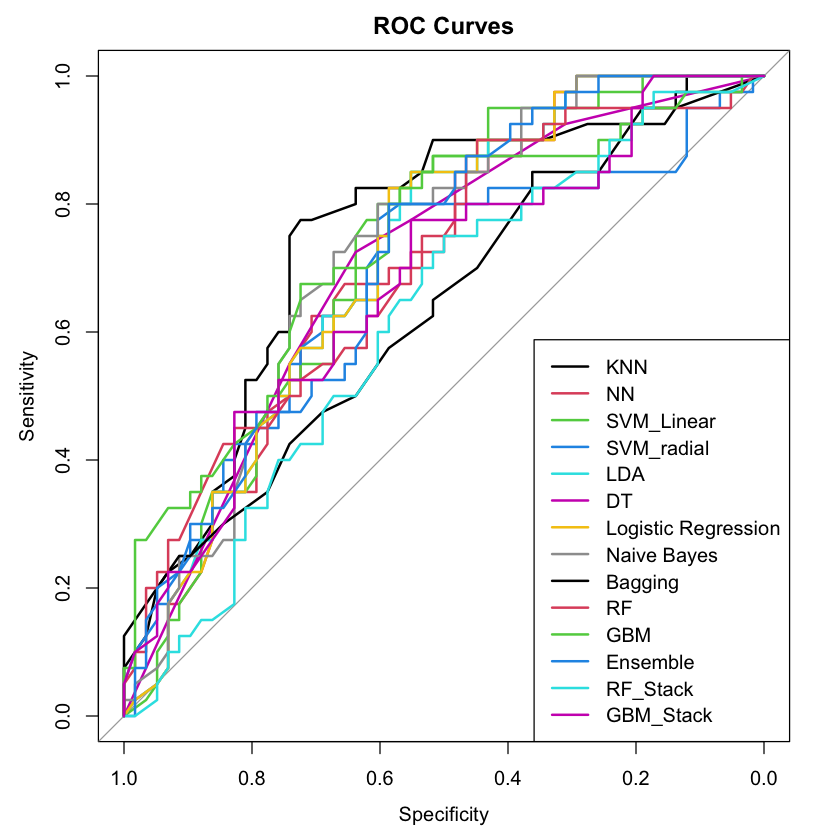

In [98]:
# MODEL COMPARISONS :
# ROC CURVES : , main = "ROC Curves"

plot(rocCurve.knn, col = c(1), main = "ROC Curves")
plot(rocCurve.nn, add = TRUE, col = c(2))
plot(rocCurve.svm_Linear, add = TRUE, col = c(3))
plot(rocCurve.svm_Radial, add = TRUE, col = c(4))
plot(rocCurve.ldaFit, add = TRUE, col = c(5))
plot(rocCurve.rpartFit, add = TRUE, col = c(6))
plot(rocCurve.logisticFit, add = TRUE, col = c(7))
plot(rocCurve.nbFit, add = TRUE, col = c(8))
plot(rocCurve.bagg, add = TRUE, col = c(9)) 
plot(rocCurve.rf, add = TRUE, col = c(10)) 
plot(rocCurve.gbm, add = TRUE, col = c(11)) 
plot(rocCurve.ensemble, add = TRUE, col = c(12)) 
plot(rocCurve.rf_Stack, add = TRUE, col = c(13)) 
plot(rocCurve.gbm_Stack, add = TRUE, col = c(14)) 

legend("bottomright", 
       legend = c("KNN",
                  "NN",
                  "SVM_Linear",
                  "SVM_radial",
                  "LDA",
                  "DT",
                  "Logistic Regression",
                  "Naive Bayes",
                  "Bagging",
                  "RF",
                  "GBM", 
                  "Ensemble",
                  "RF_Stack", 
                  "GBM_Stack" ),
col = c(1:14), 
lty = 1, lwd = 2)

In [99]:
# Associations and Feature Importance:

# The feature importance or coefficients to understand which variables contribute the most to predictions. 
# This analysis might reveal associations between certain features and the target variable.

# High feature importance in a predictive model can indicate that a particular feature is strongly 
# associated with the target variable.
# For example, if you have a predictive model for predicting customer churn, 
# and the "Number of Customer Service Calls" is identified as a highly important feature, 
# it suggests an association between the number of service calls and the likelihood of churn.

In [100]:
head(training, 2)
head(testing, 2)

age traveltime studytime failures absences RESULT 
1 18  2          2         0        6        NO_PASS
5 16  1          2         0        4        NO_PASS

age traveltime studytime failures absences RESULT 
2 17  1          2         0         4       NO_PASS
3 15  1          2         3        10       NO_PASS

In [101]:
library(randomForest)
set.seed(123)

mtry = 2  OOB error = 49.16% 
Searching left ...
mtry = 1 	OOB error = 48.82% 
0.006849315 0.01 
Searching right ...
mtry = 4 	OOB error = 49.49% 
-0.006849315 0.01 
[1] "mtry"
      mtry  OOBError
1.OOB    1 0.4882155
2.OOB    2 0.4915825
4.OOB    4 0.4949495
[1] "best.m"
[1] 1

Call:
 randomForest(formula = RESULT ~ ., data = training, ntree = 500,      mtry = best.m, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 44.78%
Confusion matrix:
        NO_PASS PASS class.error
NO_PASS     144   31   0.1771429
PASS        102   20   0.8360656


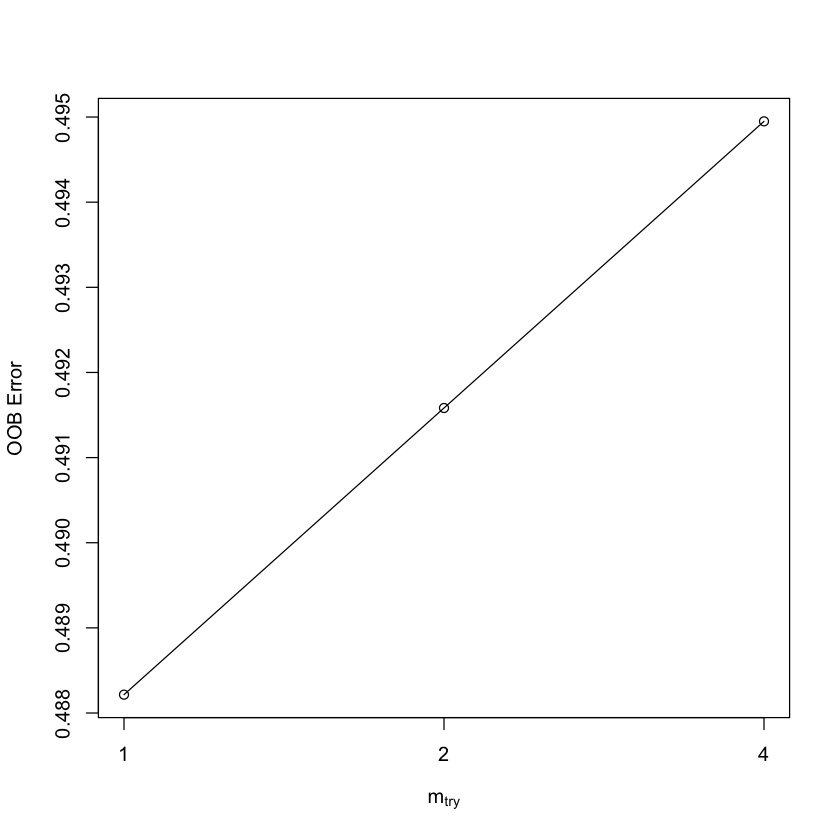

           
predictions NO_PASS PASS
    NO_PASS      54   31
    PASS          4    9

Precision (Positive Predictive Value): 0.225 
Recall (Sensitivity): 0.6923077 
F1 Score: 0.3396226 


NO_PASS    PASS       MeanDecreaseAccuracy MeanDecreaseGini
age        -3.2374416  2.7142106 -0.4438936            6.777123       
traveltime -3.2425774 -1.9631791 -3.5391593            4.226901       
studytime  -0.5443431 -1.7511631 -1.5488056            5.012424       
failures    3.4013568 14.6778937 11.4217351            7.747709       
absences   -2.9677356  0.6698728 -1.8074698           11.339352

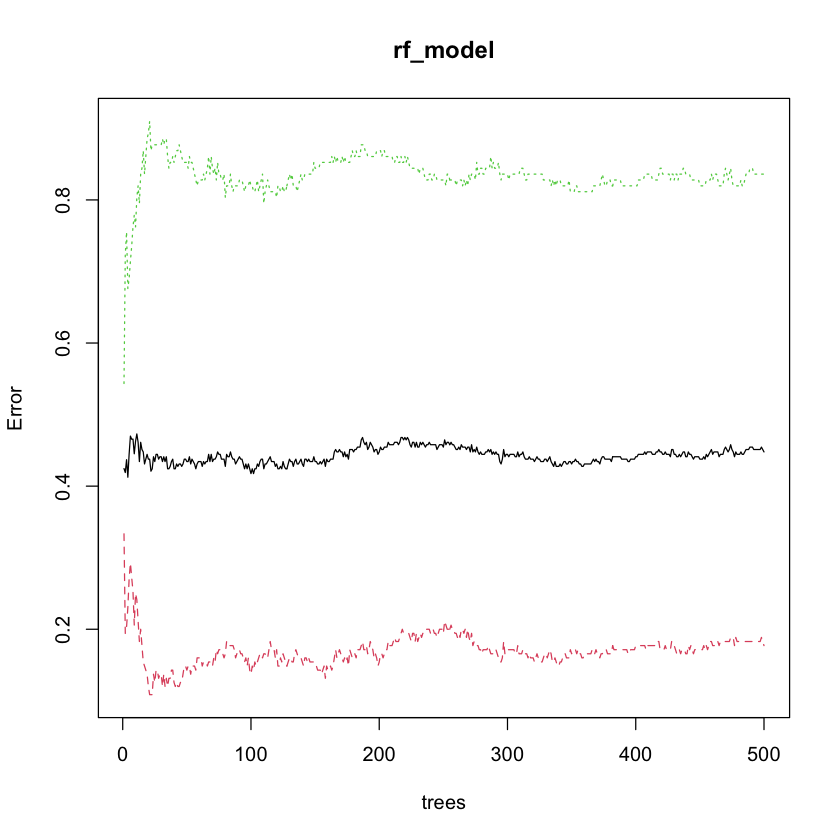

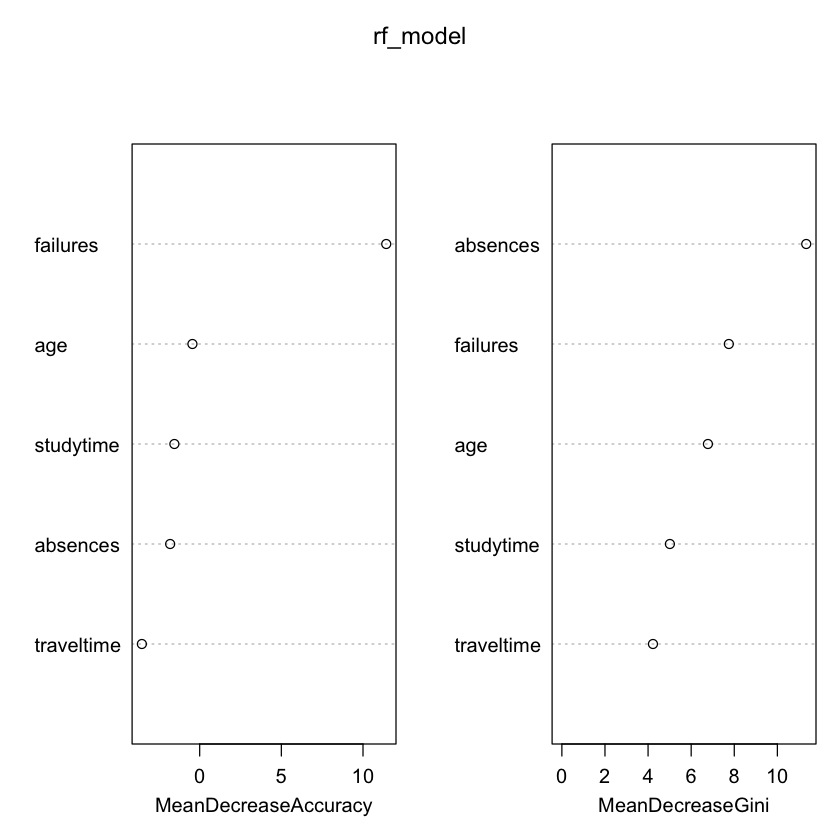

In [102]:
# Step I : Data Preparation
# 
# Step II : Run the random forest model

# Create a random forest model
rf_model <- randomForest(RESULT ~ ., data = training, ntree = 500)

# The number of variables selected at each split is denoted by mtry in randomforest function.

mtry <- tuneRF(training[, 1:5], 
               training$RESULT, 
               ntreeTry=500,
               stepFactor=2, 
               improve=0.01, 
               trace=TRUE, 
               plot=TRUE)

# Step III : Find the optimal mtry value

best.m <- mtry[mtry[, 2] == min(mtry[, 2]), 1]

print("mtry")
print(mtry)

print("best.m")
print(best.m)

# Step IV : Build model again using best mtry value.


rf_model <- randomForest(RESULT ~ ., 
                         data = training, 
                         ntree = 500, 
                         mtry=best.m, 
                         importance=TRUE)

print(rf_model)
plot(rf_model)

predictions <- predict(rf_model, testing)

# Evaluate the model
conf_matrix <- table(predictions, testing$RESULT)
conf_matrix

# Compute precision (Positive Predictive Value)
precision <- conf_matrix[2, 2] / sum(conf_matrix[, 2])

# Compute recall (Sensitivity)
recall <- conf_matrix[2, 2] / sum(conf_matrix[2, ])

# Compute F1 score
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Precision (Positive Predictive Value):", precision, "\n")
cat("Recall (Sensitivity):", recall, "\n")
cat("F1 Score:", f1_score, "\n")

# Evaluate variable importance
importance(rf_model)
varImpPlot(rf_model)

# not advisable, it plots only : MeanDecreaseAccuracy
# vip::vip(rf_model)
# str(importance(rf_model))
rf_model_predictor_importance = as.data.frame(importance(rf_model))


In [103]:
# Higher the value of mean decrease gini score , 
# higher the importance of the variable in the model

In [104]:
head(training, 2)
head(testing, 2)

age traveltime studytime failures absences RESULT 
1 18  2          2         0        6        NO_PASS
5 16  1          2         0        4        NO_PASS

age traveltime studytime failures absences RESULT 
2 17  1          2         0         4       NO_PASS
3 15  1          2         3        10       NO_PASS

In [105]:
# coding the XGBOOST MODELS :
# https://cran.r-project.org/web/packages/xgboost/vignettes/xgboostPresentation.html
# https://www.projectpro.io/recipes/apply-xgboost-for-classification-r

In [106]:
# in the code below, we encode NO_PASS as 0, and PASS as 1

# y_train <- as.integer(training$RESULT) - 1
# y_test <- as.integer(testing$RESULT) - 1
# head(y_train,20)
# head(y_test,20)

In [107]:
X_train = training[, c(1,2,3,4,5)]  # independent variables for train
X_test = testing[, c(1,2,3,4,5)]    # dependent variables for train
head(X_train, 2)
head(X_test, 2)

# using BINARY CODING of 0 and 1
# Y_train <- as.integer(training$RESULT) - 1
# Y_test <- as.integer(testing$RESULT) - 1

# if we do not need to perform the BINARY ENCODING
# y_train <- training$RESULT  # independent variables for test
# y_test <- testing$RESULT    # dependent variables for test

# we encode PASS as 1, and NOT_PASS as 0

Y_train <- as.integer(training$RESULT == "PASS") # independent variables for test
Y_test <- as.integer(testing$RESULT == "PASS")    # dependent variables for test
head(Y_train, 2)
head(Y_test, 2)

xgb_train <- xgb.DMatrix(data = as.matrix(X_train), label = Y_train)
xgb_test <- xgb.DMatrix(data = as.matrix(X_test), label = Y_test)

age traveltime studytime failures absences
1 18  2          2         0        6       
5 16  1          2         0        4

age traveltime studytime failures absences
2 17  1          2         0         4      
3 15  1          2         3        10

[1] 0 0

[1] 0 0

              Length   Class              Mode       
handle               1 xgb.Booster.handle externalptr
raw           10957334 -none-             raw        
niter                1 -none-             numeric    
call                 5 -none-             call       
params               7 -none-             list       
callbacks            1 -none-             list       
feature_names        5 -none-             character  
nfeatures            1 -none-             numeric    

Feature    Gain       Cover      Frequency 
1 absences   0.32813711 0.33385741 0.37867079
2 failures   0.29795808 0.29904360 0.22488408
3 age        0.17265344 0.15376312 0.16769706
4 studytime  0.14904511 0.14813780 0.16151468
5 traveltime 0.05220627 0.06519808 0.06723338

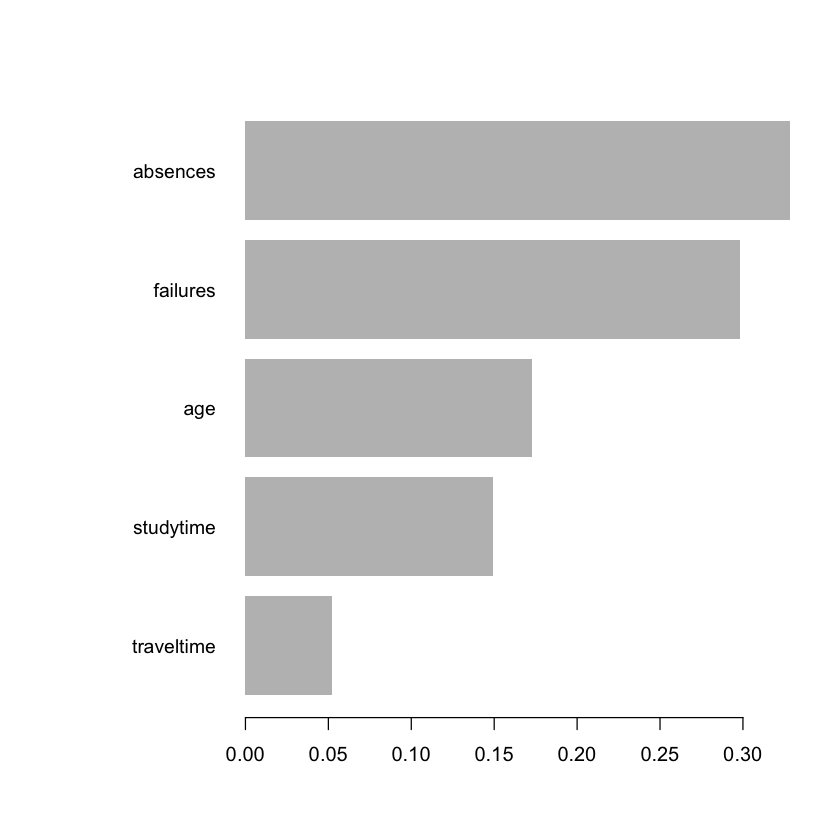

In [108]:
xgb_params <- list(
  eta = 0.01,
  max_depth = 8,
  gamma = 4,
  subsample = 0.75,
  objective = "binary:logistic",
  eval_metric = "logloss"
  # booster = "gbtree",
  # booster = "gblinear",
  # it is an important choice as the Var Imp varies depending on the objective function
  # objective = "multi:softprob",  
  # num_class = length(levels(student3$RESULT))
)

# xgboost
# watchlist <- list(train = xgb_train, test = xgb_test)

xgb_model <- xgb.train(
    data = xgb_train,
    params = xgb_params,
    nrounds = 5000,
    # watchlist = watchlist, 
    verbose = 1
)

summary(xgb_model)

importance_matrix <- xgb.importance(
  feature_names = colnames(xgb_train), 
  model = xgb_model
)

importance_matrix

xgb.plot.importance(importance_matrix)

In [109]:
# in order to check the model and to visualize the tree
# xgb.dump(xgb_model, with_stats = TRUE)
# xgb.plot.tree(model = xgb_model)

age traveltime studytime failures absences RESULT  RESULT_binary
2  17  1          2         0         4       NO_PASS 0            
3  15  1          2         3        10       NO_PASS 0            
4  15  1          3         0         2       PASS    1            
19 17  1          1         3        16       NO_PASS 0            
23 16  1          2         0         2       PASS    1

[1] 0.2535593 0.1624439

[1] 0 0

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 44 22
         1 14 18
                                          
               Accuracy : 0.6327          
                 95% CI : (0.5293, 0.7278)
    No Information Rate : 0.5918          
    P-Value [Acc > NIR] : 0.2370          
                                          
                  Kappa : 0.2153          
                                          
 Mcnemar's Test P-Value : 0.2433          
                                          
            Sensitivity : 0.7586          
            Specificity : 0.4500          
         Pos Pred Value : 0.6667          
         Neg Pred Value : 0.5625          
              Precision : 0.6667          
                 Recall : 0.7586          
                     F1 : 0.7097          
             Prevalence : 0.5918          
         Detection Rate : 0.4490          
   Detection Prevalence : 0.6735          
      Balanced Accuracy : 0.6043    

[1] "F1 Score: 0.709677419354839"


Setting levels: control = NO_PASS, case = PASS

Setting direction: controls < cases



AUC score: 0.6043103 


Area under the curve: 0.6043

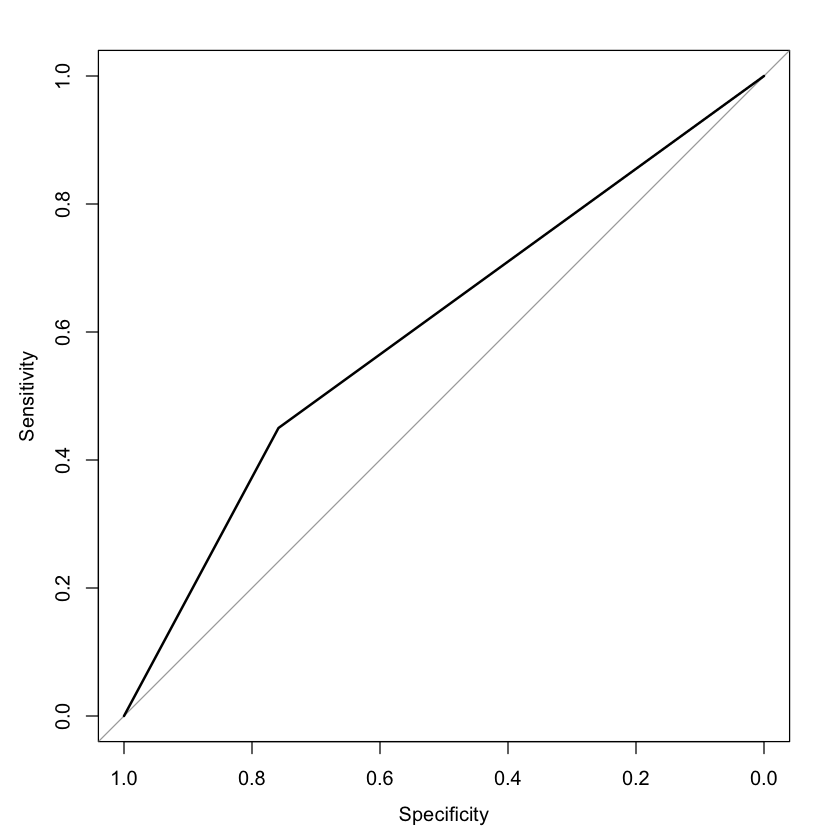

In [110]:
# in order to compute F1 SCORE : 

# converting the LABELS "PASS" and "NO_PASS" into BINARY 0 or 1 for the TESTING DATASET
testing$RESULT_binary <- ifelse(testing$RESULT == 'PASS', 1, 0)
head(testing, 5)

# Make predictions on the test set
predictions <- predict(xgb_model, newdata = xgb_test)
head(predictions, 2)

# Convert predicted values to class labels :
# predicted_labels <- ifelse(predictions > 0.5, "PASS", "NOT_PASS") 
# predicted_labels = factor(predicted_labels, levels = levels(testing$RESULT))
# predicted_labels <- as.factor(predicted_labels)
# Evaluate the model :
# confusionMatrix_xgboost = confusionMatrix(predicted_labels, testing$RESULT,  mode = "everything")
# confusionMatrix_xgboost
# head(predicted_labels, 2)
# head(testing$RESULT, 2)

# Convert predicted values to binary 0 or 1
predicted_values <- ifelse(predictions > 0.5, 1, 0)
head(predicted_values, 2)

# Confusion Matrix :
confusionMatrix_xgboost = confusionMatrix(as.factor(predicted_values), 
                                          as.factor(testing$RESULT_binary),  mode = "everything")
confusionMatrix_xgboost

# Extract F1 score
confusionMatrix_xgboost_F1 <- confusionMatrix_xgboost$byClass["F1"]
print(paste("F1 Score:", confusionMatrix_xgboost_F1))

# The issue of F1 being reported as NA typically occurs when either precision (Pos Pred Value) 
# or recall is zero. The F1 score is defined as the harmonic mean of precision and recall, 
# and it becomes undefined (NA) when either precision or recall is zero.

# Obtaining predicted probabilites for Test data

# xgboost.probs = predict(predicted_labels,
#                   newdata = testing,
#                   type="prob")

# rocCurve.xgboost <- roc(testing$RESULT, xgboost.probs[,"PASS"])
# plot(rocCurve.xgboost, col=c(4))#
#
# print("AUC is : ")
# auc(rocCurve.xgboost)#
# rocCurve.xgboost.auc = auc(rocCurve.xgboost) 


# Create a ROC curve
xgb_roc <- roc(testing$RESULT, predicted_values)
# xgb_roc
plot(xgb_roc) 

# Calculate AUC
auc_score <- auc(xgb_roc)
cat("AUC score:", auc_score, "\n")
auc_score

In [111]:
# FEATURE SELECTION

In [112]:
# BORUTA

# how BORUTA works : SHADOW FEATURES

# Create duplicate copies of all independent variables. 
# When the number of independent variables in the original data is less than 5, 
# create at least 5 copies using existing variables.
# Shuffle the values of added duplicate copies to remove their correlations with the target variable. 
# It is called shadow features or permuted copies.
# Combine the original ones with shuffled copies
# Run a random forest classifier on the combined dataset and performs a variable importance measure 
# (the default is Mean Decrease Accuracy) to evaluate the importance of each variable where higher means 
# more important.
# Then Z score is computed. It means mean of accuracy loss divided by standard deviation of accuracy loss.
# Find the maximum Z score among shadow attributes (MZSA)
# Tag the variables as ‘unimportant’  when they have importance significantly lower than MZSA. 
# Then we permanently remove them from the process.
# Tag the variables as ‘important’  when they have importance significantly higher than MZSA.

# Since the whole process is dependent on permuted copies, 
# we repeat random permutation procedure to get statistically robust results

In [113]:
# BORUTA
# It creates a set of random noise variables associated with each attribute by shuffling each value’s 
# row location. After training a Random Forest model it checks the variable importance of each feature 
# against the distribution of corresponding noise variables.

In [114]:
library("Boruta")

boruta.train  <- Boruta( RESULT~ ., 
                  data = training, 
                  doTrace = 0)

fd <- boruta.train$finalDecision

table(fd)
as.data.frame(fd)
# TentativeRoughFix(boruta.train)
# getSelectedAttributes(boruta.train)
    
confirmed_vars <- fd[which(fd == "Confirmed")] %>% names
cat("confirmed variables : ")
print(confirmed_vars)

rejected_vars <- fd[which(fd != "Confirmed")] %>% names
cat("rejected variables : ")
print(rejected_vars)

fd
Tentative Confirmed  Rejected 
        0         1         4 

fd       
age        Rejected 
traveltime Rejected 
studytime  Rejected 
failures   Confirmed
absences   Rejected

confirmed variables : [1] "failures"
rejected variables : [1] "age"        "traveltime" "studytime"  "absences"  


In [115]:
head(x_train,2)
head(x_test,2)
head(y_train,2)
head(y_test,2)

age traveltime studytime failures absences
1 18  2          2         0        6       
5 16  1          2         0        4

age traveltime studytime failures absences
2 17  1          2         0         4      
3 15  1          2         3        10

[1] NO_PASS NO_PASS
Levels: NO_PASS PASS

[1] NO_PASS NO_PASS
Levels: NO_PASS PASS

In [116]:
# performing RFE (recursive feature elimination)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy      Kappa AccuracySD KappaSD Selected
         1   0.5892  0.0000000    0.01097 0.00000        *
         2   0.5620 -0.0301546    0.04124 0.08158         
         3   0.5628  0.0130706    0.05174 0.13753         
         4   0.5223  0.0007209    0.08631 0.18225         
         5   0.5220 -0.0085494    0.08971 0.19615         

The top 1 variables (out of 1):
   failures


[1] "failures"


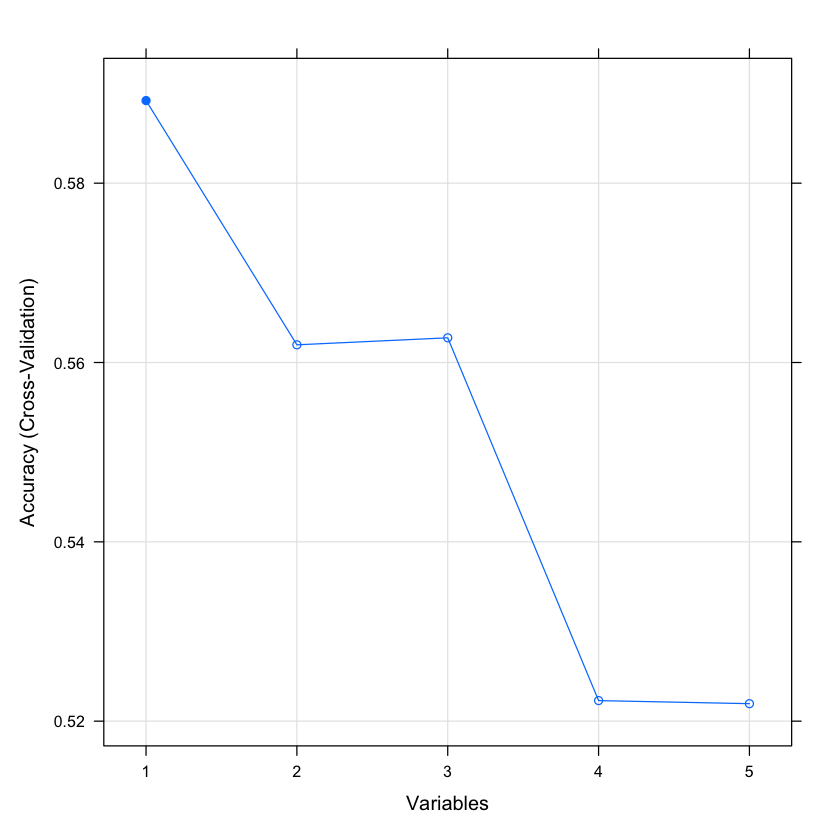

In [117]:
# Define the control parameters : 

ctrl <- rfeControl(functions = rfFuncs, # Random forest is used as the feature selection method
                   method = "cv",       # Cross-validation is used for resampling
                   number = 10)         # Number of variables to select

# Run the feature selection : 

model_rfe <- rfe(x_train,         # Remove the response variable from the predictor set
              y_train,            # Response variable
              sizes = c(1:10),    # Range of variable sizes to consider
              rfeControl = ctrl)  # Use the control parameters defined above

model_rfe
plot(model_rfe, type = c("g", "o"))

# Get the selected features 
selected_features <- predictors(model_rfe)
print(selected_features)

# For subsequent analysis, to use the matrix of the relevant features
# x2_train = x_train[, selected_features] # training data: selected features
# x2_test = x_test[, selected_features] # test data: selected features
# head(x2_train, 2)
# head(x2_test, 2)

the selected features by GA :[1] "age"      "failures"


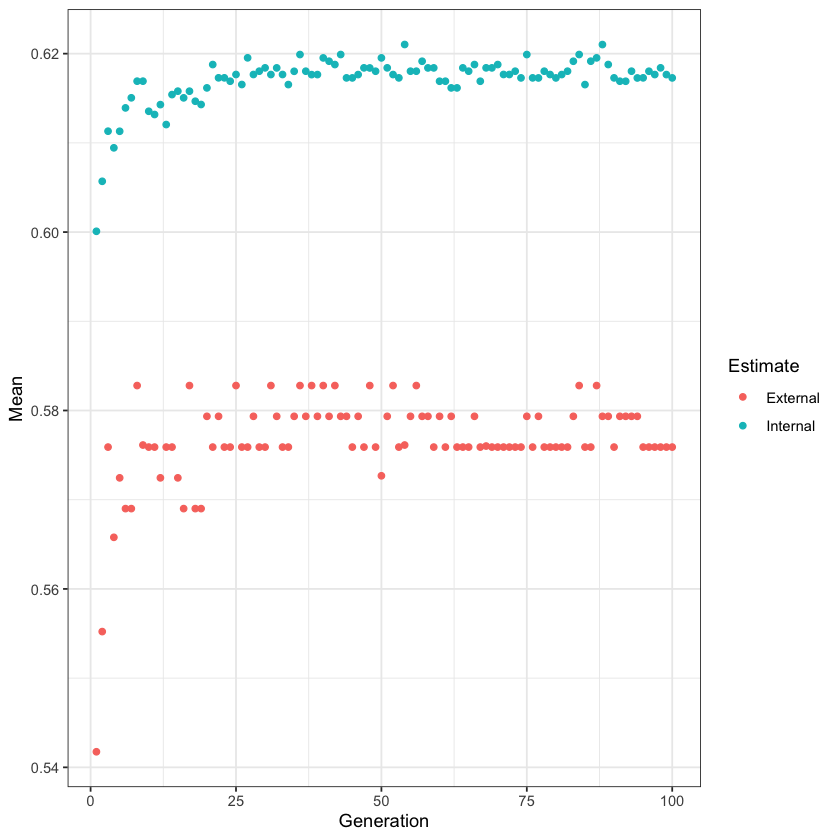

In [118]:
# Genetic Alghoritms
# There are a few built-in sets of functions to use with gafs: caretGA, rfGA, and treebagGA
# ctrl <- gafsControl(functions = caretGA)
# ctrl <- gafsControl(functions = rfGA)
# ctrl <- gafsControl(functions = treebagGA)
# obj <- gafs(x = predictors, 
#            y = outcome,
#            iters = 100,
#            gafsControl = ctrl,
#            ## Now pass options to `train`
#            method =

set.seed(123)

# Define the control parameters
ga_ctrl <- gafsControl(functions = rfGA, # Assess fitness with RF
                       method = "cv",    # 10 fold cross validation
                       genParallel=TRUE, # Use parallel programming
                       allowParallel = TRUE)

# Set the levels
LEVELS <- c("PASS","NO_PASS")     
 
# Compute 
ga_compute <- gafs(x = x_train, 
                   y = y_train,
                   iters = 100, # 100 generations of algorithm
                   popSize = 20, # population size for each generation
                   levels = LEVELS,
                   gafsControl = ga_ctrl)


# The plot also shows the average internal accuracy estimates as well as the average external estimates 
# calculated from the 10 out of sample predictions.
plot(ga_compute) + theme_bw() # Plot mean fitness (AUC) by generation

# Get the selected features
final <- ga_compute$ga$final # Get features selected by GA
cat("the selected features by GA :")
print(final)

# For subsequent analysis, to use the matrix of the relevant features
# x2_train = x_train[, final] # training data: selected features
# x2_test = x_test[, final] # test data: selected features
# head(x2_train, 2)
# head(x2_test, 2)

the selected features by SA :[1] "age"      "failures" "absences"


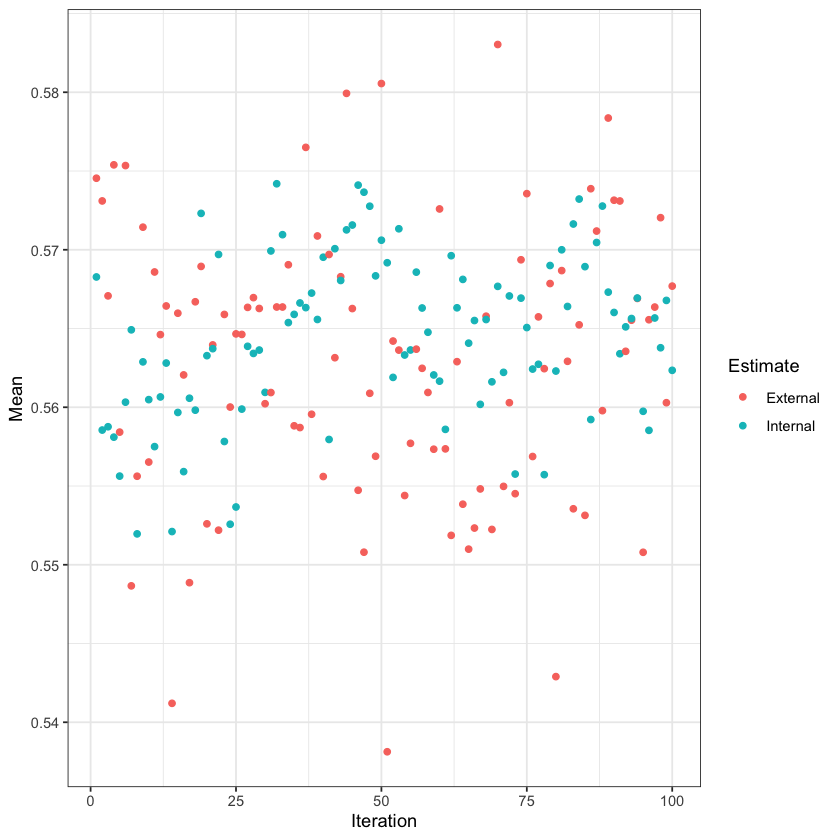

In [119]:
# Simulated Annealing

# ctrl <- safsControl(functions = caretSA)
# ctrl <- safsControl(functions = rfSA)
# obj <- safs(x = predictors, 
#            y = outcome,
#            iters = 100,
#            safsControl = ctrl,
             ## Now pass options to `train`
#            method =

set.seed(123)

# Define the control parameters
sa_ctrl <- safsControl(functions = rfSA,           # Assess fitness with RF
                       method = "repeatedcv",      # 10 fold cross validation
                       repeats = 5,
                       improve = 50)


LEVELS <- c("PASS","NO_PASS")     # Set the levels

# Compute 
sa_compute <- safs(x = x_train, 
                   y = y_train,
                   iters = 100, # 100 generations of algorithm
                   levels = LEVELS,
                   safsControl = sa_ctrl)



# The plot also shows the average internal accuracy estimates as well as the average external estimates 
# calculated from the 10 out of sample predictions.
plot(sa_compute) + theme_bw() # Plot mean fitness (AUC) by generation

# Get the selected features
final <- sa_compute$sa$final # Get features selected by SA
cat("the selected features by SA :")
print(final)

# For subsequent analysis, to use the matrix of the relevant features
# x2_train = x_train[, final] # training data: selected features
# x2_test = x_test[, final] # test data: selected features
# head(x2_train, 2)
# head(x2_test, 2)